## Cryptocurrency Price Prediction Project

##### Using machine learning for cryptocurrency price prediction can only work in situations where prices change due to historical prices that people see before buying and selling the cryptocurrency.

In [6]:
pip install yfinance

# yfinance is a Python library that allows you to access financial data from Yahoo Finance.
# It provides a simple and convenient way to retrieve historical market data, stock information,
# and other financial data directly from Yahoo Finance's API.

SyntaxError: invalid syntax (337538006.py, line 1)

In [27]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date,timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days= 120) #Total number of days we are working with at the moment. 
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("BTC-USD", #Bitcoin
                  start=start_date,
                  end=end_date,
                  progress=False)
data["Date"]= data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace= True)

In [35]:
#print(data.head())

In [37]:
#print(data.tail())

In [29]:
data.shape

(120, 7)

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



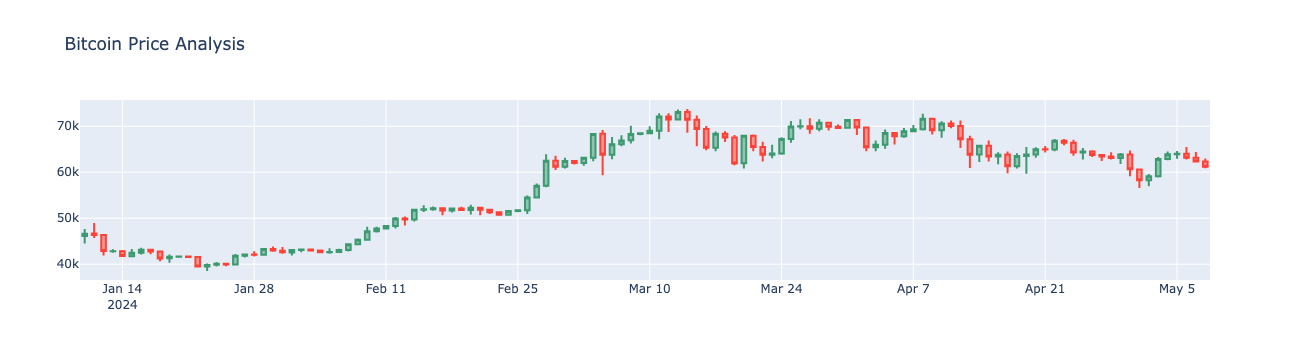

In [31]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                       open=data["Open"],
                                       high=data["High"],
                                       low=data["Low"],
                                       close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)

In [33]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.994506
Low          0.992893
Open         0.984691
Date         0.807606
Volume       0.462716
Name: Close, dtype: float64


In [ ]:
#pip install autots

# AutoTS is a Python library that provides automated time series forecasting capabilities. 
# It stands for "Automatic Time Series" and is designed to simplify the process of building and selecting forecasting models for time series data. 
# AutoTS automates the model selection, hyperparameter tuning, and forecasting process, allowing users to focus on interpreting and utilizing the results rather than the technical details of model building

In [43]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency="infer", ensemble= "simple")
model = model.fit(data, date_col = "Date", value_col= 'Close', id_col = None)
prediction= model.predict()
forecast = prediction.forecast
print(forecast)

Using 4 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78928D+01    |proj g|=  1.28603D+02


 This problem is unconstrained.



At iterate    1    f=  9.40322D+00    |proj g|=  8.73242D-01

At iterate    2    f=  9.26616D+00    |proj g|=  5.28074D-01

At iterate    3    f=  9.12715D+00    |proj g|=  2.61266D-01

At iterate    4    f=  9.07922D+00    |proj g|=  2.04294D-01

At iterate    5    f=  9.05237D+00    |proj g|=  1.84952D-01

At iterate    6    f=  9.02599D+00    |proj g|=  1.67157D-01

At iterate    7    f=  8.99580D+00    |proj g|=  1.49525D-01

At iterate    8    f=  8.98790D+00    |proj g|=  1.63496D-01

At iterate    9    f=  8.97307D+00    |proj g|=  1.04282D-01

At iterate   10    f=  8.96883D+00    |proj g|=  8.82723D-02

At iterate   11    f=  8.95602D+00    |proj g|=  6.94301D-02

At iterate   12    f=  8.94567D+00    |proj g|=  1.06928D-01

At iterate   13    f=  8.93827D+00    |proj g|=  1.62483D-02

At iterate   14    f=  8.93595D+00    |proj g|=  3.25915D-02

At iterate   15    f=  8.93443D+00    |proj g|=  2.31538D-02

At iterate   16    f=  8.93355D+00    |proj g|=  1.24563D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 7 with model DatepartRegression in generation 0 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - loss: 0.3996
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3951
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3912 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3937  
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3834
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3870 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3773  
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3753 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3701 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3666 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3615 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3441
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3385  
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3333 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3168
Epoch 16/50
3/3 ━━━━━━━━━━

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 31 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Mod

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 63 with model ETS in generation 0 of 20
Model Number: 64 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 64 in generation 0: FBProphet
Model Number: 65 with model UnobservedComponents in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {'model': 'GLS', 'phi': 0.999, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 65 in generation 0: UnobservedComponents
Model Number: 66 with model VAR in generation 0 of 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15154D+00    |proj g|=  1.58959D-01

At iterate    1    f= -1.15158D+00    |proj g|=  2.19887D-02

At iterate    2    f= -1.15160D+00    |proj g|=  5.62999D-02

At iterate    3    f= -1.15165D+00    |proj g|=  1.21974D-01

At iterate    4    f= -1.15183D+00    |proj g|=  2.56047D-01

At iterate    5    f= -1.15201D+00    |proj g|=  2.72105D-01

At iterate    6    f= -1.15219D+00    |proj g|=  1.00441D-01

At iterate    7    f= -1.15221D+00    |proj g|=  4.81289D-03

At iterate    8    f= -1.15221D+00    |proj g|=  2.05370D-02

At iterate    9    f= -1.15222D+00    |proj g|=  3.33359D-02

At iterate   10    f= -1.15222D+00    |proj g|=  4.51965D-02

At iterate   11    f= -1.15223D+00    |proj g|=  4.34715D-02

At iterate   12    f= -1.15223D+00    |proj g|=  1.22537D-02

At iterate   13    f= -1.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     81      2     0     0   2.483D-05  -1.152D+00
  F =  -1.1524073675644833     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 69 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 69 in generation 0: WindowRegression
Model Number: 70 with model DatepartRegression in generation 0 of 20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50


2024-05-10 13:04:50.106032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [32,22,1] vs. [32,1]
	 [[{{function_node __inference_one_step_on_data_90393}}{{node residual_wrapper_1/add}}]]


Template Eval Error: InvalidArgumentError() in model 70 in generation 0: DatepartRegression
Model Number: 71 with model UnivariateRegression in generation 0 of 20
Model Number: 72 with model MultivariateRegression in generation 0 of 20
Model Number: 73 with model UnivariateMotif in generation 0 of 20
Model Number: 74 with model MultivariateMotif in generation 0 of 20
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 74 in generation 0: MultivariateMotif
Model Number: 75 with model SectionalMotif in generation 0 of 20
Model Number: 76 with model NVAR in generation 0 of 20
Model Number: 77 with model Theta in generation 0 of 20
Model Number: 78 with model ARDL in generation 0 of 20
Model Number: 79 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 79 in generation 0: ARCH
Model Number: 80 with model MetricMotif in generation 0 of 20
Model Number: 81 with model Seasona

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 98 with model GLM in generation 0 of 20
Model Number: 99 with model Theta in generation 0 of 20
Model Number: 100 with model ETS in generation 0 of 20
Model Number: 101 with model DatepartRegression in generation 0 of 20
Model Number: 102 with model LastValueNaive in generation 0 of 20
Model Number: 103 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 103 in generation 0: WindowRegression
Model Number: 104 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=99) out of bounds (31)') in model 104 in generation 0: SeasonalityMotif
Model Number: 105 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105 in generation 0: VAR
Model Number: 106 with model ETS in generation 0 of 20
Model Number: 107 with model SeasonalityMotif in generation 0 of 20
Model Number: 108 with model UnivariateMotif in generation

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 135 with model SeasonalNaive in generation 0 of 20
Model Number: 136 with model UnobservedComponents in generation 0 of 20
Model Number: 137 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (114) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (88).') exog train             seasonalitycommonfourier_0  seasonalitycommonfourier_1  \\\nDate                                                                 \n2024-01-10                    0.989329                    0.957543   \n2024-01-11                    0.986676                    0.947060   \n2024-01-12                    0.983732                    0.935455   \n2024-01-13                    0.980496                    0.922744   \n2024-01-14                    0.976970                    0.908940   \n...                                ...

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 158 in generation 0: DatepartRegression
Model Number: 159 with model NVAR in generation 0 of 20
Model Number: 160 with model NVAR in generation 0 of 20
Model Number: 161 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 161 in generation 0: FBProphet
Model Number: 162 with model GLS in generation 0 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '2': {}}") in model 167 in generation 0: GLM
Model Number: 168 with model NVAR in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {}, '1': {}, '2': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 168 in generation 0: NVAR
Model Number: 169 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 169 in generation 0: WindowRegression
Model Number: 170 with model ARIMA in generation 0 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.98065D-01    |proj g|=  1.16547D-01

At iterate    1    f=  9.83466D-01    |proj g|=  2.57831D-02

At iterate    2    f=  9.83066D-01    |proj g|=  2.95490D-02

At iterate    3    f=  9.82745D-01    |proj g|=  1.83323D-02

At iterate    4    f=  9.81546D-01    |proj g|=  3.72926D-02

At iterate    5    f=  9.78996D-01    |proj g|=  6.83250D-02

At iterate    6    f=  9.75886D-01    |proj g|=  1.12566D-01

At iterate    7    f=  9.72927D-01    |proj g|=  1.69246D-01

At iterate    8    f=  9.64304D-01    |proj g|=  1.19739D-01

At iterate    9    f=  9.51196D-01    |proj g|=  1.24364D-01

At iterate   10    f=  9.50703D-01    |proj g|=  1.18110D-01

At iterate   11    f=  9.48011D-01    |proj g|=  2.42197D-02

At iterate   12    f=  9.47406D-01    |proj g|=  4.39113D-02

At iterate   13    f=  9.4

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 203 with model AverageValueNaive in generation 1 of 20
Model Number: 204 with model SeasonalNaive in generation 1 of 20
Model Number: 205 with model SeasonalityMotif in generation 1 of 20
Model Number: 206 with model DatepartRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 206 in generation 1: DatepartRegression
Model Number: 207 with model UnivariateMotif in generation 1 of 20
Model Number: 208 with model ARIMA in generation 1 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02322D+00    |proj g|=  1.27230D+00

At iterate    1    f=  8.82866D+00    |proj g|=  4.08429D-01

At iterate    2    f=  8.80366D+00    |proj g|=  1.19369D-01

At iterate    3    f=  8.80187D+00    |proj g|=  1.91848D-02

At iterate    4    f=  8.80181D+00    |proj g|=  9.35925D-03

At iterate    5    f=  8.80180D+00    |proj g|=  1.57524D-03

At iterate    6    f=  8.80180D+00    |proj g|=  1.35611D-03

At iterate    7    f=  8.80179D+00    |proj g|=  3.35962D-03

At iterate    8    f=  8.80177D+00    |proj g|=  6.87986D-03

At iterate    9    f=  8.80173D+00    |proj g|=  1.42814D-02

At iterate   10    f=  8.80162D+00    |proj g|=  2.83156D-02

At iterate   11    f=  8.80138D+00    |proj g|=  6.47106D-02

At iterate   12    f=  8.80104D+00    |proj g|=  9.82494D-02

At iterate   13    f=  8.7

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 25189025792.0, tolerance: 20361072.0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 250 with model SeasonalityMotif in generation 1 of 20
Model Number: 251 with model DatepartRegression in generation 1 of 20
Model Number: 252 with model UnobservedComponents in generation 1 of 20
Model Number: 253 with model NVAR in generation 1 of 20
Model Number: 254 with model ETS in generation 1 of 20
Model Number: 255 with model AverageValueNaive in generation 1 of 20
Model Number: 256 with model LastValueNaive in generation 1 of 20
Model Number: 257 with model MultivariateRegression in generation 1 of 20
Model Number: 258 with model AverageValueNaive in generation 1 of 20
Model Number: 259 with model ARIMA in generation 1 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.15590D+00    |proj g|=  1.07776D+00

At iterate    1    f=  9.01869D+00    |proj g|=  5.90426D-01

At iterate    2    f=  8.97435D+00    |proj g|=  3.19066D-01

At iterate    3    f=  8.95823D+00    |proj g|=  1.94028D-01

At iterate    4    f=  8.94243D+00    |proj g|=  1.90284D-01

At iterate    5    f=  8.93508D+00    |proj g|=  1.72052D-01

At iterate    6    f=  8.93112D+00    |proj g|=  9.66281D-02

At iterate    7    f=  8.92825D+00    |proj g|=  2.83453D-02

At iterate    8    f=  8.92783D+00    |proj g|=  2.75223D-02

At iterate    9    f=  8.92374D+00    |proj g|=  9.81239D-02

At iterate   10    f=  8.92073D+00    |proj g|=  1.01765D-01

At iterate   11    f=  8.91546D+00    |proj g|=  8.44433D-02

At iterate   12    f=  8.91468D+00    |proj g|=  4.15350D-02

At iterate   13    f=  8.9

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 271 with model ARIMA in generation 1 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37568D+02    |proj g|=  6.49963D+02

At iterate    1    f=  1.34538D+01    |proj g|=  6.22343D+00

At iterate    2    f=  1.27053D+01    |proj g|=  4.70491D+00

At iterate    3    f=  1.13277D+01    |proj g|=  2.36573D+00

At iterate    4    f=  1.03568D+01    |proj g|=  1.25725D+00

At iterate    5    f=  9.53322D+00    |proj g|=  5.51017D-01

At iterate    6    f=  9.14138D+00    |proj g|=  1.79314D-01

At iterate    7    f=  9.07569D+00    |proj g|=  1.36021D-01

At iterate    8    f=  9.03153D+00    |proj g|=  8.16760D-02

At iterate    9    f=  9.00664D+00    |proj g|=  1.09483D-01

At iterate   10    f=  8.98841D+00    |proj g|=  4.56596D-02

At iterate   11    f=  8.98418D+00    |proj g|=  4.13822D-02

At iterate   12    f=  8.98146D+00    |proj g|=  3.42803D-02

At iterate   13    f=  8.9

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



Model Number: 278 with model AverageValueNaive in generation 1 of 20
Model Number: 279 with model SeasonalNaive in generation 1 of 20
Model Number: 280 with model ConstantNaive in generation 1 of 20
Model Number: 281 with model WindowRegression in generation 1 of 20
Model Number: 282 with model SectionalMotif in generation 1 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 283 with model ETS in generation 1 of 20
Model Number: 284 with model WindowRegression in generation 1 of 20
Model Number: 285 with model SectionalMotif in generation 1 of 20
Model Number: 286 with model AverageValueNaive in generation 1 of 20
Model Number: 287 with model AverageValueNaive in generation 1 of 20
Model Number: 288 with model SeasonalNaive in generation 1 of 20
Model Number: 289 with model SeasonalityMotif in generation 1 of 20
Model Number: 290 with model UnobservedComponents in generation 1 of 20
Model Number: 291 with model DatepartRegression in generation 1 of 20
Model Number: 292 with model MetricMotif in generation 1 of 20
Model Number: 293 with model Theta in generation 1 of 20
Model Number: 294 with model UnivariateMotif in generation 1 of 20
Model Number: 295 with model ETS in generation 1 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean {'0': {}, '1': {'method': 'rolling_zscore', 'method_para

 This problem is unconstrained.



At iterate    1    f=  4.28354D-01    |proj g|=  6.82508D-02

At iterate    2    f=  4.27140D-01    |proj g|=  5.47439D-02

At iterate    3    f=  4.26051D-01    |proj g|=  4.30032D-02

At iterate    4    f=  4.25041D-01    |proj g|=  5.00965D-02

At iterate    5    f=  4.24350D-01    |proj g|=  2.37131D-02

At iterate    6    f=  4.23566D-01    |proj g|=  5.93497D-02

At iterate    7    f=  4.22027D-01    |proj g|=  7.86447D-02

At iterate    8    f=  4.20355D-01    |proj g|=  9.57797D-02

At iterate    9    f=  4.19622D-01    |proj g|=  3.31346D-02

At iterate   10    f=  4.19156D-01    |proj g|=  1.14030D-02

At iterate   11    f=  4.19040D-01    |proj g|=  8.20817D-03

At iterate   12    f=  4.18746D-01    |proj g|=  2.85724D-02

At iterate   13    f=  4.18480D-01    |proj g|=  2.65876D-02

At iterate   14    f=  4.18385D-01    |proj g|=  4.38444D-02

At iterate   15    f=  4.18231D-01    |proj g|=  1.53721D-02

At iterate   16    f=  4.18171D-01    |proj g|=  5.89116D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 306 with model GLS in generation 1 of 20
New Generation: 2 of 20
Model Number: 307 with model GLS in generation 2 of 20
Model Number: 308 with model SectionalMotif in generation 2 of 20
Model Number: 309 with model ConstantNaive in generation 2 of 20
Model Number: 310 with model LastValueNaive in generation 2 of 20
Model Number: 311 with model ConstantNaive in generation 2 of 20
Model Number: 312 with model ConstantNaive in generation 2 of 20
Model Number: 313 with model DatepartRegression in generation 2 of 20
Model Number: 314 with model UnobservedComponents in generation 2 of 20
Model Number: 315 with model ETS in generation 2 of 20
Model Number: 316 with model UnobservedComponents in generation 2 of 20
Model Number: 317 with model LastValueNaive in generation 2 of 20
Model Number: 318 with model LastValueNaive in generation 2 of 20
Model Number: 319 with model DatepartRegression in generation 2 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 319 in generation 2: DatepartRegression
Model Number: 320 with model DatepartRegression in generation 2 of 20
Model Number: 321 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 321 in generation 2: DatepartRegression
Model Number: 322 with model GLS in generation 2 of 20
Model Number: 323 with model MetricMotif in generation 2 of 20
Model Number: 324 with model SeasonalNaive in generation 2 of 20
Model Number: 325 with model LastValueNaive in generation 2 of 20
Model Number: 326 with model ConstantNaive in generation 2 of 20
Model Number: 327 with model ARIMA in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 327 in generation 2: ARIMA
Model Number: 328 with model ConstantNaive in gener

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 332 with model MetricMotif in generation 2 of 20
Template Eval Error: ValueError('Shape of passed values is (30, 2), indices imply (30, 1)') in model 332 in generation 2: MetricMotif
Model Number: 333 with model SeasonalNaive in generation 2 of 20
Model Number: 334 with model ETS in generation 2 of 20
Model Number: 335 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65541D+01    |proj g|=  7.16066D+01


 This problem is unconstrained.



At iterate    1    f=  1.06210D+01    |proj g|=  3.63707D-01

At iterate    2    f=  1.05985D+01    |proj g|=  2.61714D-01

At iterate    3    f=  1.05571D+01    |proj g|=  1.37174D-01

At iterate    4    f=  1.05454D+01    |proj g|=  7.25119D-02

At iterate    5    f=  1.05406D+01    |proj g|=  5.97823D-02

At iterate    6    f=  1.05353D+01    |proj g|=  5.98377D-02

At iterate    7    f=  1.05260D+01    |proj g|=  1.05077D-01

At iterate    8    f=  1.05117D+01    |proj g|=  1.16656D-01

At iterate    9    f=  1.04989D+01    |proj g|=  1.21495D-01

At iterate   10    f=  1.04913D+01    |proj g|=  9.85961D-02

At iterate   11    f=  1.04883D+01    |proj g|=  3.83301D-02

At iterate   12    f=  1.04873D+01    |proj g|=  2.47976D-02

At iterate   13    f=  1.04866D+01    |proj g|=  2.42140D-02

At iterate   14    f=  1.04863D+01    |proj g|=  1.28055D-02

At iterate   15    f=  1.04862D+01    |proj g|=  1.02279D-02

At iterate   16    f=  1.04860D+01    |proj g|=  7.12614D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   3.002D+04  -1.036D+01
  F =  -10.358564999941819     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 360 with model Theta in generation 2 of 20
Model Number: 361 with model UnobservedComponents in generation 2 of 20
Model Number: 362 with model ETS in generation 2 of 20
Model Number: 363 with model Theta in generation 2 of 20
Model Number: 364 with model ARIMA in generation 2 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05914D+01    |proj g|=  6.93147D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.591429929360828     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 365 with model SeasonalityMotif in generation 2 of 20
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 365 in generation 2: SeasonalityMotif
Model Number: 366 with model SectionalMotif in generation 2 of 20
Model Number: 367 with model SeasonalNaive in generation 2 of 20
Model Number: 368 with model SeasonalityMotif in generation 2 of 20
Model Number: 369 with model LastValueNaive in generation 2 of 20
Model Number: 370 with model SeasonalNaive in generation 2 of 20
Model Number: 371 with model SeasonalityMotif in generation 2 of 20
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 371 in generation 2: SeasonalityMotif
Model Number: 372 with model WindowRegression in generation 2 of 20
Model Number: 373 with model GLS in generation 2 of 20
Model Number: 374 with model DatepartRegression in generation 2 of 20
Model Number: 375 with model LastValueNaive in generation 2 of 20
Model

 This problem is unconstrained.



At iterate    1    f= -1.25779D+00    |proj g|=  4.23137D-01

At iterate    2    f= -1.25833D+00    |proj g|=  3.98187D-01

At iterate    3    f= -1.26029D+00    |proj g|=  6.80927D-01

At iterate    4    f= -1.26293D+00    |proj g|=  1.34585D+00

At iterate    5    f= -1.27350D+00    |proj g|=  3.23045D+00

At iterate    6    f= -1.29402D+00    |proj g|=  5.44694D+00

At iterate    7    f= -1.33842D+00    |proj g|=  7.23667D+00

At iterate    8    f= -1.38661D+00    |proj g|=  3.92444D+00

At iterate    9    f= -1.40239D+00    |proj g|=  1.12905D+00

At iterate   10    f= -1.40512D+00    |proj g|=  2.00127D-01

At iterate   11    f= -1.40566D+00    |proj g|=  1.93184D-01

At iterate   12    f= -1.40631D+00    |proj g|=  3.39315D-01

At iterate   13    f= -1.40824D+00    |proj g|=  7.50463D-01

At iterate   14    f= -1.41272D+00    |proj g|=  1.28167D+00

At iterate   15    f= -1.42265D+00    |proj g|=  1.86572D+00

At iterate   16    f= -1.43814D+00    |proj g|=  2.05523D+00

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/an

Model Number: 419 with model NVAR in generation 2 of 20
Model Number: 420 with model UnivariateMotif in generation 2 of 20
Model Number: 421 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05790D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   6.931D+04  -1.058D+01
  F =  -10.578991480057706     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 422 with model GLS in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'lag_1': 2, 'method': 'LastValue'}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 422 in generation 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45550D+00    |proj g|=  1.13971D+00

At iterate    1    f= -1.45661D+00    |proj g|=  1.11638D-01

At iterate    2    f= -1.45663D+00    |proj g|=  2.06218D-02

At iterate    3    f= -1.45663D+00    |proj g|=  2.04158D-02

At iterate    4    f= -1.45668D+00    |proj g|=  1.34793D-01

At iterate    5    f= -1.45675D+00    |proj g|=  2.36445D-01

At iterate    6    f= -1.45685D+00    |proj g|=  2.48559D-01

At iterate    7    f= -1.45696D+00    |proj g|=  1.22507D-01

At iterate    8    f= -1.45701D+00    |proj g|=  5.54558D-02

At iterate    9    f= -1.45703D+00    |proj g|=  1.05064D-01

At iterate   10    f= -1.45706D+00    |proj g|=  1.51643D-01

At iterate   11    f= -1.45708D+00    |proj g|=  1.25938D-01

At iterate   12    f= -1.45710D+00    |proj g|=  4.65436D-02

At iterate   13    f= -1.4

 This problem is unconstrained.



At iterate    1    f=  8.80590D+00    |proj g|=  8.78426D-02

At iterate    2    f=  8.80509D+00    |proj g|=  4.11799D-02

At iterate    3    f=  8.80487D+00    |proj g|=  8.21347D-03

At iterate    4    f=  8.80485D+00    |proj g|=  9.13437D-03

At iterate    5    f=  8.80462D+00    |proj g|=  2.52237D-02

At iterate    6    f=  8.80405D+00    |proj g|=  5.20769D-02

At iterate    7    f=  8.80301D+00    |proj g|=  1.54032D-01

At iterate    8    f=  8.80151D+00    |proj g|=  1.07140D-01

At iterate    9    f=  8.79815D+00    |proj g|=  5.98672D-02

At iterate   10    f=  8.79616D+00    |proj g|=  4.38323D-02

At iterate   11    f=  8.79583D+00    |proj g|=  2.33470D-02

At iterate   12    f=  8.79570D+00    |proj g|=  7.71044D-03

At iterate   13    f=  8.79562D+00    |proj g|=  4.92702D-03

At iterate   14    f=  8.79552D+00    |proj g|=  1.47181D-02

At iterate   15    f=  8.79548D+00    |proj g|=  1.81909D-02

At iterate   16    f=  8.79544D+00    |proj g|=  3.75942D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



Model Number: 458 with model WindowRegression in generation 3 of 20
Model Number: 459 with model MultivariateMotif in generation 3 of 20
Model Number: 460 with model DatepartRegression in generation 3 of 20
Model Number: 461 with model Theta in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'output_distribution': 'uniform', 'n_quantiles': 9}, '3': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 461 in generation 3: Theta
Model Number: 462 with model WindowRegression in generation 3 of 20
Model Number: 463 with model WindowRegression in generation 3 of 20
Model Number: 464 with model NVAR in generation 3 of 20
Model Number: 465 with model LastValueNaive in generation 3 of 20
Model

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 494 in generation 3: DatepartRegression
Model Number: 495 with model DatepartRegression in generation 3 of 20
Model Number: 496 with model SectionalMotif in generation 3 of 20
Model Number: 497 with model NVAR in generation 3 of 20
Model Number: 498 with model UnobservedComponents in generation 3 of 20
Model Number: 499 with model SeasonalNaive in generation 3 of 20
Model Number: 500 with model SectionalMotif in generation 3 of 20
Model Number: 501 with model UnobservedComponents in generation 3 of 20
Model Number: 502 with model MetricMotif in generation 3 of 20
Model Number: 503 with model ETS in generation 3 of 20
Model Number: 504 with model ConstantNaive in generation 3 of 20
Model Number: 505 with model WindowRegression in generation 3 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 505 in generation 3: WindowRegr

 This problem is unconstrained.



At iterate    1    f=  4.49419D-01    |proj g|=  3.39479D-02

At iterate    2    f=  4.49291D-01    |proj g|=  3.13638D-02

At iterate    3    f=  4.48538D-01    |proj g|=  2.57523D-02

At iterate    4    f=  4.48292D-01    |proj g|=  2.18551D-02

At iterate    5    f=  4.48024D-01    |proj g|=  9.58980D-03

At iterate    6    f=  4.47711D-01    |proj g|=  3.00329D-02

At iterate    7    f=  4.47290D-01    |proj g|=  4.15550D-02

At iterate    8    f=  4.46267D-01    |proj g|=  5.62383D-02

At iterate    9    f=  4.44680D-01    |proj g|=  6.51243D-02

At iterate   10    f=  4.41542D-01    |proj g|=  7.54742D-02

At iterate   11    f=  4.37710D-01    |proj g|=  6.37085D-02

At iterate   12    f=  4.36107D-01    |proj g|=  4.71694D-02

At iterate   13    f=  4.34529D-01    |proj g|=  5.48417D-02

At iterate   14    f=  4.33840D-01    |proj g|=  5.29392D-02

At iterate   15    f=  4.33247D-01    |proj g|=  4.76567D-02

At iterate   16    f=  4.33198D-01    |proj g|=  1.73231D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15399D+00    |proj g|=  2.52223D-01

At iterate    1    f= -1.15408D+00    |proj g|=  7.12035D-02

At iterate    2    f= -1.15410D+00    |proj g|=  4.27167D-02

At iterate    3    f= -1.15412D+00    |proj g|=  4.22533D-02

At iterate    4    f= -1.15419D+00    |proj g|=  1.49879D-01

At iterate    5    f= -1.15435D+00    |proj g|=  2.81002D-01

At iterate    6    f= -1.15466D+00    |proj g|=  4.13752D-01

At iterate    7    f= -1.15508D+00    |proj g|=  4.16914D-01

At iterate    8    f= -1.15555D+00    |proj g|=  3.84835D-02

At iterate    9    f= -1.15557D+00    |proj g|=  4.47034D-02

At iterate   10    f= -1.15557D+00    |proj g|=  5.42834D-02

At iterate   11    f= -1.15559D+00    |proj g|=  5.96623D-02

At iterate   12    f= -1.15561D+00    |proj g|=  2.66538D-02

At iterate   13    f= -1.1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



Model Number: 524 with model ARDL in generation 3 of 20
Model Number: 525 with model SeasonalNaive in generation 3 of 20
Model Number: 526 with model SectionalMotif in generation 3 of 20
Model Number: 527 with model Theta in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': True}, '1': {'method': 'clip', 'std_threshold': 4.5, 'fillna': None}, '2': {'det_order': 1, 'k_ar_diff': 0}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 527 in generation 3: Theta
Model Number: 528 with model SectionalMotif in g

 This problem is unconstrained.



At iterate   28    f=  8.89871D+00    |proj g|=  1.77916D-02

At iterate   29    f=  8.89732D+00    |proj g|=  1.60523D-02

At iterate   30    f=  8.89529D+00    |proj g|=  4.08267D-03

At iterate   31    f=  8.89510D+00    |proj g|=  1.24311D-03

At iterate   32    f=  8.89505D+00    |proj g|=  1.88654D-03

At iterate   33    f=  8.89500D+00    |proj g|=  1.46628D-03

At iterate   34    f=  8.89499D+00    |proj g|=  1.04576D-03

At iterate   35    f=  8.89498D+00    |proj g|=  3.67112D-04

At iterate   36    f=  8.89497D+00    |proj g|=  1.49968D-04

At iterate   37    f=  8.89497D+00    |proj g|=  3.48484D-05

At iterate   38    f=  8.89497D+00    |proj g|=  2.72065D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.473e+00, tolerance: 8.900e-03



Model Number: 549 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {}, '1': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.03, 'rolling_periods': 28, 'center': True}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': None, 'regression_params': {}}, '2': {}, '3': {}}") in model 549 in generation 3: SectionalMotif
Model Number: 550 with model 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



Model Number: 552 with model AverageValueNaive in generation 3 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill_mean_biased {'0': {'lag_1': 2, 'method': 'LastValue'}, '1': {}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}, 'holiday_countries_used': False}, '3': {}, '4': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 

 This problem is unconstrained.



At iterate   14    f=  8.73246D+00    |proj g|=  3.80639D-02

At iterate   15    f=  8.73160D+00    |proj g|=  3.09279D-02

At iterate   16    f=  8.72879D+00    |proj g|=  5.48664D-02

At iterate   17    f=  8.72396D+00    |proj g|=  3.53103D-02

At iterate   18    f=  8.72178D+00    |proj g|=  5.18865D-02

At iterate   19    f=  8.72085D+00    |proj g|=  3.04014D-02

At iterate   20    f=  8.72032D+00    |proj g|=  1.38153D-02

At iterate   21    f=  8.72025D+00    |proj g|=  1.05969D-02

At iterate   22    f=  8.72018D+00    |proj g|=  4.31999D-03

At iterate   23    f=  8.72015D+00    |proj g|=  4.30002D-03

At iterate   24    f=  8.72007D+00    |proj g|=  3.84887D-03

At iterate   25    f=  8.72001D+00    |proj g|=  4.78804D-03

At iterate   26    f=  8.71997D+00    |proj g|=  7.73299D-03

At iterate   27    f=  8.71992D+00    |proj g|=  1.75386D-03

At iterate   28    f=  8.71992D+00    |proj g|=  1.63642D-03

At iterate   29    f=  8.71991D+00    |proj g|=  3.19914D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.98976e-20): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.98976e-20): result may not be accurate.




Model Number: 571 with model ConstantNaive in generation 4 of 20
Model Number: 572 with model AverageValueNaive in generation 4 of 20
Model Number: 573 with model SectionalMotif in generation 4 of 20
Model Number: 574 with model MultivariateMotif in generation 4 of 20
Model Number: 575 with model GLS in generation 4 of 20
Model Number: 576 with model GLS in generation 4 of 20
Model Number: 577 with model SectionalMotif in generation 4 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 583 with model SeasonalNaive in generation 4 of 20
Model Number: 584 with model SeasonalNaive in generation 4 of 20
Model Number: 585 with model GLS in generation 4 of 20
Model Number: 586 with model SectionalMotif in generation 4 of 20
Model Number: 587 with model LastValueNaive in generation 4 of 20
Model Number: 588 with model ARDL in generation 4 of 20
Model Number: 589 with model LastValueNaive in generation 4 of 20
Model Number: 590 with model WindowRegression in generation 4 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 590 in generation 4: WindowRegression
Model Number: 591 with model UnivariateMotif in generation 4 of 20
Model Number: 592 with model AverageValueNaive in generation 4 of 20
Model Number: 593 with model SeasonalNaive in generation 4 of 20
Model Number: 594 with model SeasonalityMotif in generation 4 of 20
Model Number: 595 with model AverageValueNaive in generation 4 of 20
Model Number: 596 with model ARIMA in

 This problem is unconstrained.



At iterate    1    f=  9.30839D+00    |proj g|=  5.34953D-01

At iterate    2    f=  9.24852D+00    |proj g|=  5.98694D-01

At iterate    3    f=  9.11235D+00    |proj g|=  1.08243D+00

At iterate    4    f=  9.06530D+00    |proj g|=  1.02149D+00

At iterate    5    f=  8.98586D+00    |proj g|=  3.37701D-01

At iterate    6    f=  8.97121D+00    |proj g|=  2.62116D-01

At iterate    7    f=  8.96340D+00    |proj g|=  8.61831D-02

At iterate    8    f=  8.96246D+00    |proj g|=  2.21244D-02

At iterate    9    f=  8.96240D+00    |proj g|=  7.02669D-03

At iterate   10    f=  8.96239D+00    |proj g|=  5.63204D-03

At iterate   11    f=  8.96234D+00    |proj g|=  1.25058D-02

At iterate   12    f=  8.96224D+00    |proj g|=  2.63935D-02

At iterate   13    f=  8.96184D+00    |proj g|=  6.94886D-02

At iterate   14    f=  8.96116D+00    |proj g|=  1.37050D-01

At iterate   15    f=  8.96078D+00    |proj g|=  1.65913D-01

At iterate   16    f=  8.95964D+00    |proj g|=  1.64041D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 606 with model UnobservedComponents in generation 4 of 20
Model Number: 607 with model ARDL in generation 4 of 20
Model Number: 608 with model NVAR in generation 4 of 20
Model Number: 609 with model ConstantNaive in generation 4 of 20
Model Number: 610 with model UnobservedComponents in generation 4 of 20
Model Number: 611 with model ARDL in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 611 in generation 4: ARDL
Model Number: 612 with model NVAR in generation 4 of 20
Model Number: 613 with model AverageValueNaive in generation 4 of 20
Model Number: 614 with model MultivariateRegression in generation 4 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'u

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08116D+01    |proj g|=  1.54226D+00

At iterate    1    f=  1.00799D+01    |proj g|=  3.57741D-02

At iterate    2    f=  1.00759D+01    |proj g|=  2.81053D-02

At iterate    3    f=  1.00683D+01    |proj g|=  5.30422D-03

At iterate    4    f=  1.00679D+01    |proj g|=  4.28772D-03

At iterate    5    f=  1.00673D+01    |proj g|=  1.32052D-03

At iterate    6    f=  1.00672D+01    |proj g|=  4.86314D-04

At iterate    7    f=  1.00672D+01    |proj g|=  9.54391D-04

At iterate    8    f=  1.00672D+01    |proj g|=  1.06982D-04

At iterate    9    f=  1.00672D+01    |proj g|=  1.06981D-04

At iterate   10    f=  1.00672D+01    |proj g|=  1.06986D-04

At iterate   11    f=  1.00672D+01    |proj g|=  1.23887D-04

At iterate   12    f=  1.00672D+01    |proj g|=  3.19509D-04

At iterate   13    f=  1.0

 This problem is unconstrained.



At iterate    1    f=  2.16600D+01    |proj g|=  3.14169D+01

At iterate    2    f=  1.94890D+01    |proj g|=  2.60265D+01

At iterate    3    f=  1.38865D+01    |proj g|=  1.14341D+01

At iterate    4    f=  1.21329D+01    |proj g|=  6.38825D+00

At iterate    5    f=  1.11795D+01    |proj g|=  3.33954D+00

At iterate    6    f=  1.07065D+01    |proj g|=  1.86556D+00

At iterate    7    f=  1.02249D+01    |proj g|=  9.85212D-01

At iterate    8    f=  9.87140D+00    |proj g|=  5.71327D-01

At iterate    9    f=  9.59083D+00    |proj g|=  4.85475D-01

At iterate   10    f=  9.35395D+00    |proj g|=  4.35307D-01

At iterate   11    f=  9.25040D+00    |proj g|=  1.98401D-01

At iterate   12    f=  9.16196D+00    |proj g|=  2.07103D-01

At iterate   13    f=  9.12249D+00    |proj g|=  1.99232D-01

At iterate   14    f=  9.06476D+00    |proj g|=  1.42650D-01

At iterate   15    f=  9.01384D+00    |proj g|=  9.27077D-02

At iterate   16    f=  8.98942D+00    |proj g|=  8.34178D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



Model Number: 637 with model SeasonalNaive in generation 4 of 20
Model Number: 638 with model SeasonalNaive in generation 4 of 20
Model Number: 639 with model ARDL in generation 4 of 20
Model Number: 640 with model SeasonalNaive in generation 4 of 20
Model Number: 641 with model SeasonalityMotif in generation 4 of 20
Model Number: 642 with model SeasonalNaive in generation 4 of 20
Model Number: 643 with model GLS in generation 4 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 643 in generation 4: GLS
Model Number: 644 with model WindowRegression in generation 4 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 644 in generation 4: WindowRegression
Model Number: 645 with model AverageValueNaive in generation 4 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 646 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72461D-01    |proj g|=  1.36793D-01

At iterate    1    f=  4.69364D-01    |proj g|=  1.47627D-01

At iterate    2    f=  4.66726D-01    |proj g|=  1.14526D-01

At iterate    3    f=  4.59997D-01    |proj g|=  4.42043D-02

At iterate    4    f=  4.58823D-01    |proj g|=  3.15555D-02

At iterate    5    f=  4.57820D-01    |proj g|=  3.59820D-02

At iterate    6    f=  4.57180D-01    |proj g|=  5.14202D-02

At iterate    7    f=  4.56839D-01    |proj g|=  1.04660D-02

At iterate    8    f=  4.56686D-01    |proj g|=  1.78172D-02

At iterate    9    f=  4.56639D-01    |proj g|=  1.44812D-02

At iterate   10    f=  4.56472D-01    |proj g|=  7.49226D-03

At iterate   11    f=  4.56271D-01    |proj g|=  1.18731D-02

At iterate   12    f=  4.56063D

 This problem is unconstrained.



At iterate   20    f=  4.55352D-01    |proj g|=  2.31064D-02

At iterate   21    f=  4.55123D-01    |proj g|=  3.10372D-02

At iterate   22    f=  4.54811D-01    |proj g|=  6.95273D-02

At iterate   23    f=  4.53967D-01    |proj g|=  3.76854D-02

At iterate   24    f=  4.53610D-01    |proj g|=  1.25595D-01

At iterate   25    f=  4.52721D-01    |proj g|=  7.01766D-02

At iterate   26    f=  4.52008D-01    |proj g|=  4.05950D-02

At iterate   27    f=  4.51841D-01    |proj g|=  1.66983D-02

At iterate   28    f=  4.51464D-01    |proj g|=  9.49710D-03

At iterate   29    f=  4.51195D-01    |proj g|=  8.93221D-03

At iterate   30    f=  4.50940D-01    |proj g|=  6.13904D-03

At iterate   31    f=  4.50899D-01    |proj g|=  7.53066D-03

At iterate   32    f=  4.50869D-01    |proj g|=  7.55250D-03

At iterate   33    f=  4.50830D-01    |proj g|=  6.50648D-04

At iterate   34    f=  4.50830D-01    |proj g|=  7.67832D-04

At iterate   35    f=  4.50830D-01    |proj g|=  1.32681D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 651 with model MultivariateRegression in generation 4 of 20
Model Number: 652 with model Theta in generation 4 of 20
Model Number: 653 with model MetricMotif in generation 4 of 20
Model Number: 654 with model GLM in generation 4 of 20
Model Number: 655 with model SeasonalityMotif in generation 4 of 20
Model Number: 656 with model UnobservedComponents in generation 4 of 20
Model Number: 657 with model LastValueNaive in generation 4 of 20
Model Number: 658 with model WindowRegression in generation 4 of 20
Model Number: 659 with model SectionalMotif in generation 4 of 20
Model Number: 660 with model SeasonalityMotif in generation 4 of 20
Model Number: 661 with model SeasonalityMotif in generation 4 of 20
Model Number: 662 with model SeasonalityMotif in generation 4 of 20
Model Number: 663 with model SectionalMotif in generation 4 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean {'0': {'method': 'clip', 'std_threshold':

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



Model Number: 666 with model NVAR in generation 4 of 20
Model Number: 667 with model GLS in generation 4 of 20
Model Number: 668 with model SeasonalityMotif in generation 4 of 20
Model Number: 669 with model Theta in generation 4 of 20
Model Number: 670 with model DatepartRegression in generation 4 of 20
Model Number: 671 with model SeasonalityMotif in generation 4 of 20
Model Number: 672 with model GLM in generation 4 of 20
Model Number: 673 with model LastValueNaive in generation 4 of 20
Model Number: 674 with model WindowRegression in generation 4 of 20
Model Number: 675 with model UnobservedComponents in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'hilbert', 'method_args': None}, '1': {'det_order': -1, 'k_ar_diff': 1}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}}") in model 675 in generation 4: UnobservedComponents
Model Number: 676 with model AverageVa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 680 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 680 in generation 4: WindowRegression
Model Number: 681 with model LastValueNaive in generation 4 of 20
New Generation: 5 of 20
Model Number: 682 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66618D-01    |proj g|=  6.99014D-02

At iterate    1    f=  2.66431D-01    |proj g|=  2.41500D-02

At iterate    2    f=  2.66127D-01    |proj g|=  4.04515D-02

At iterate    3    f=  2.65490D-01    |proj g|=  4.68579D-02

At iterate    4    f=  2.64851D-01    |proj g|=  4.86719D-02

At iterate    5    f=  2.63006D-01    |proj g|=  3.42095D-02

At iterate    6    f=  2.62176D-01    |proj g|=  3.26141D-02

At iterate    7    f=  2.61487D-01    |proj g|=

 This problem is unconstrained.



At iterate   16    f=  2.56190D-01    |proj g|=  5.64851D-02

At iterate   17    f=  2.53877D-01    |proj g|=  9.99996D-02

At iterate   18    f=  2.45706D-01    |proj g|=  2.04994D-01

At iterate   19    f=  2.39529D-01    |proj g|=  1.40067D-01

At iterate   20    f=  2.36842D-01    |proj g|=  6.41830D-02

At iterate   21    f=  2.36243D-01    |proj g|=  3.89365D-02

At iterate   22    f=  2.35306D-01    |proj g|=  2.38960D-02

At iterate   23    f=  2.33731D-01    |proj g|=  1.84759D-02

At iterate   24    f=  2.33527D-01    |proj g|=  9.71093D-02

At iterate   25    f=  2.32604D-01    |proj g|=  6.37164D-02

At iterate   26    f=  2.31631D-01    |proj g|=  2.81514D-02

At iterate   27    f=  2.29932D-01    |proj g|=  1.68396D-02

At iterate   28    f=  2.28305D-01    |proj g|=  3.12484D-02

At iterate   29    f=  2.25564D-01    |proj g|=  7.32572D-02

At iterate   30    f=  2.23667D-01    |proj g|=  3.03276D-02

At iterate   31    f=  2.22178D-01    |proj g|=  1.09311D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 685 with model NVAR in generation 5 of 20
Model Number: 686 with model SeasonalityMotif in generation 5 of 20
Model Number: 687 with model ETS in generation 5 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': ['dayofweek', 365.25]}, 'fillna': 'pchip'}, '3': {}}") in model 687 in generation 5: ETS
Model Number: 688 with model LastValueNaive in generation 5 of 20
Model Number: 689 with model UnobservedComponents in generation 5 of 20
Model Number: 690 with model UnivariateMotif in generation 5 of 20
Model Number: 691 with model ETS in generation 5 of 20
Model Number: 692 with model SeasonalNaive in generation 5 of 20
Model Number: 693 with model WindowRegression in generation 5 of 20
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 693 in 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.




Model Number: 697 with model SeasonalNaive in generation 5 of 20
Model Number: 698 with model SeasonalNaive in generation 5 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'span': 7}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, '3': {'span': 1440}, '4': {}}") in model 698 in generation 5: SeasonalNaive
Model Number: 699 with model LastValueNaive in generation 5 of 20
Model Number: 700 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

 This problem is unconstrained.



At iterate    1    f=  8.80143D+00    |proj g|=  1.09707D-01

At iterate    2    f=  8.79987D+00    |proj g|=  1.80980D-02

At iterate    3    f=  8.79983D+00    |proj g|=  1.09350D-02

At iterate    4    f=  8.79974D+00    |proj g|=  2.10066D-02

At iterate    5    f=  8.79942D+00    |proj g|=  4.23164D-02

At iterate    6    f=  8.79862D+00    |proj g|=  7.59339D-02

At iterate    7    f=  8.79708D+00    |proj g|=  1.19378D-01

At iterate    8    f=  8.79529D+00    |proj g|=  1.23609D-01

At iterate    9    f=  8.79387D+00    |proj g|=  1.39290D-01

At iterate   10    f=  8.79139D+00    |proj g|=  7.31994D-02

At iterate   11    f=  8.79109D+00    |proj g|=  2.12506D-02

At iterate   12    f=  8.79097D+00    |proj g|=  2.17701D-02

At iterate   13    f=  8.79078D+00    |proj g|=  1.42931D-02

At iterate   14    f=  8.79068D+00    |proj g|=  8.80217D-03

At iterate   15    f=  8.79061D+00    |proj g|=  1.50210D-02

At iterate   16    f=  8.79054D+00    |proj g|=  1.41775D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   66    f=  8.76840D+00    |proj g|=  4.34209D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     66     98      1     0     0   4.342D-02   8.768D+00
  F =   8.7684045253042022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 701 with model SeasonalityMotif in generation 5 of 20
Model Number: 702 with model SectionalMotif in generation 5 of 20
Model Number: 703 with model WindowRegression in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 703 in generation 5: WindowRegression
Model Number: 704 with 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 718 with model DatepartRegression in generation 5 of 20
Model Number: 719 with model UnobservedComponents in generation 5 of 20
Model Number: 720 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73431D-01    |proj g|=  4.68655D-01

At iterate    1    f=  4.61181D-01    |proj g|=  7.41293D-02

At iterate    2    f=  4.60588D-01    |proj g|=  6.13195D-02

At iterate    3    f=  4.59879D-01    |proj g|=  4.41669D-02

At iterate    4    f=  4.58888D-01    |proj g|=  3.30112D-02

At iterate    5    f=  4.58674D-01    |proj g|=  8.55233D-03

At iterate    6    f=  4.58600D-01    |proj g|=  7.42990D-03



 This problem is unconstrained.


At iterate    7    f=  4.58588D-01    |proj g|=  4.18179D-03

At iterate    8    f=  4.58573D-01    |proj g|=  2.64839D-03

At iterate    9    f=  4.58562D-01    |proj g|=  5.41302D-03

At iterate   10    f=  4.58549D-01    |proj g|=  5.26898D-03

At iterate   11    f=  4.58520D-01    |proj g|=  3.84294D-03

At iterate   12    f=  4.58454D-01    |proj g|=  6.50054D-03

At iterate   13    f=  4.58432D-01    |proj g|=  1.15247D-02

At iterate   14    f=  4.58402D-01    |proj g|=  6.07334D-03

At iterate   15    f=  4.58390D-01    |proj g|=  1.80267D-03

At iterate   16    f=  4.58390D-01    |proj g|=  3.00475D-04

At iterate   17    f=  4.58390D-01    |proj g|=  7.72443D-05

At iterate   18    f=  4.58390D-01    |proj g|=  1.19825D-05

At iterate   19    f=  4.58390D-01    |proj g|=  4.42676D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99522D-01    |proj g|=  3.36747D+00


 This problem is unconstrained.



At iterate    1    f=  5.72193D-01    |proj g|=  9.34933D-01

At iterate    2    f=  4.51810D-01    |proj g|=  5.38546D-01

At iterate    3    f=  3.96410D-01    |proj g|=  6.86119D-01

At iterate    4    f=  3.39990D-01    |proj g|=  3.74884D-01

At iterate    5    f=  2.83056D-01    |proj g|=  1.49711D+00

At iterate    6    f=  2.51509D-01    |proj g|=  5.32704D-01

At iterate    7    f=  2.44178D-01    |proj g|=  2.93509D-01

At iterate    8    f=  2.38422D-01    |proj g|=  1.22780D-01

At iterate    9    f=  2.34501D-01    |proj g|=  1.60421D-01

At iterate   10    f=  2.13837D-01    |proj g|=  1.76735D-01

At iterate   11    f=  2.07834D-01    |proj g|=  8.86176D-02

At iterate   12    f=  2.02759D-01    |proj g|=  6.97202D-02

At iterate   13    f=  1.98761D-01    |proj g|=  5.40379D-02

At iterate   14    f=  1.97514D-01    |proj g|=  4.65884D-02

At iterate   15    f=  1.96703D-01    |proj g|=  5.62815D-02

At iterate   16    f=  1.96373D-01    |proj g|=  4.02243D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 129216624.0000
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129213536.0000 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129212912.0000 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129211680.0000 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129209016.0000 
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129198632.0000 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129170320.0000 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 129128824.0000
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 129088440.0000
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 129069424.0000
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 129059192.0000
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 129054888.0000
Epoch 13/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 129030696.0000
Epoch 14/200
12/12 ━━━━━━━━

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 746 with model UnobservedComponents in generation 5 of 20
Model Number: 747 with model Theta in generation 5 of 20
Model Number: 748 with model LastValueNaive in generation 5 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params time {'0': {'n_harmonics': 0.5, 'detrend': 'quadratic'}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 100, 'whiten': True}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holi

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 763 with model SeasonalNaive in generation 5 of 20
Model Number: 764 with model ETS in generation 5 of 20
Model Number: 765 with model UnivariateMotif in generation 5 of 20
Model Number: 766 with model GLS in generation 5 of 20
Model Number: 767 with model GLS in generation 5 of 20
Model Number: 768 with model NVAR in generation 5 of 20
Model Number: 769 with model NVAR in generation 5 of 20
Model Number: 770 with model MultivariateRegression in generation 5 of 20


/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 771 with model ConstantNaive in generation 5 of 20
Model Number: 772 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82716D+00    |proj g|=  4.04566D-01

At iterate    1    f=  8.80479D+00    |proj g|=  8.61625D-02

At iterate    2    f=  8.80351D+00    |proj g|=  4.21444D-02

At iterate    3    f=  8.80318D+00    |proj g|=  7.17282D-03

At iterate    4    f=  8.80313D+00    |proj g|=  8.59379D-03

At iterate    5    f=  8.80286D+00    |proj g|=  2.11680D-02

At iterate    6    f=  8.80226D+00    |proj g|=  4.59384D-02

At iterate    7    f=  8.80122D+00    |proj g|=  1.05218D-01

At iterate    8    f=  8.79995D+00    |proj g|=  8.45854D-02

At iterate    9    f=  8.79728D+00    |proj g|=  5.47270D-02

At iterate   10    f=  8.79559D+00    |proj g|=  2.88636D-02

At iterate   11    f=  8.794

 This problem is unconstrained.



At iterate   26    f=  8.79084D+00    |proj g|=  1.54656D-01

At iterate   27    f=  8.79039D+00    |proj g|=  3.10969D-02

At iterate   28    f=  8.79027D+00    |proj g|=  2.94882D-02

At iterate   29    f=  8.78950D+00    |proj g|=  5.43909D-02

At iterate   30    f=  8.78892D+00    |proj g|=  3.83386D-01

At iterate   31    f=  8.78711D+00    |proj g|=  3.20344D-01

At iterate   32    f=  8.78554D+00    |proj g|=  2.88085D-01

At iterate   33    f=  8.78506D+00    |proj g|=  2.08207D-01

At iterate   34    f=  8.78426D+00    |proj g|=  3.34168D-02

At iterate   35    f=  8.78397D+00    |proj g|=  5.88920D-02

At iterate   36    f=  8.78373D+00    |proj g|=  3.69504D-02

At iterate   37    f=  8.78338D+00    |proj g|=  3.34641D-02

At iterate   38    f=  8.78300D+00    |proj g|=  1.37348D-01

At iterate   39    f=  8.78262D+00    |proj g|=  2.05881D-01

At iterate   40    f=  8.78242D+00    |proj g|=  6.26174D-02

At iterate   41    f=  8.78209D+00    |proj g|=  2.34049D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 774 with model GLS in generation 5 of 20
Model Number: 775 with model ETS in generation 5 of 20
Model Number: 776 with model LastValueNaive in generation 5 of 20
Model Number: 777 with model LastValueNaive in generation 5 of 20
Model Number: 778 with model SectionalMotif in generation 5 of 20
Model Number: 779 with model UnobservedComponents in generation 5 of 20
Model Number: 780 with model AverageValueNaive in generation 5 of 20
Model Number: 781 with model AverageValueNaive in generation 5 of 20
New Generation: 6 of 20
Model Number: 782 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85711D+00    |proj g|=  8.59980D-02

At iterate    1    f=  8.85460D+00    |proj g|=  2.75228D-02

At iterate    2    f=  8.85399D+00    |proj g|=  9.31368D-03

At iterate    3    f=  8.85392D+00    |proj g|=

 This problem is unconstrained.


Model Number: 785 with model NVAR in generation 6 of 20
Model Number: 786 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02491D+00    |proj g|=  1.99565D+00


 This problem is unconstrained.



At iterate    1    f= -1.02609D+00    |proj g|=  1.48157D+00

At iterate    2    f= -1.03095D+00    |proj g|=  3.45127D-01

At iterate    3    f= -1.03155D+00    |proj g|=  1.85125D-01

At iterate    4    f= -1.03214D+00    |proj g|=  2.51560D-01

At iterate    5    f= -1.03651D+00    |proj g|=  1.10146D+00

At iterate    6    f= -1.04212D+00    |proj g|=  1.57547D+00

At iterate    7    f= -1.05056D+00    |proj g|=  1.30720D+00

At iterate    8    f= -1.05496D+00    |proj g|=  4.42165D-01

At iterate    9    f= -1.05605D+00    |proj g|=  1.02258D-01

At iterate   10    f= -1.05635D+00    |proj g|=  2.86454D-01

At iterate   11    f= -1.05705D+00    |proj g|=  5.61272D-01

At iterate   12    f= -1.05860D+00    |proj g|=  9.22431D-01

At iterate   13    f= -1.06223D+00    |proj g|=  1.37970D+00

At iterate   14    f= -1.06934D+00    |proj g|=  1.75889D+00

At iterate   15    f= -1.08021D+00    |proj g|=  1.63997D+00

At iterate   16    f= -1.08700D+00    |proj g|=  1.41092D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 793 with model GLS in generation 6 of 20
Model Number: 794 with model SectionalMotif in generation 6 of 20
Model Number: 795 with model WindowRegression in generation 6 of 20
Model Number: 796 with model SectionalMotif in generation 6 of 20
Model Number: 797 with model ConstantNaive in generation 6 of 20
Model Number: 798 with model AverageValueNaive in generation 6 of 20
Model Number: 799 with model GLS in generation 6 of 20
Model Number: 800 with model MetricMotif in generation 6 of 20


/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 801 with model NVAR in generation 6 of 20
Model Number: 802 with model SectionalMotif in generation 6 of 20
Model Number: 803 with model MetricMotif in generation 6 of 20
Model Number: 804 with model NVAR in generation 6 of 20
Model Number: 805 with model UnobservedComponents in generation 6 of 20
Model Number: 806 with model MultivariateMotif in generation 6 of 20
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 806 in generation 6: MultivariateMotif
Model Number: 807 with model WindowRegression in generation 6 of 20
Model Number: 808 with model MultivariateRegression in generation 6 of 20
Model Number: 809 with model WindowRegression in generation 6 of 20


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:550: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:620: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'fillna': 'pchip', 'center': 'median'}, '3': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 500, 'whiten': True}}") in model 809 in generation 6: WindowRegression
Model Number: 810 with model UnivariateMotif in generation 6 of 20
Model Number: 811 with model ConstantNaive in generation 6 of 20
Model Number: 812 with model NVAR in generation 6 of 20
Model Number: 813 with model ARDL in generation 6 of 20
Template Eval Error: ValueError("regression_type='Us

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.



At iterate    3    f= -1.13485D+00    |proj g|=  1.59591D-01

At iterate    4    f= -1.13492D+00    |proj g|=  6.18074D-02

At iterate    5    f= -1.13494D+00    |proj g|=  1.19894D-02

At iterate    6    f= -1.13494D+00    |proj g|=  2.65505D-02

At iterate    7    f= -1.13495D+00    |proj g|=  6.79068D-02

At iterate    8    f= -1.13497D+00    |proj g|=  1.01663D-01

At iterate    9    f= -1.13500D+00    |proj g|=  1.09690D-01

At iterate   10    f= -1.13503D+00    |proj g|=  5.02456D-02

At iterate   11    f= -1.13504D+00    |proj g|=  4.13185D-03

At iterate   12    f= -1.13504D+00    |proj g|=  1.31961D-02

At iterate   13    f= -1.13504D+00    |proj g|=  2.14095D-02

At iterate   14    f= -1.13504D+00    |proj g|=  3.24875D-02

At iterate   15    f= -1.13504D+00    |proj g|=  4.35736D-02

At iterate   16    f= -1.13505D+00    |proj g|=  5.09535D-02

At iterate   17    f= -1.13506D+00    |proj g|=  3.86663D-02

At iterate   18    f= -1.13507D+00    |proj g|=  1.25752D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.93554D+00    |proj g|=  2.85917D-01

At iterate    2    f=  8.84824D+00    |proj g|=  9.23219D-02

At iterate    3    f=  8.83667D+00    |proj g|=  6.00643D-02

At iterate    4    f=  8.83233D+00    |proj g|=  1.09130D-02

At iterate    5    f=  8.83217D+00    |proj g|=  5.13261D-03

At iterate    6    f=  8.83213D+00    |proj g|=  1.15355D-03

At iterate    7    f=  8.83212D+00    |proj g|=  7.02289D-04

At iterate    8    f=  8.83212D+00    |proj g|=  6.97899D-04

At iterate    9    f=  8.83211D+00    |proj g|=  1.68219D-03

At iterate   10    f=  8.83209D+00    |proj g|=  2.64640D-03

At iterate   11    f=  8.83206D+00    |proj g|=  2.67461D-03

At iterate   12    f=  8.83205D+00    |proj g|=  3.09330D-03

At iterate   13    f=  8.83204D+00    |proj g|=  1.38034D-03

At iterate   14    f=  8.83204D+00    |proj g|=  4.91578D-04

At iterate   15    f=  8.83204D+00    |proj g|=  6.48836D-05

At iterate   16    f=  8.83204D+00    |proj g|=  6.48820D-05

At iter

 This problem is unconstrained.



At iterate    9    f=  8.85411D+00    |proj g|=  1.23302D-01

At iterate   10    f=  8.85384D+00    |proj g|=  1.40598D-01

At iterate   11    f=  8.85180D+00    |proj g|=  9.15687D-02

At iterate   12    f=  8.84945D+00    |proj g|=  1.42856D-02

At iterate   13    f=  8.84940D+00    |proj g|=  1.41326D-02

At iterate   14    f=  8.84934D+00    |proj g|=  2.16162D-02

At iterate   15    f=  8.84924D+00    |proj g|=  2.96701D-02

At iterate   16    f=  8.84899D+00    |proj g|=  3.41614D-02

At iterate   17    f=  8.84854D+00    |proj g|=  2.15861D-02

At iterate   18    f=  8.84805D+00    |proj g|=  1.56981D-02

At iterate   19    f=  8.84770D+00    |proj g|=  1.07293D-02

At iterate   20    f=  8.84734D+00    |proj g|=  7.69375D-03

At iterate   21    f=  8.84721D+00    |proj g|=  2.07010D-02

At iterate   22    f=  8.84708D+00    |proj g|=  7.80619D-03

At iterate   23    f=  8.84705D+00    |proj g|=  2.92569D-03

At iterate   24    f=  8.84703D+00    |proj g|=  1.49586D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 856 with model LastValueNaive in generation 6 of 20
Model Number: 857 with model AverageValueNaive in generation 6 of 20
Model Number: 858 with model ConstantNaive in generation 6 of 20
Model Number: 859 with model ETS in generation 6 of 20
Model Number: 860 with model SeasonalNaive in generation 6 of 20
Model Number: 861 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90264D+00    |proj g|=  9.50169D-01

At iterate    1    f=  8.82993D+00    |proj g|=  1.16503D-01

At iterate    2    f=  8.82901D+00    |proj g|=  1.64063D-02

At iterate    3    f=  8.82900D+00    |proj g|=  1.12352D-02

At iterate    4    f=  8.82890D+00    |proj g|=  2.72363D-02

At iterate    5    f=  8.82868D+00    |proj g|=  5.31558D-02

At iterate    6    f=  8.82801D+00    |proj g|=  1.02788D-01

At iterate    7    f=

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 866 with model SectionalMotif in generation 6 of 20
Model Number: 867 with model NVAR in generation 6 of 20
Model Number: 868 with model UnivariateMotif in generation 6 of 20
Model Number: 869 with model NVAR in generation 6 of 20
Model Number: 870 with model WindowRegression in generation 6 of 20
Model Number: 871 with model ConstantNaive in generation 6 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'ClipOutliers', '1': 'RobustScaler', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 871 in generation 6: ConstantNaive
Model Number: 872 with model WindowRegression in generation 6 of 20
Model Number: 873 with model UnivariateMotif in generation 6 of 20
Model Number: 874 with mo

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 875 with model ARDL in generation 6 of 20
Model Number: 876 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10485D+01    |proj g|=  3.56942D+00

At iterate    1    f=  9.48102D+00    |proj g|=  1.21956D+00

At iterate    2    f=  9.21267D+00    |proj g|=  6.16652D-01

At iterate    3    f=  9.01150D+00    |proj g|=  1.90266D-01

At iterate    4    f=  8.96765D+00    |proj g|=  1.39638D-01

At iterate    5    f=  8.92247D+00    |proj g|=  1.86420D-01


 This problem is unconstrained.



At iterate    6    f=  8.90041D+00    |proj g|=  1.84117D-01

At iterate    7    f=  8.88623D+00    |proj g|=  1.07667D-01

At iterate    8    f=  8.88160D+00    |proj g|=  7.71506D-02

At iterate    9    f=  8.87582D+00    |proj g|=  4.49142D-02

At iterate   10    f=  8.87428D+00    |proj g|=  3.66079D-02

At iterate   11    f=  8.87206D+00    |proj g|=  3.20880D-02

At iterate   12    f=  8.86956D+00    |proj g|=  2.76758D-02

At iterate   13    f=  8.86596D+00    |proj g|=  5.44321D-02

At iterate   14    f=  8.85950D+00    |proj g|=  6.55701D-02

At iterate   15    f=  8.85610D+00    |proj g|=  7.45561D-02

At iterate   16    f=  8.84919D+00    |proj g|=  2.33819D-02

At iterate   17    f=  8.84658D+00    |proj g|=  7.10129D-03

At iterate   18    f=  8.84525D+00    |proj g|=  1.24186D-02

At iterate   19    f=  8.84473D+00    |proj g|=  1.92728D-02

At iterate   20    f=  8.84432D+00    |proj g|=  8.27036D-03

At iterate   21    f=  8.84407D+00    |proj g|=  4.06515D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 884 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20229D+01    |proj g|=  7.10696D-04

At iterate    1    f=  1.20227D+01    |proj g|=  7.53760D-05

At iterate    2    f=  1.20227D+01    |proj g|=  3.76186D-05

At iterate    3    f=  1.20227D+01    |proj g|=  1.28484D-05

At iterate    4    f=  1.20227D+01    |proj g|=  1.74030D-05

At iterate    5    f=  1.20227D+01    |proj g|=  5.31791D-05

At iterate    6    f=  1.20227D+01    |proj g|=  1.27003D-04

At iterate    7    f=  1.20227D+01    |proj g|=  2.31479D-04

At iterate    8    f=  1.20226D+01    |proj g|=  3.91284D-04

At iterate    9    f=  1.20225D+01    |proj g|=  6.09854D-04

At iterate   10    f=  1.20223D+01    |proj g|=  8.71133D-04

At iterate   11    f=  1.20217D+01    |proj g|=  1.04063D-03

At iterate   12    f=  1.17131D

 This problem is unconstrained.


Model Number: 890 with model GLS in generation 7 of 20
Model Number: 891 with model NVAR in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {}}") in model 891 in generation 7: NVAR
Model Number: 892 with model SeasonalityMotif in generation 7 of 20
Model Number: 893 with model ConstantNaive in generation 7 of 20
Model Number: 894 with model NVAR in generation 7 of 20
Model Number: 895 with model SeasonalityMotif in generation 7 of 20
Model Number: 896 with model LastValueNaive in generation 7 of 20
Model Number: 897 with model MultivariateMotif in generation 7 of 20
Model Number: 898 with model UnobservedComponents in generation 7 of 20
Model Number: 899 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate   17    f=  8.85152D+00    |proj g|=  6.89158D-03

At iterate   18    f=  8.85107D+00    |proj g|=  1.37654D-02

At iterate   19    f=  8.85021D+00    |proj g|=  2.23012D-02

At iterate   20    f=  8.84849D+00    |proj g|=  2.49584D-02

At iterate   21    f=  8.84831D+00    |proj g|=  3.83925D-02

At iterate   22    f=  8.84686D+00    |proj g|=  1.24602D-02

At iterate   23    f=  8.84667D+00    |proj g|=  4.05845D-03

At iterate   24    f=  8.84663D+00    |proj g|=  1.61030D-03

At iterate   25    f=  8.84663D+00    |proj g|=  4.06675D-04

At iterate   26    f=  8.84663D+00    |proj g|=  2.13265D-04

At iterate   27    f=  8.84663D+00    |proj g|=  9.64928D-05

At iterate   28    f=  8.84663D+00    |proj g|=  2.57474D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   16    f=  8.79650D+00    |proj g|=  2.34569D-02

At iterate   17    f=  8.79561D+00    |proj g|=  1.14604D-02

At iterate   18    f=  8.79532D+00    |proj g|=  2.08796D-02

At iterate   19    f=  8.79512D+00    |proj g|=  3.38872D-03

At iterate   20    f=  8.79505D+00    |proj g|=  2.29245D-03

At iterate   21    f=  8.79503D+00    |proj g|=  8.13142D-04

At iterate   22    f=  8.79503D+00    |proj g|=  1.47653D-03

At iterate   23    f=  8.79503D+00    |proj g|=  9.62394D-04

At iterate   24    f=  8.79503D+00    |proj g|=  4.80725D-05

At iterate   25    f=  8.79503D+00    |proj g|=  4.80712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


Model Number: 948 with model SectionalMotif in generation 7 of 20
Model Number: 949 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07553D+01    |proj g|=  9.88468D-01

At iterate    1    f=  1.04313D+01    |proj g|=  6.62434D-02

At iterate    2    f=  1.04269D+01    |proj g|=  5.63049D-02

At iterate    3    f=  1.04116D+01    |proj g|=  2.39707D-02

At iterate    4    f=  1.04062D+01    |proj g|=  1.34091D-02

At iterate    5    f=  1.04025D+01    |proj g|=  6.56907D-03

At iterate    6    f=  1.04008D+01    |proj g|=  3.21659D-03

At iterate    7    f=  1.04000D+01    |proj g|=  1.42543D-03

At iterate    8    f=  1.03997D+01    |proj g|=  5.47103D-04

At iterate    9    f=  1.03996D+01    |proj g|=  1.54752D-04

At iterate   10    f=  1.03996D+01    |proj g|=  6.47876D-05

At iterate   11    f=  1.03

 This problem is unconstrained.


Model Number: 956 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90264D+00    |proj g|=  9.50169D-01

At iterate    1    f=  8.82993D+00    |proj g|=  1.16503D-01

At iterate    2    f=  8.82901D+00    |proj g|=  1.64063D-02

At iterate    3    f=  8.82900D+00    |proj g|=  1.12352D-02

At iterate    4    f=  8.82890D+00    |proj g|=  2.72363D-02

At iterate    5    f=  8.82868D+00    |proj g|=  5.31558D-02

At iterate    6    f=  8.82801D+00    |proj g|=  1.02788D-01

At iterate    7    f=  8.82613D+00    |proj g|=  1.76380D-01

At iterate    8    f=  8.82274D+00    |proj g|=  1.51648D-01

At iterate    9    f=  8.82154D+00    |proj g|=  1.03752D-01

At iterate   10    f=  8.82084D+00    |proj g|=  7.46254D-02

At iterate   11    f=  8.81985D+00    |proj g|=  5.03354D-02

At iterate   12    f=  8.81894D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 959 with model NVAR in generation 7 of 20
Model Number: 960 with model ConstantNaive in generation 7 of 20
Model Number: 961 with model UnobservedComponents in generation 7 of 20
Model Number: 962 with model UnivariateMotif in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '1': {}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}}") in model 962 in generation 7: UnivariateMotif
Model Number: 963 with model SeasonalityMotif in generation 7 of 20
Model Number: 964 with model SeasonalNaive in generation 7 of 20
Mod

 This problem is unconstrained.



At iterate   20    f=  8.60534D+00    |proj g|=  8.20120D-02

At iterate   21    f=  8.58941D+00    |proj g|=  1.04192D-01

At iterate   22    f=  8.57123D+00    |proj g|=  5.73162D-02

At iterate   23    f=  8.56585D+00    |proj g|=  3.79906D-02

At iterate   24    f=  8.55862D+00    |proj g|=  6.74891D-02

At iterate   25    f=  8.55213D+00    |proj g|=  4.68133D-02

At iterate   26    f=  8.54781D+00    |proj g|=  2.15079D-02

At iterate   27    f=  8.54487D+00    |proj g|=  1.21383D-02

At iterate   28    f=  8.54423D+00    |proj g|=  1.14387D-02

At iterate   29    f=  8.54390D+00    |proj g|=  1.93822D-02

At iterate   30    f=  8.54369D+00    |proj g|=  1.00929D-02

At iterate   31    f=  8.54350D+00    |proj g|=  1.99032D-03

At iterate   32    f=  8.54348D+00    |proj g|=  1.03315D-03

At iterate   33    f=  8.54348D+00    |proj g|=  9.57351D-04

At iterate   34    f=  8.54348D+00    |proj g|=  1.75996D-04

At iterate   35    f=  8.54348D+00    |proj g|=  1.75976D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 976 with model DatepartRegression in generation 7 of 20
Model Number: 977 with model NVAR in generation 7 of 20
Model Number: 978 with model MultivariateMotif in generation 7 of 20
Model Number: 979 with model UnobservedComponents in generation 7 of 20
Model Number: 980 with model DatepartRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 980 in generation 7: DatepartRegression
Model Number: 981 with model MetricMotif in generation 7 of 20
New Generation: 8 of 20
Model Number: 982 with model WindowRegression in generation 8 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'whiten': True}, '1': {'output_distribution': 'uniform', 'n_quantiles': 30}, '2': {'det_order': 0, 'k_ar_diff': 2}, '3': {'method': 'EE', 'method_params': {'contamination': 0.02, 'assume_centered': False, 'support_fraction': 0.8}, 'transform_dict': None, 'reverse_alignment'

 This problem is unconstrained.



At iterate   50    f= -1.12124D+00    |proj g|=  1.09641D-02

At iterate   51    f= -1.12124D+00    |proj g|=  1.48110D-02

At iterate   52    f= -1.12124D+00    |proj g|=  1.67241D-02

At iterate   53    f= -1.12124D+00    |proj g|=  1.67155D-02

At iterate   54    f= -1.12124D+00    |proj g|=  8.97562D-03

At iterate   55    f= -1.12124D+00    |proj g|=  6.31005D-04

At iterate   56    f= -1.12124D+00    |proj g|=  1.67454D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56     77      1     0     0   1.675D-03  -1.121D+00
  F =  -1.1212432977132230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   40    f=  6.29066D+00    |proj g|=  7.99783D-02

At iterate   41    f=  6.27690D+00    |proj g|=  1.08139D-01

At iterate   42    f=  6.27018D+00    |proj g|=  2.12275D-01

At iterate   43    f=  6.24831D+00    |proj g|=  2.59529D-01

At iterate   44    f=  6.19157D+00    |proj g|=  4.24240D-01

At iterate   45    f=  6.12898D+00    |proj g|=  3.23878D-02

At iterate   46    f=  6.07451D+00    |proj g|=  2.49553D-01

At iterate   47    f=  6.00290D+00    |proj g|=  7.52019D-01

At iterate   48    f=  5.87401D+00    |proj g|=  1.48688D+00

At iterate   49    f=  5.60827D+00    |proj g|=  1.44094D+00

At iterate   50    f=  5.25898D+00    |proj g|=  6.67121D-01

At iterate   51    f=  5.11009D+00    |proj g|=  7.42929D-02

At iterate   52    f=  4.90796D+00    |proj g|=  2.42936D-01

At iterate   53    f=  4.88025D+00    |proj g|=  2.77736D-01

At iterate   54    f=  4.82363D+00    |proj g|=  2.05797D-01

At iterate   55    f=  4.75918D+00    |proj g|=  1.04166D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 998 with model AverageValueNaive in generation 8 of 20
Model Number: 999 with model UnobservedComponents in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 999 in generation 8: UnobservedComponents
Model Number: 1000 with model DatepartRegression in generation 8 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}, '3': {}}") in model 1000 in generation 8: DatepartRegression
Model Number: 1001 with model LastValueNaive in generation 8 of 20
Model Number: 1002 with model SeasonalityMotif in generation 8 of 20
Model Number: 1003 with model AverageValueNaive in generation 8 of 20
Model Number: 1004 with model SectionalMotif in generation 8 of 20
Template Eval Error: ValueError("Model returned NaN due

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1016 with model ARDL in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1016 in generation 8: ARDL
Model Number: 1017 with model SeasonalNaive in generation 8 of 20
Model Number: 1018 with model ARIMA in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1018 in generation 8: ARIMA
Model Number: 1019 with model MultivariateRegression in generation 8 of 20
Model Number: 1020 with model GLS in generation 8 of 20
Model Number: 1021 with model MultivariateMotif in generation 8 of 20
Model Number: 1022 with model SeasonalNaive in generation 8 of 20
Model Number: 1023 with model LastValueNaive in generation 8 of 20
Model Number: 1024 with model ConstantNaive in generation 8 of 20
Model Number: 1025 with model ConstantNaive in generation 8 of 20
Model Number: 1026 with model UnivariateMotif in generation 8 of 20
Model Number: 1027 with mode

 This problem is unconstrained.



At iterate    1    f=  9.54727D+00    |proj g|=  3.33799D-02

At iterate    2    f=  9.54423D+00    |proj g|=  3.02944D-02

At iterate    3    f=  9.53810D+00    |proj g|=  8.79707D-03

At iterate    4    f=  9.53773D+00    |proj g|=  1.01219D-02

At iterate    5    f=  9.53751D+00    |proj g|=  3.85721D-03

At iterate    6    f=  9.53740D+00    |proj g|=  2.61781D-03

At iterate    7    f=  9.53725D+00    |proj g|=  3.70546D-03

At iterate    8    f=  9.53704D+00    |proj g|=  4.36157D-03

At iterate    9    f=  9.53673D+00    |proj g|=  4.47741D-03

At iterate   10    f=  9.53658D+00    |proj g|=  5.62789D-03

At iterate   11    f=  9.53638D+00    |proj g|=  3.79865D-03

At iterate   12    f=  9.53621D+00    |proj g|=  2.48947D-03

At iterate   13    f=  9.53617D+00    |proj g|=  2.55710D-03

At iterate   14    f=  9.53612D+00    |proj g|=  1.81312D-03

At iterate   15    f=  9.53607D+00    |proj g|=  2.07053D-03

At iterate   16    f=  9.53593D+00    |proj g|=  2.42081D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+09    |proj g|=  3.75000D+14

At iterate    1    f=  3.30410D+03    |proj g|=  5.37301D+05

At iterate    2    f=  2.59391D+03    |proj g|=  3.74040D+05

At iterate    3    f=  1.62855D+03    |proj g|=  1.86478D+05

At iterate    4    f=  1.11632D+03    |proj g|=  1.06111D+05

At iterate    5    f=  7.38414D+02    |proj g|=  5.73312D+04

At iterate    6    f=  4.93657D+02    |proj g|=  3.15340D+04

At iterate    7    f=  3.27024D+02    |proj g|=  1.71632D+04

At iterate    8    f=  2.15828D+02    |proj g|=  9.33096D+03

At iterate    9    f=  1.41125D+02    |proj g|=  5.03614D+03

At iterate   10    f=  9.11934D+01    |proj g|=  2.69582D+03

At iterate   11    f=  5.79258D+01    |proj g|=  1.42551D+03

At iterate   12    f=  3.59535D+01    |proj g|=  7.41836D+02

At iterate   13    f=  2.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     34    136      2     2     0   7.895D+02  -8.833D+00
  F =  -8.8333947758194036     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1034 with model ARDL in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1034 in generation 8: ARDL
Model Number: 1035 with model SectionalMotif in generation 8 of 20
Model Number: 1036 with model AverageValueNaive in generation 8 of 20
Model Number: 1037 with model WindowRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1037 in generation 8: WindowRegression
Model Number: 1038 with model SectionalMotif in generation 8 of 20
Model Number: 1039 with model LastValueNaive in generation 8 of 20
Model Number: 1040 with model SectionalMotif in generation 8 of 20
Model Number: 1041 with model ARDL in generation 8 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'decomp_type': 'STL'

 This problem is unconstrained.


Model Number: 1050 with model LastValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}, '3': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 300, 'min_samples_leaf': 1, 'bootstrap': False}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False}, '4': {'decimals': 0, 'on_transform': False, 'on_inverse': True}}") in model 1050 in generation 8: LastValueNaive
Model Number: 1051 with model MultivariateRegression in generation 8 of 20

 This problem is unconstrained.



At iterate    1    f=  9.32110D+00    |proj g|=  9.59339D-01

At iterate    2    f=  9.27566D+00    |proj g|=  8.51578D-01

At iterate    3    f=  9.10881D+00    |proj g|=  4.44028D-01

At iterate    4    f=  9.03907D+00    |proj g|=  2.02935D-01

At iterate    5    f=  9.01182D+00    |proj g|=  1.74770D-01

At iterate    6    f=  8.99312D+00    |proj g|=  1.67490D-01

At iterate    7    f=  8.96597D+00    |proj g|=  1.26759D-01

At iterate    8    f=  8.94547D+00    |proj g|=  5.06940D-02

At iterate    9    f=  8.94015D+00    |proj g|=  5.16748D-02

At iterate   10    f=  8.93611D+00    |proj g|=  4.28992D-02

At iterate   11    f=  8.92072D+00    |proj g|=  5.56587D-02

At iterate   12    f=  8.91861D+00    |proj g|=  2.02494D-01

At iterate   13    f=  8.91096D+00    |proj g|=  6.11685D-02

At iterate   14    f=  8.90843D+00    |proj g|=  7.87901D-02

At iterate   15    f=  8.90542D+00    |proj g|=  2.35580D-02

At iterate   16    f=  8.90282D+00    |proj g|=  3.17184D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  3.30409D+03    |proj g|=  5.37300D+05

At iterate    2    f=  2.59360D+03    |proj g|=  3.73996D+05

At iterate    3    f=  1.62796D+03    |proj g|=  1.86423D+05

At iterate    4    f=  1.11550D+03    |proj g|=  1.06049D+05

At iterate    5    f=  7.37397D+02    |proj g|=  5.72690D+04

At iterate    6    f=  4.92463D+02    |proj g|=  3.14736D+04

At iterate    7    f=  3.25737D+02    |proj g|=  1.71107D+04

At iterate    8    f=  2.14467D+02    |proj g|=  9.28536D+03

At iterate    9    f=  1.39749D+02    |proj g|=  4.99844D+03

At iterate   10    f=  8.98569D+01    |proj g|=  2.66588D+03

At iterate   11    f=  5.66903D+01    |proj g|=  1.40293D+03

At iterate   12    f=  3.48766D+01    |proj g|=  7.25802D+02

At iterate   13    f=  2.07747D+01    |proj g|=  3.67666D+02

At iterate   14    f=  1.18959D+01    |proj g|=  1.81745D+02

At iterate   15    f=  6.49858D+00    |proj g|=  8.73422D+01

At iterate   16    f=  3.35007D+00    |proj g|=  4.04966D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     36    151      2     2     0   5.806D+03  -7.625D+00
  F =  -7.6254005491590355     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1059 with model ETS in generation 8 of 20
Model Number: 1060 with model ConstantNaive in generation 8 of 20
Model Number: 1061 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.77906D-01    |proj g|=  3.01458D+01


 This problem is unconstrained.



At iterate    1    f= -5.65441D-01    |proj g|=  2.84795D+00

At iterate    2    f= -6.63778D-01    |proj g|=  8.54694D-01

At iterate    3    f= -6.72506D-01    |proj g|=  4.88785D-01

At iterate    4    f= -7.14341D-01    |proj g|=  1.14994D+00

At iterate    5    f= -8.33462D-01    |proj g|=  3.02852D+00

At iterate    6    f= -8.73101D-01    |proj g|=  3.47333D-01

At iterate    7    f= -8.73433D-01    |proj g|=  6.88206D-02

At iterate    8    f= -8.73525D-01    |proj g|=  6.52609D-02

At iterate    9    f= -8.76648D-01    |proj g|=  5.14015D-02

At iterate   10    f= -8.90600D-01    |proj g|=  1.12656D-01

At iterate   11    f= -8.94804D-01    |proj g|=  6.50850D-02

At iterate   12    f= -9.00360D-01    |proj g|=  1.51021D-01

At iterate   13    f= -9.11851D-01    |proj g|=  3.06910D-01

At iterate   14    f= -9.18590D-01    |proj g|=  1.43923D-01

At iterate   15    f= -9.20459D-01    |proj g|=  2.07793D-01

At iterate   16    f= -9.21325D-01    |proj g|=  1.03393D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 1068 with model NVAR in generation 8 of 20
Model Number: 1069 with model SeasonalNaive in generation 8 of 20
Model Number: 1070 with model NVAR in generation 8 of 20
Model Number: 1071 with model SeasonalNaive in generation 8 of 20
Model Number: 1072 with model GLS in generation 8 of 20
Model Number: 1073 with model SeasonalityMotif in generation 8 of 20
Model Number: 1074 with model SeasonalityMotif in generation 8 of 20
Model Number: 1075 with model ETS in generation 8 of 20
Model Number: 1076 with model WindowRegression in generation 8 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 2}, '2': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 4, 'min_samples_leaf': 4, 'bootstrap': False}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 't

 This problem is unconstrained.



At iterate   21    f= -1.03853D+00    |proj g|=  1.07067D-01

At iterate   22    f= -1.04161D+00    |proj g|=  5.13215D-02

At iterate   23    f= -1.04302D+00    |proj g|=  5.54516D-02

At iterate   24    f= -1.04318D+00    |proj g|=  6.46613D-02

At iterate   25    f= -1.04378D+00    |proj g|=  1.37199D-02

At iterate   26    f= -1.04381D+00    |proj g|=  1.16051D-01

At iterate   27    f= -1.04397D+00    |proj g|=  2.18679D-02

At iterate   28    f= -1.04400D+00    |proj g|=  7.28496D-04

At iterate   29    f= -1.04400D+00    |proj g|=  4.95336D-04

At iterate   30    f= -1.04400D+00    |proj g|=  1.01858D-03

At iterate   31    f= -1.04400D+00    |proj g|=  3.21899D-04

At iterate   32    f= -1.04400D+00    |proj g|=  1.55791D-04

At iterate   33    f= -1.04400D+00    |proj g|=  5.78124D-05

At iterate   34    f= -1.04400D+00    |proj g|=  2.55575D-05

At iterate   35    f= -1.04400D+00    |proj g|=  1.85618D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    1    f=  8.90827D+00    |proj g|=  1.28671D-02

At iterate    2    f=  8.90808D+00    |proj g|=  1.08724D-02

At iterate    3    f=  8.90795D+00    |proj g|=  8.93671D-03

At iterate    4    f=  8.90677D+00    |proj g|=  1.75144D-02

At iterate    5    f=  8.90464D+00    |proj g|=  3.77744D-02

At iterate    6    f=  8.90342D+00    |proj g|=  3.84392D-02

At iterate    7    f=  8.90298D+00    |proj g|=  3.01812D-02

At iterate    8    f=  8.90192D+00    |proj g|=  5.82940D-03

At iterate    9    f=  8.90187D+00    |proj g|=  3.65178D-03

At iterate   10    f=  8.90184D+00    |proj g|=  2.30946D-03

At iterate   11    f=  8.90182D+00    |proj g|=  2.30399D-03

At iterate   12    f=  8.90178D+00    |proj g|=  3.09426D-03

At iterate   13    f=  8.90173D+00    |proj g|=  4.64500D-03

At iterate   14    f=  8.90158D+00    |proj g|=  8.66270D-03

At iterate   15    f=  8.90116D+00    |proj g|=  1.65525D-02

At iterate   16    f=  8.90003D+00    |proj g|=  3.19365D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -1.53878D+00    |proj g|=  2.74927D+00

At iterate    6    f= -1.59528D+00    |proj g|=  8.93152D+00

At iterate    7    f= -1.65043D+00    |proj g|=  4.27131D+00

At iterate    8    f= -1.66812D+00    |proj g|=  1.38443D+00

At iterate    9    f= -1.67082D+00    |proj g|=  3.62467D-01

At iterate   10    f= -1.67113D+00    |proj g|=  1.15752D-01

At iterate   11    f= -1.67128D+00    |proj g|=  1.47491D-01

At iterate   12    f= -1.67171D+00    |proj g|=  4.08505D-01

At iterate   13    f= -1.67281D+00    |proj g|=  7.95557D-01

At iterate   14    f= -1.67539D+00    |proj g|=  1.31232D+00

At iterate   15    f= -1.68059D+00    |proj g|=  1.82872D+00

At iterate   16    f= -1.68829D+00    |proj g|=  1.99868D+00

At iterate   17    f= -1.68887D+00    |proj g|=  2.81787D+00

At iterate   18    f= -1.69694D+00    |proj g|=  1.73890D+00

At iterate   19    f= -1.70098D+00    |proj g|=  3.60019D-01

At iterate   20    f= -1.70185D+00    |proj g|=  1.06732D-01

At iter

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+08, tolerance: 1.212e+06



Model Number: 1108 with model SeasonalNaive in generation 9 of 20
Model Number: 1109 with model NVAR in generation 9 of 20
Model Number: 1110 with model UnobservedComponents in generation 9 of 20
Model Number: 1111 with model ETS in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'part': 'trend', 'lamb': 1600}, '2': {'fillna': 'linear', 'center': 'median'}, '3': {'n_harmonics': None, 'detrend': 'linear'}}") in model 1111 in generation 9: ETS
Model Number: 1112 with model ARDL in generation 9 of 20
Model Number: 1113 with model GLS in generation 9 of 20
Model Number: 1114 with model ETS in generation 9 of 20
Model Number: 1115 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.



At iterate    3    f=  1.21278D+01    |proj g|=  6.78032D+00

At iterate    4    f=  1.11853D+01    |proj g|=  3.80717D+00

At iterate    5    f=  1.06493D+01    |proj g|=  2.02833D+00

At iterate    6    f=  1.02612D+01    |proj g|=  1.11121D+00

At iterate    7    f=  9.82664D+00    |proj g|=  5.78432D-01

At iterate    8    f=  9.54296D+00    |proj g|=  3.54459D-01

At iterate    9    f=  9.38960D+00    |proj g|=  7.08992D-01

At iterate   10    f=  9.27532D+00    |proj g|=  4.27379D-01

At iterate   11    f=  9.20233D+00    |proj g|=  2.25703D-01

At iterate   12    f=  9.14943D+00    |proj g|=  1.54588D-01

At iterate   13    f=  9.09621D+00    |proj g|=  1.25549D-01

At iterate   14    f=  9.04431D+00    |proj g|=  1.34295D-01

At iterate   15    f=  8.99913D+00    |proj g|=  1.34899D-01

At iterate   16    f=  8.97209D+00    |proj g|=  8.01491D-02

At iterate   17    f=  8.95688D+00    |proj g|=  8.22794D-02

At iterate   18    f=  8.95319D+00    |proj g|=  7.03809D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1122 with model LastValueNaive in generation 9 of 20
Model Number: 1123 with model NVAR in generation 9 of 20
Model Number: 1124 with model GLS in generation 9 of 20
Model Number: 1125 with model SeasonalityMotif in generation 9 of 20
Model Number: 1126 with model MultivariateRegression in generation 9 of 20
Model Number: 1127 with model AverageValueNaive in generation 9 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params zero {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'lag_1': 420, 'method': 2}}") in model 1127 in generation 9: AverageValueNaive
Model Number: 1128 with model UnobservedComponents in generation 9 of 20
Model Number: 1129 with model MetricMotif in generation 9 of 20
Model Number: 1130 with model ETS in generation 9 of 20
Model Number: 1131 with model NVAR in generation 9 of 20
Model Number: 1132 with model WindowRegression in generation 9 of 20
Model Number:

 This problem is unconstrained.


Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'regression_model': {'C': 1.0, 'tol': 0.0001, 'loss': 'epsilon_insensitive', 'max_iter': 500}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}}") in model 1144 in generation 9: ConstantNaive
Model Number: 1145 with model AverageValueNaive in generation 9 of 20
Model Number: 1146 with model SeasonalNaive in generation 9 of 20
Model Number: 1147 with model MultivariateMotif in generation 9 of 20
Model Number: 1148 with model WindowRegression in generation 9 of 20
Model Number: 1149 with model MultivariateMotif in generation 9 of 20
Model Number: 1150 with model ARDL in generation 9 of 20
Model Number: 1151 with model ETS in generation 9 of 20
Model Number: 1152 with model Theta in generation 9 of 20
Model Number: 1153 with m

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1156 with model SectionalMotif in generation 9 of 20
Model Number: 1157 with model LastValueNaive in generation 9 of 20
Model Number: 1158 with model ARIMA in generation 9 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73619D+01    |proj g|=  1.67851D+03

At iterate    1    f=  1.03873D+00    |proj g|=  8.39823D-01

At iterate    2    f= -6.41276D-01    |proj g|=  1.61126D+01
  ys=-1.739E+01  -gs= 1.200E+00 BFGS update SKIPPED

At iterate    3    f= -7.53237D-01    |proj g|=  8.35906D+00

At iterate    4    f= -8.14046D-01    |proj g|=  3.42980D+00

At iterate    5    f= -8.35010D-01    |proj g|=  1.11362D+00

At iterate    6    f= -8.43542D-01    |proj g|=  5.61684D-01

At iterate    7    f= -8.51096D-01    |proj g|=  8.47281D-01

At iterate    8    f= -8.66779D-01    |proj g|=  1.77907D+00

At iterate    9    f= -8.99320D-01    |proj g|=  2.76643D+00

At iterate   10    f= -9.59222D-01    |proj g|=  3.44359D+00

At iterate   11    f= -1.02915D+00    |proj g|=  1.98919D+00

At iterate   12    f= -1.05086D+00  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1161 with model ARDL in generation 9 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (111) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (88).') exog train             seasonalitycommonfourier_0  seasonalitycommonfourier_1  \\\nDate                                                                 \n2024-01-10                    0.989329                    0.957543   \n2024-01-11                    0.986676                    0.947060   \n2024-01-12                    0.983732                    0.935455   \n2024-01-13                    0.980496                    0.922744   \n2024-01-14                    0.976970                    0.908940   \n...                                ...                         ...   \n2024-04-04                   -0.037621                   -0.997169   \n2024-04-05                   -0.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1165 with model MultivariateMotif in generation 9 of 20
Model Number: 1166 with model MultivariateMotif in generation 9 of 20
Model Number: 1167 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by DecisionTreeRegressor.') in model 1167 in generation 9: WindowRegression
Model Number: 1168 with model UnobservedComponents in generation 9 of 20
Model Number: 1169 with model UnobservedComponents in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1169 in generation 9: Unobse

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1170 in generation 9: MultivariateRegression
Model Number: 1171 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.21870D-01   

 This problem is unconstrained.



At iterate    1    f= -2.28012D-01    |proj g|=  2.83018D-02

At iterate    2    f= -2.28021D-01    |proj g|=  6.50472D-03

At iterate    3    f= -2.28022D-01    |proj g|=  5.18402D-03

At iterate    4    f= -2.28031D-01    |proj g|=  1.22823D-02

At iterate    5    f= -2.28040D-01    |proj g|=  1.96818D-02

At iterate    6    f= -2.28050D-01    |proj g|=  1.39359D-02

At iterate    7    f= -2.28052D-01    |proj g|=  3.35054D-03

At iterate    8    f= -2.28053D-01    |proj g|=  9.88896D-04

At iterate    9    f= -2.28053D-01    |proj g|=  1.69655D-03

At iterate   10    f= -2.28053D-01    |proj g|=  1.99911D-03

At iterate   11    f= -2.28053D-01    |proj g|=  5.87954D-04

At iterate   12    f= -2.28053D-01    |proj g|=  2.19883D-04

At iterate   13    f= -2.28053D-01    |proj g|=  4.59008D-04

At iterate   14    f= -2.28053D-01    |proj g|=  8.61389D-04

At iterate   15    f= -2.28053D-01    |proj g|=  1.38849D-03

At iterate   16    f= -2.28053D-01    |proj g|=  1.24802D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1172 with model WindowRegression in generation 9 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1172 in generation 9: WindowRegression
Model Number: 1173 with model GLS in generation 9 of 20
Model Number: 1174 with model SeasonalNaive in generation 9 of 20
Model Number: 1175 with model ConstantNaive in generation 9 of 20
Model Number: 1176 with model MultivariateMotif in generation 9 of 20
Model Number: 1177 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47836D+00    |proj g|=  8.28290D-01

At iterate    1    f=  9.20975D+00    |proj g|=  4.30363D-01

At iterate    2    f=  9.11868D+00    |proj g|=  1.67687D-01

At iterate    3    f=  9.09836D+00    |proj g|=  2.62076D-02

At iterate    4    f=  9.09651D+00    |proj g|=  2.46453D-02

At iterate    5   

 This problem is unconstrained.



At iterate   28    f=  9.08990D+00    |proj g|=  1.50332D-02

At iterate   29    f=  9.08906D+00    |proj g|=  1.27013D-02

At iterate   30    f=  9.08823D+00    |proj g|=  1.04832D-02

At iterate   31    f=  9.08743D+00    |proj g|=  6.30367D-03

At iterate   32    f=  9.08708D+00    |proj g|=  2.22494D-03

At iterate   33    f=  9.08699D+00    |proj g|=  4.58555D-03

At iterate   34    f=  9.08694D+00    |proj g|=  1.22820D-03

At iterate   35    f=  9.08691D+00    |proj g|=  1.42284D-03

At iterate   36    f=  9.08684D+00    |proj g|=  2.11433D-03

At iterate   37    f=  9.08682D+00    |proj g|=  8.53722D-04

At iterate   38    f=  9.08681D+00    |proj g|=  2.67153D-04

At iterate   39    f=  9.08681D+00    |proj g|=  2.19810D-04

At iterate   40    f=  9.08681D+00    |proj g|=  1.70683D-04

At iterate   41    f=  9.08681D+00    |proj g|=  3.62494D-05

At iterate   42    f=  9.08681D+00    |proj g|=  1.62078D-05

At iterate   43    f=  9.08681D+00    |proj g|=  5.84510D-06

       

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



New Generation: 10 of 20
Model Number: 1182 with model WindowRegression in generation 10 of 20
Model Number: 1183 with model SectionalMotif in generation 10 of 20
Model Number: 1184 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.64170D+00    |proj g|=  1.24642D+00

At iterate    1    f=  9.20048D+00    |proj g|=  3.45836D-01

At iterate    2    f=  9.18557D+00    |proj g|=  1.75828D-03

At iterate    3    f=  9.18557D+00    |proj g|=  1.50462D-04

At iterate    4    f=  9.18557D+00    |proj g|=  1.50460D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87850D-01    |proj g|=  1.11519D-01

At iterate    1    f=  5.86631D-01    |proj g|=  1.03366D-01

At iterate    2    f=  5.80392D-01    |proj g|=  1.80305D-01

At iterate    3    f=  5.74188D-01    |proj g|=  2.80220D-01

At iterate    4    f=  5.59538D-01    |proj g|=  2.64011D-01

At iterate    5    f=  5.46988D-01    |proj g|=  9.44476D-02

At iterate    6    f=  5.44609D-01    |proj g|=  1.24085D-02

At iterate    7    f=  5.44553D-01    |proj g|=  7.44478D-03

At iterate    8    f=  5.44511D-01    |proj g|=  9.47857D-03

At iterate    9    f=  5.44414D-01    |proj g|=  2.07918D-02

At iterate   10    f=  5.44166D-01    |proj g|=  3.68178D-02

At iterate   11    f=  5.43607D-01    |proj g|=  5.47608D-02

At iterate   12    f=  5.42518D-01    |proj g|=  6.44994D-02

At iterate   13    f=  5.4

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



Model Number: 1190 with model SeasonalNaive in generation 10 of 20
Model Number: 1191 with model MultivariateMotif in generation 10 of 20
Model Number: 1192 with model NVAR in generation 10 of 20
Model Number: 1193 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28895D+04    |proj g|=  2.52546D+04

At iterate    1    f=  3.25151D+02    |proj g|=  7.83564D+02

At iterate    2    f=  2.40630D+02    |proj g|=  5.75385D+02

At iterate    3    f=  1.16837D+02    |proj g|=  2.60064D+02

At iterate    4    f=  7.08742D+01    |proj g|=  1.41184D+02

At iterate    5    f=  4.33045D+01    |proj g|=  7.12793D+01

At iterate    6    f=  2.92000D+01    |proj g|=  3.71442D+01

At iterate    7    f=  2.12915D+01    |proj g|=  1.92184D+01

At iterate    8    f=  1.68895D+01    |proj g|=  1.00189D+01

At iterate    9    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.



At iterate   24    f=  1.08731D+01    |proj g|=  4.51649D-03

At iterate   25    f=  1.08717D+01    |proj g|=  4.04443D-03

At iterate   26    f=  1.08711D+01    |proj g|=  4.17602D-03

At iterate   27    f=  1.08709D+01    |proj g|=  1.35235D-03

At iterate   28    f=  1.08708D+01    |proj g|=  5.38611D-04

At iterate   29    f=  1.08708D+01    |proj g|=  5.23423D-04

At iterate   30    f=  1.08708D+01    |proj g|=  2.41277D-04

At iterate   31    f=  1.08708D+01    |proj g|=  4.82547D-05

At iterate   32    f=  1.08708D+01    |proj g|=  4.42931D-05

At iterate   33    f=  1.08708D+01    |proj g|=  4.79293D-05

At iterate   34    f=  1.08708D+01    |proj g|=  1.18113D-04

At iterate   35    f=  1.08708D+01    |proj g|=  1.95369D-04

At iterate   36    f=  1.08708D+01    |proj g|=  3.57519D-04

At iterate   37    f=  1.08708D+01    |proj g|=  6.36855D-04

At iterate   38    f=  1.08707D+01    |proj g|=  9.23825D-04

At iterate   39    f=  1.08707D+01    |proj g|=  2.68249D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 1222 with model SeasonalNaive in generation 10 of 20
Model Number: 1223 with model SeasonalityMotif in generation 10 of 20
Model Number: 1224 with model NVAR in generation 10 of 20
Model Number: 1225 with model ARDL in generation 10 of 20
Model Number: 1226 with model UnobservedComponents in generation 10 of 20
Model Number: 1227 with model MultivariateRegression in generation 10 of 20
Model Number: 1228 with model AverageValueNaive in generation 10 of 20
Model Number: 1229 with model LastValueNaive in generation 10 of 20
Model Number: 1230 with model GLS in generation 10 of 20
Model Number: 1231 with model UnobservedComponents in generation 10 of 20
Model Number: 1232 with model GLS in generation 10 of 20
Model Number: 1233 with model SeasonalityMotif in generation 10 of 20
Model Number: 1234 with model ARDL in generation 10 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1235 with model NVAR in generation 10 of 20
Model Number: 1236 with model UnobservedComponents in generation 10 of 20
Model Number: 1237 with model GLS in generation 10 of 20
Model Number: 1238 with model ConstantNaive in generation 10 of 20
Model Number: 1239 with model ARDL in generation 10 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1240 with model UnobservedComponents in generation 10 of 20
Model Number: 1241 with model UnobservedComponents in generation 10 of 20
Model Number: 1242 with model WindowRegression in generation 10 of 20
Model Number: 1243 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75741D+00    |proj g|=  1.89128D+00

At iterate    1    f=  8.71841D+00    |proj g|=  4.75220D-01

At iterate    2    f=  8.58971D+00    |proj g|=  2.58210D-01

At iterate    3    f=  8.49607D+00    |proj g|=  1.30211D-01

At iterate    4    f=  8.45280D+00    |proj g|=  6.81707D-02

At iterate    5    f=  8.41999D+00    |proj g|=  3.29531D-02

At iterate    6    f=  8.40401D+00    |proj g|=  1.77619D-02

At iterate    7    f=  8.39574D+00    |proj g|=  2.12596D-02

At iterate    8    f=  8.39128D+00    |proj g|=  9.52003D-0

 This problem is unconstrained.



At iterate   32    f=  8.38405D+00    |proj g|=  1.43321D-03

At iterate   33    f=  8.38386D+00    |proj g|=  7.22889D-04

At iterate   34    f=  8.38385D+00    |proj g|=  1.60152D-04

At iterate   35    f=  8.38385D+00    |proj g|=  1.00707D-04

At iterate   36    f=  8.38385D+00    |proj g|=  5.12774D-05

At iterate   37    f=  8.38385D+00    |proj g|=  3.70139D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     40      1     0     0   3.701D-06   8.384D+00
  F =   8.3838506778603783     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Template Eval Error: Exception("Transformer AlignLa

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError('Input X contains NaN.\nRandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1253 in generation 10: MultivariateRegression
Model Number: 1254 with model UnobservedComponents in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1254 in generation 10: UnobservedComponents
Model Number: 1255 with model GLS in generation

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice



New Generation: 11 of 20
Model Number: 1257 with model AverageValueNaive in generation 11 of 20
Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 1257 in generation 11: AverageValueNaive
Model Number: 1258 with model UnobservedComponents in generation 11 of 20
Model Number: 1259 with model SeasonalNaive in generation 11 of 20
Model Number: 1260 with model MultivariateRegression in generation 11 of 20


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in divide



Model Number: 1261 with model MultivariateRegression in generation 11 of 20
Model Number: 1262 with model AverageValueNaive in generation 11 of 20
Model Number: 1263 with model GLS in generation 11 of 20
Model Number: 1264 with model WindowRegression in generation 11 of 20
Model Number: 1265 with model SectionalMotif in generation 11 of 20
Model Number: 1266 with model NVAR in generation 11 of 20
Model Number: 1267 with model UnobservedComponents in generation 11 of 20
Model Number: 1268 with model SeasonalNaive in generation 11 of 20
Model Number: 1269 with model SeasonalNaive in generation 11 of 20
Model Number: 1270 with model ARDL in generation 11 of 20
Model Number: 1271 with model WindowRegression in generation 11 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'n_harmonics': 10, 'detrend': None}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3': {'regression_model': {'mod

 This problem is unconstrained.



At iterate    7    f=  9.12653D+00    |proj g|=  7.00009D-03

At iterate    8    f=  9.12650D+00    |proj g|=  1.39951D-02

At iterate    9    f=  9.12641D+00    |proj g|=  2.90943D-02

At iterate   10    f=  9.12607D+00    |proj g|=  6.12811D-02

At iterate   11    f=  9.12510D+00    |proj g|=  1.05137D-01

At iterate   12    f=  9.12457D+00    |proj g|=  9.41498D-02

At iterate   13    f=  9.12435D+00    |proj g|=  8.04781D-02

At iterate   14    f=  9.12374D+00    |proj g|=  5.60591D-02

At iterate   15    f=  9.12331D+00    |proj g|=  1.86953D-02

At iterate   16    f=  9.12248D+00    |proj g|=  4.82777D-02

At iterate   17    f=  9.12233D+00    |proj g|=  5.55251D-02

At iterate   18    f=  9.12184D+00    |proj g|=  3.96474D-02

At iterate   19    f=  9.12152D+00    |proj g|=  1.07732D-02

At iterate   20    f=  9.12138D+00    |proj g|=  1.06124D-02

At iterate   21    f=  9.12079D+00    |proj g|=  4.72905D-02

At iterate   22    f=  9.11989D+00    |proj g|=  7.63833D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.39653D+00    |proj g|=  7.84870D+00

At iterate    1    f= -4.39661D+00    |proj g|=  1.08844D+00

At iterate    2    f= -4.39661D+00    |proj g|=  1.09303D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f= -4.39661D+00    |proj g|=  1.09303D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3     50      2     0     0   1.093D+00  -4.397D+00
  F =  -4.3966097317421529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1278 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82365D+00    |proj g|=  1.27989D+00

At iterate    1    f=  1.57455D+00    |proj g|=  4.48914D-01


 This problem is unconstrained.



At iterate    2    f=  1.42992D+00    |proj g|=  3.72478D-01

At iterate    3    f=  1.05197D+00    |proj g|=  2.76283D-01

At iterate    4    f=  1.02089D+00    |proj g|=  3.41133D-01

At iterate    5    f=  9.41600D-01    |proj g|=  2.56635D-01

At iterate    6    f=  8.73737D-01    |proj g|=  1.43763D-01

At iterate    7    f=  8.12790D-01    |proj g|=  3.73847D-01

At iterate    8    f=  7.82818D-01    |proj g|=  2.96866D-01

At iterate    9    f=  7.52988D-01    |proj g|=  2.15218D-01

At iterate   10    f=  7.10704D-01    |proj g|=  1.14309D-01

At iterate   11    f=  6.89718D-01    |proj g|=  2.50088D-01

At iterate   12    f=  6.67909D-01    |proj g|=  1.17917D-01

At iterate   13    f=  6.51833D-01    |proj g|=  7.97395D-02

At iterate   14    f=  6.49496D-01    |proj g|=  5.71749D-03

At iterate   15    f=  6.48785D-01    |proj g|=  2.01837D-02

At iterate   16    f=  6.38604D-01    |proj g|=  8.89903D-02

At iterate   17    f=  6.35531D-01    |proj g|=  6.36397D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   57    f=  6.28583D-01    |proj g|=  6.71875D-04

At iterate   58    f=  6.28583D-01    |proj g|=  5.89482D-04

At iterate   59    f=  6.28583D-01    |proj g|=  1.76165D-04

At iterate   60    f=  6.28583D-01    |proj g|=  8.83614D-05

At iterate   61    f=  6.28583D-01    |proj g|=  4.97167D-05

At iterate   62    f=  6.28583D-01    |proj g|=  5.14827D-05

At iterate   63    f=  6.28583D-01    |proj g|=  2.08021D-04

At iterate   64    f=  6.28583D-01    |proj g|=  1.74525D-04

At iterate   65    f=  6.28583D-01    |proj g|=  4.91715D-05

At iterate   66    f=  6.28582D-01    |proj g|=  3.73160D-05

At iterate   67    f=  6.28582D-01    |proj g|=  1.75354D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00621D+00    |proj g|=  8.11927D-01

At iterate    1    f=  8.86131D+00    |proj g|=  1.80362D-01

At iterate    2    f=  8.85636D+00    |proj g|=  1.10901D-01

At iterate    3    f=  8.85420D+00    |proj g|=  1.60336D-02

At iterate    4    f=  8.85413D+00    |proj g|=  9.65530D-03

At iterate    5    f=  8.85409D+00    |proj g|=  4.58595D-03

At iterate    6    f=  8.85406D+00    |proj g|=  8.65297D-03

At iterate    7    f=  8.85393D+00    |proj g|=  1.63455D-02

At iterate    8    f=  8.85359D+00    |proj g|=  2.85614D-02

At iterate    9    f=  8.85220D+00    |proj g|=  3.77726D-02

At iterate   10    f=  8.84994D+00    |proj g|=  6.78613D-02

At iterate   11    f=  8.84940D+00    |proj g|=  7.66923D-02

At iterate   12    f=  8.84846D+00    |proj g|=  1.22238D-02

At iterate   13    f=  8.8

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1300 with model LastValueNaive in generation 11 of 20
Model Number: 1301 with model WindowRegression in generation 11 of 20
Model Number: 1302 with model SeasonalityMotif in generation 11 of 20
Model Number: 1303 with model ConstantNaive in generation 11 of 20
Model Number: 1304 with model SectionalMotif in generation 11 of 20
Model Number: 1305 with model UnobservedComponents in generation 11 of 20
Model Number: 1306 with model WindowRegression in generation 11 of 20
Model Number: 1307 with model NVAR in generation 11 of 20
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 1307 in generation 11: NVAR
Model Number: 1308 with model WindowRegression in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1308 in generation 11: WindowRegression
Model Number: 1309 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.



At iterate    1    f=  8.85144D+00    |proj g|=  2.50897D-02

At iterate    2    f=  8.85077D+00    |proj g|=  8.87529D-03

At iterate    3    f=  8.85066D+00    |proj g|=  5.88298D-03

At iterate    4    f=  8.85056D+00    |proj g|=  3.14880D-03

At iterate    5    f=  8.85053D+00    |proj g|=  5.61517D-03

At iterate    6    f=  8.85031D+00    |proj g|=  1.07085D-02

At iterate    7    f=  8.84984D+00    |proj g|=  2.06109D-02

At iterate    8    f=  8.84929D+00    |proj g|=  2.56296D-02

At iterate    9    f=  8.84905D+00    |proj g|=  2.56657D-02

At iterate   10    f=  8.84858D+00    |proj g|=  7.37730D-03

At iterate   11    f=  8.84846D+00    |proj g|=  2.00438D-03

At iterate   12    f=  8.84844D+00    |proj g|=  1.48004D-03

At iterate   13    f=  8.84843D+00    |proj g|=  1.05341D-03

At iterate   14    f=  8.84843D+00    |proj g|=  3.61642D-04

At iterate   15    f=  8.84843D+00    |proj g|=  2.28100D-04

At iterate   16    f=  8.84843D+00    |proj g|=  4.27869D-05

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 1321 with model SectionalMotif in generation 11 of 20
Model Number: 1322 with model UnobservedComponents in generation 11 of 20
Model Number: 1323 with model WindowRegression in generation 11 of 20
Model Number: 1324 with model ARDL in generation 11 of 20
Model Number: 1325 with model ARDL in generation 11 of 20
Model Number: 1326 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.15518D+00    |proj g|=  4.40796D-02

At iterate    1    f=  9.15007D+00    |proj g|=  3.38900D-02

At iterate    2    f=  9.14677D+00    |proj g|=  2.82693D-02

At iterate    3    f=  9.13974D+00    |proj g|=  7.94511D-02

At iterate    4    f=  9.13111D+00    |proj g|=  1.40258D-02

At iterate    5    f=  9.12976D+00    |proj g|=  1.28764D-02

At iterate    6    f=  9.12876D+00    |proj g|=  4.57357D-03

At iterate 

 This problem is unconstrained.



At iterate   35    f=  9.10830D+00    |proj g|=  6.11564D-03

At iterate   36    f=  9.10746D+00    |proj g|=  7.65582D-03

At iterate   37    f=  9.10741D+00    |proj g|=  2.31331D-03

At iterate   38    f=  9.10737D+00    |proj g|=  2.04900D-03

At iterate   39    f=  9.10735D+00    |proj g|=  3.02838D-03

At iterate   40    f=  9.10731D+00    |proj g|=  3.55571D-03

At iterate   41    f=  9.10723D+00    |proj g|=  5.86110D-03

At iterate   42    f=  9.10714D+00    |proj g|=  2.30382D-03

At iterate   43    f=  9.10709D+00    |proj g|=  1.03391D-04

At iterate   44    f=  9.10706D+00    |proj g|=  8.84939D-04

At iterate   45    f=  9.10705D+00    |proj g|=  8.35397D-04

At iterate   46    f=  9.10704D+00    |proj g|=  6.31793D-04

At iterate   47    f=  9.10704D+00    |proj g|=  1.69821D-04

At iterate   48    f=  9.10703D+00    |proj g|=  5.46500D-05

At iterate   49    f=  9.10703D+00    |proj g|=  4.19305D-04

At iterate   50    f=  9.10703D+00    |proj g|=  7.24715D-05

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02322D+00    |proj g|=  1.27230D+00


 This problem is unconstrained.



At iterate    1    f=  8.82866D+00    |proj g|=  4.08429D-01

At iterate    2    f=  8.80366D+00    |proj g|=  1.19369D-01

At iterate    3    f=  8.80187D+00    |proj g|=  1.91848D-02

At iterate    4    f=  8.80181D+00    |proj g|=  9.35925D-03

At iterate    5    f=  8.80180D+00    |proj g|=  1.57524D-03

At iterate    6    f=  8.80180D+00    |proj g|=  1.35611D-03

At iterate    7    f=  8.80179D+00    |proj g|=  3.35962D-03

At iterate    8    f=  8.80177D+00    |proj g|=  6.87986D-03

At iterate    9    f=  8.80173D+00    |proj g|=  1.42814D-02

At iterate   10    f=  8.80162D+00    |proj g|=  2.83156D-02

At iterate   11    f=  8.80138D+00    |proj g|=  6.47106D-02

At iterate   12    f=  8.80104D+00    |proj g|=  9.82494D-02

At iterate   13    f=  8.79999D+00    |proj g|=  1.02609D-01

At iterate   14    f=  8.79954D+00    |proj g|=  1.23847D-01

At iterate   15    f=  8.79711D+00    |proj g|=  2.96066D-02

At iterate   16    f=  8.79650D+00    |proj g|=  2.34569D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -2.85560D-01    |proj g|=  1.13235D+00
  ys=-5.312E-01  -gs= 7.874E-01 BFGS update SKIPPED

At iterate    3    f= -4.89608D-01    |proj g|=  2.08870D+00

At iterate    4    f= -5.16136D-01    |proj g|=  3.87407D+00

At iterate    5    f= -6.23774D-01    |proj g|=  4.95598D+00

At iterate    6    f= -8.66220D-01    |proj g|=  2.60042D+00

At iterate    7    f= -9.53103D-01    |proj g|=  1.17932D+00

At iterate    8    f= -1.00925D+00    |proj g|=  1.18891D+00

At iterate    9    f= -1.07007D+00    |proj g|=  6.83788D-01

At iterate   10    f= -1.09416D+00    |proj g|=  1.59424D+00

At iterate   11    f= -1.10229D+00    |proj g|=  1.89008D-01

At iterate   12    f= -1.10365D+00    |proj g|=  2.01912D-01

At iterate   13    f= -1.11301D+00    |proj g|=  1.16423D+00

At iterate   14    f= -1.12253D+00    |proj g|=  1.01542D-01

At iterate   15    f= -1.12412D+00    |proj g|=  1.00328D-01

At iterate   16    f= -1.12815D+00    |proj g|=  8.67831D-02

At iterate   17  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    221    305      2     1     0   2.836D-04  -1.155D+00
  F =  -1.1547523415780119     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1350 with model SeasonalNaive in generation 12 of 20
Model Number: 1351 with model ARDL in generation 12 of 20
Model Number: 1352 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96669D+12    |proj g|=  1.54637D+17


 This problem is unconstrained.



At iterate    1    f=  3.32170D+07    |proj g|=  5.38023D+09

At iterate    2    f=  3.02100D+07    |proj g|=  4.66708D+09

At iterate    3    f=  1.77731D+07    |proj g|=  2.10814D+09

At iterate    4    f=  1.24959D+07    |proj g|=  1.24406D+09

At iterate    5    f=  8.20947D+06    |proj g|=  6.63646D+08

At iterate    6    f=  5.52910D+06    |proj g|=  3.67761D+08

At iterate    7    f=  3.67917D+06    |proj g|=  2.00432D+08

At iterate    8    f=  2.45039D+06    |proj g|=  1.09612D+08

At iterate    9    f=  1.62224D+06    |proj g|=  5.95989D+07

At iterate   10    f=  1.06759D+06    |proj g|=  3.22676D+07

At iterate   11    f=  6.95821D+05    |proj g|=  1.73373D+07

At iterate   12    f=  4.47607D+05    |proj g|=  9.22348D+06

At iterate   13    f=  2.82839D+05    |proj g|=  4.84223D+06

At iterate   14    f=  1.74680D+05    |proj g|=  2.50094D+06

At iterate   15    f=  1.04952D+05    |proj g|=  1.26789D+06

At iterate   16    f=  6.11690D+04    |proj g|=  6.30735D+05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     53    181      2     3     0   6.064D+01  -5.465D+00
  F =  -5.4648200648857594     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1353 with model WindowRegression in generation 12 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1353 in generation 12: WindowRegression
Model Number: 1354 with model SeasonalNaive in generation 12 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'str

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1376 with model LastValueNaive in generation 12 of 20
Model Number: 1377 with model NVAR in generation 12 of 20
Model Number: 1378 with model NVAR in generation 12 of 20
Model Number: 1379 with model WindowRegression in generation 12 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 1379 in generation 12: WindowRegression
Model Number: 1380 with model MultivariateRegression in generation 12 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1380 in generation 12: MultivariateRegression
Model Number: 1381 with model NVAR in generation 12 of 20
Model Number: 1382 with model MultivariateRegression in generation 12 of 20
Model Number: 1383 with model ARDL in generation 12 of 20
Model Number: 1384 with model NVAR in generation 12 of 20
Model Number: 1385 with model MultivariateRegression in generation 12 of 20
Model Number: 1386 with model Multi

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

 This problem is unconstrained.



At iterate    1    f=  6.75512D+00    |proj g|=  7.47308D-02

At iterate    2    f=  6.75248D+00    |proj g|=  4.66625D-02

At iterate    3    f=  6.75126D+00    |proj g|=  4.11487D-03

At iterate    4    f=  6.75124D+00    |proj g|=  4.11437D-03

At iterate    5    f=  6.75109D+00    |proj g|=  9.07154D-03

At iterate    6    f=  6.75082D+00    |proj g|=  1.72910D-02

At iterate    7    f=  6.74989D+00    |proj g|=  3.84165D-02

At iterate    8    f=  6.74910D+00    |proj g|=  4.89392D-02

At iterate    9    f=  6.74848D+00    |proj g|=  5.00716D-02

At iterate   10    f=  6.74685D+00    |proj g|=  5.84919D-02

At iterate   11    f=  6.74347D+00    |proj g|=  4.24510D-02

At iterate   12    f=  6.74225D+00    |proj g|=  3.72771D-02

At iterate   13    f=  6.74152D+00    |proj g|=  2.35687D-02

At iterate   14    f=  6.74044D+00    |proj g|=  2.39848D-02

At iterate   15    f=  6.73853D+00    |proj g|=  3.09701D-02

At iterate   16    f=  6.73486D+00    |proj g|=  6.24498D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1412 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02322D+00    |proj g|=  1.27230D+00

At iterate    1    f=  8.82866D+00    |proj g|=  4.08429D-01

At iterate    2    f=  8.80366D+00    |proj g|=  1.19369D-01

At iterate    3    f=  8.80187D+00    |proj g|=  1.91848D-02

At iterate    4    f=  8.80181D+00    |proj g|=  9.35925D-03


 This problem is unconstrained.



At iterate    5    f=  8.80180D+00    |proj g|=  1.57524D-03

At iterate    6    f=  8.80180D+00    |proj g|=  1.35611D-03

At iterate    7    f=  8.80179D+00    |proj g|=  3.35962D-03

At iterate    8    f=  8.80177D+00    |proj g|=  6.87986D-03

At iterate    9    f=  8.80173D+00    |proj g|=  1.42814D-02

At iterate   10    f=  8.80162D+00    |proj g|=  2.83156D-02

At iterate   11    f=  8.80138D+00    |proj g|=  6.47106D-02

At iterate   12    f=  8.80104D+00    |proj g|=  9.82494D-02

At iterate   13    f=  8.79999D+00    |proj g|=  1.02609D-01

At iterate   14    f=  8.79954D+00    |proj g|=  1.23847D-01

At iterate   15    f=  8.79711D+00    |proj g|=  2.96066D-02

At iterate   16    f=  8.79650D+00    |proj g|=  2.34569D-02

At iterate   17    f=  8.79561D+00    |proj g|=  1.14604D-02

At iterate   18    f=  8.79532D+00    |proj g|=  2.08796D-02

At iterate   19    f=  8.79512D+00    |proj g|=  3.38872D-03

At iterate   20    f=  8.79505D+00    |proj g|=  2.29245D-03

At iter

 This problem is unconstrained.


At iterate    5    f=  8.99867D+00    |proj g|=  1.51874D-01

At iterate    6    f=  8.97951D+00    |proj g|=  1.84827D-01

At iterate    7    f=  8.97300D+00    |proj g|=  1.17024D-01

At iterate    8    f=  8.97176D+00    |proj g|=  1.00106D-01

At iterate    9    f=  8.96610D+00    |proj g|=  9.67513D-02

At iterate   10    f=  8.96362D+00    |proj g|=  9.45217D-02

At iterate   11    f=  8.96011D+00    |proj g|=  6.56132D-02

At iterate   12    f=  8.94968D+00    |proj g|=  4.91996D-02

At iterate   13    f=  8.94467D+00    |proj g|=  6.32088D-02

At iterate   14    f=  8.94127D+00    |proj g|=  1.97707D-02

At iterate   15    f=  8.93888D+00    |proj g|=  8.99617D-03

At iterate   16    f=  8.93791D+00    |proj g|=  6.44653D-03

At iterate   17    f=  8.93745D+00    |proj g|=  9.63623D-03

At iterate   18    f=  8.93708D+00    |proj g|=  7.00015D-03

At iterate   19    f=  8.93628D+00    |proj g|=  1.50200D-02

At iterate   20    f=  8.93573D+00    |proj g|=  1.83191D-02

At itera

 This problem is unconstrained.


At iterate   17    f=  8.82770D+00    |proj g|=  4.86719D-04

At iterate   18    f=  8.82770D+00    |proj g|=  2.92111D-04

At iterate   19    f=  8.82770D+00    |proj g|=  6.02087D-04

At iterate   20    f=  8.82768D+00    |proj g|=  2.15981D-03

At iterate   21    f=  8.82765D+00    |proj g|=  4.26372D-03

At iterate   22    f=  8.82756D+00    |proj g|=  7.88981D-03

At iterate   23    f=  8.82734D+00    |proj g|=  1.36599D-02

At iterate   24    f=  8.82676D+00    |proj g|=  2.26726D-02

At iterate   25    f=  8.82542D+00    |proj g|=  3.45685D-02

At iterate   26    f=  8.82301D+00    |proj g|=  4.24635D-02

At iterate   27    f=  8.82091D+00    |proj g|=  5.16813D-02

At iterate   28    f=  8.81915D+00    |proj g|=  3.14462D-02

At iterate   29    f=  8.81745D+00    |proj g|=  1.00379D-02

At iterate   30    f=  8.81733D+00    |proj g|=  3.44160D-03

At iterate   31    f=  8.81731D+00    |proj g|=  7.75854D-04

At iterate   32    f=  8.81730D+00    |proj g|=  1.66881D-03

At itera

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1425 with model SeasonalityMotif in generation 13 of 20
Model Number: 1426 with model MultivariateMotif in generation 13 of 20
Model Number: 1427 with model ARDL in generation 13 of 20
Model Number: 1428 with model NVAR in generation 13 of 20
Model Number: 1429 with model ETS in generation 13 of 20
Model Number: 1430 with model AverageValueNaive in generation 13 of 20
Model Number: 1431 with model NVAR in generation 13 of 20
Model Number: 1432 with model SeasonalNaive in generation 13 of 20
Model Number: 1433 with model UnobservedComponents in generation 13 of 20
Model Number: 1434 with model MultivariateMotif in generation 13 of 20
Model Number: 1435 with model SeasonalityMotif in generation 13 of 20
Model Number: 1436 with model NVAR in generation 13 of 20
Model Number: 1437 with model UnobservedComponents in generation 13 of 20
Model Number: 1438 with model LastValueNaive in generation 13 of 20
Model Number: 1439 with model ConstantNaive in generation 13 of 20
Model Nu

 This problem is unconstrained.



At iterate   38    f= -1.14412D+00    |proj g|=  7.10041D-04

At iterate   39    f= -1.14412D+00    |proj g|=  1.05103D-04

At iterate   40    f= -1.14412D+00    |proj g|=  1.05036D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     57      1     0     0   1.050D-04  -1.144D+00
  F =  -1.1441191861357549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1443 with model AverageValueNaive in generation 13 of 20
Model Number: 1444 with model SeasonalityMotif in generation 13 of 20
Model Number: 1445 with model MultivariateRegression in generation 13 of 20



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1446 with model AverageValueNaive in generation 13 of 20
Model Number: 1447 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90447D+00    |proj g|=  8.39009D-02

At iterate    1    f=  8.89884D+00    |proj g|=  3.45373D-02

At iterate    2    f=  8.89725D+00    |proj g|=  3.07905D-02

At iterate    3    f=  8.89046D+00    |proj g|=  2.44365D-02

At iterate    4    f=  8.88292D+00    |proj g|=  1.89761D-02

At iterate    5    f=  8.88144D+00    |proj g|=  3.73867D-02

At iterate    6    f=  8.87844D+00    |proj g|=  8.86703D-03

At iterate    7    f=  8.87802D+00    |proj g|=  7.49896D-03

At iterate    8    f=  8.87775D+00    |proj g|=  1.80561D-03

At iterate    9    f=  8.87769D+00    |proj g|=  3.19568D-03

At iterate   10    f=  8.87763D+00    |proj g|=  3.89276D-03

At iterate   11    f

 This problem is unconstrained.



At iterate   38    f=  8.85623D+00    |proj g|=  1.46748D-02

At iterate   39    f=  8.85540D+00    |proj g|=  1.25295D-02

At iterate   40    f=  8.85418D+00    |proj g|=  6.02511D-03

At iterate   41    f=  8.85401D+00    |proj g|=  1.59625D-03

At iterate   42    f=  8.85398D+00    |proj g|=  2.08392D-03

At iterate   43    f=  8.85393D+00    |proj g|=  1.71167D-03

At iterate   44    f=  8.85381D+00    |proj g|=  3.15474D-03

At iterate   45    f=  8.85349D+00    |proj g|=  7.69859D-03

At iterate   46    f=  8.85327D+00    |proj g|=  1.09848D-02

At iterate   47    f=  8.85276D+00    |proj g|=  9.49634D-03

At iterate   48    f=  8.85250D+00    |proj g|=  1.21842D-02

At iterate   49    f=  8.85238D+00    |proj g|=  6.48678D-03

At iterate   50    f=  8.85220D+00    |proj g|=  1.57653D-03

At iterate   51    f=  8.85217D+00    |proj g|=  7.22712D-04

At iterate   52    f=  8.85217D+00    |proj g|=  4.45277D-04

At iterate   53    f=  8.85217D+00    |proj g|=  2.21823D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  9.02757D+00    |proj g|=  7.19391D-01

At iterate    2    f=  9.00176D+00    |proj g|=  2.54161D-01

At iterate    3    f=  8.99382D+00    |proj g|=  8.19511D-02

At iterate    4    f=  8.99163D+00    |proj g|=  7.14878D-02

At iterate    5    f=  8.98019D+00    |proj g|=  7.80063D-02

At iterate    6    f=  8.97682D+00    |proj g|=  4.36561D-02

At iterate    7    f=  8.97523D+00    |proj g|=  3.93783D-02

At iterate    8    f=  8.97354D+00    |proj g|=  3.47847D-02

At iterate    9    f=  8.97059D+00    |proj g|=  5.76356D-02

At iterate   10    f=  8.96796D+00    |proj g|=  3.37351D-01

At iterate   11    f=  8.96623D+00    |proj g|=  1.10646D-01

At iterate   12    f=  8.96484D+00    |proj g|=  4.63672D-02

At iterate   13    f=  8.96311D+00    |proj g|=  3.35772D-01

At iterate   14    f=  8.96131D+00    |proj g|=  5.35496D-02

At iterate   15    f=  8.95929D+00    |proj g|=  4.31214D-02

At iterate   16    f=  8.95665D+00    |proj g|=  1.05433D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1460 with model SeasonalityMotif in generation 13 of 20
Model Number: 1461 with model DatepartRegression in generation 13 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1461 in generation 13: DatepartRegression


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

 This problem is unconstrained.


Model Number: 1462 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24515D+00    |proj g|=  1.10517D+00

At iterate    1    f=  1.80258D+00    |proj g|=  2.58714D-01

At iterate    2    f=  1.74420D+00    |proj g|=  2.19186D-01

At iterate    3    f=  1.68435D+00    |proj g|=  1.89455D-01

At iterate    4    f=  1.65341D+00    |proj g|=  1.28249D-01

At iterate    5    f=  1.64006D+00    |proj g|=  7.53748D-02

At iterate    6    f=  1.63359D+00    |proj g|=  8.14979D-02

At iterate    7    f=  1.62391D+00    |proj g|=  4.97765D-02

At iterate    8    f=  1.61410D+00    |proj g|=  3.14099D-02

At iterate    9    f=  1.60926D+00    |proj g|=  6.57642D-02

At iterate   10    f=  1.60250D+00    |proj g|=  3.77663D-02

At iterate   11    f=  1.60074D+00    |proj g|=  6.37365D-02

At iterate   12    f=  1.5997

 This problem is unconstrained.



At iterate    2    f= -3.14073D-01    |proj g|=  9.91784D-01

At iterate    3    f= -3.66838D-01    |proj g|=  3.46089D+00

At iterate    4    f= -5.94231D-01    |proj g|=  2.94409D+00

At iterate    5    f= -8.45088D-01    |proj g|=  1.21100D+00

At iterate    6    f= -9.49170D-01    |proj g|=  2.85711D+00

At iterate    7    f= -9.75604D-01    |proj g|=  3.41522D+00

At iterate    8    f= -1.01792D+00    |proj g|=  1.32067D+00

At iterate    9    f= -1.02236D+00    |proj g|=  2.23294D-01

At iterate   10    f= -1.02318D+00    |proj g|=  2.21331D-01

At iterate   11    f= -1.02602D+00    |proj g|=  6.17991D-01

At iterate   12    f= -1.03163D+00    |proj g|=  1.10379D+00

At iterate   13    f= -1.04630D+00    |proj g|=  1.77274D+00

At iterate   14    f= -1.06874D+00    |proj g|=  1.84316D+00

At iterate   15    f= -1.09590D+00    |proj g|=  2.61089D+00

At iterate   16    f= -1.10925D+00    |proj g|=  7.63819D-02

At iterate   17    f= -1.11095D+00    |proj g|=  1.30654D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/impute.py:55: RuntimeWarning:

Mean of empty slice



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28354D+02    |proj g|=  1.82367D+03

At iterate    1    f=  1.25383D+01    |proj g|=  6.15604D+00

At iterate    2    f=  1.19408D+01    |proj g|=  4.83703D+00

At iterate    3    f=  1.07701D+01    |proj g|=  2.33961D+00

At iterate    4    f=  1.02704D+01    |proj g|=  1.35455D+00

At iterate    5    f=  9.91006D+00    |proj g|=  6.75107D-01

At iterate    6    f=  9.67754D+00    |proj g|=  3.80910D-01

At iterate    7    f=  9.46175D+00    |proj g|=  3.58019D-01

At iterate    8    f=  9.35260D+00    |proj g|=  2.75199D-01

At iterate    9    f=  9.29866D+00    |proj g|=  1.03043D-01

At iterate   10    f=  9.29179D+00    |proj g|=  1.57706D-01

At iterate   11    f=  9.28893D+00    |proj g|=  7.66589D-02

At iterate   12    f=  9.28755D+00    |proj g|=  4.17927D-02

At iterate   13    f=  9.2

 This problem is unconstrained.



At iterate   34    f=  9.25881D+00    |proj g|=  7.86385D-03

At iterate   35    f=  9.25880D+00    |proj g|=  9.43046D-03

At iterate   36    f=  9.25877D+00    |proj g|=  1.45348D-02

At iterate   37    f=  9.25871D+00    |proj g|=  1.87071D-02

At iterate   38    f=  9.25861D+00    |proj g|=  4.89847D-02

At iterate   39    f=  9.25849D+00    |proj g|=  4.70495D-02

At iterate   40    f=  9.25842D+00    |proj g|=  2.51981D-02

At iterate   41    f=  9.25836D+00    |proj g|=  3.70966D-02

At iterate   42    f=  9.25831D+00    |proj g|=  2.30933D-02

At iterate   43    f=  9.25825D+00    |proj g|=  2.00631D-02

At iterate   44    f=  9.25815D+00    |proj g|=  8.45675D-03

At iterate   45    f=  9.25805D+00    |proj g|=  5.54480D-02

At iterate   46    f=  9.25793D+00    |proj g|=  1.00273D-02

At iterate   47    f=  9.25782D+00    |proj g|=  1.19745D-02

At iterate   48    f=  9.25754D+00    |proj g|=  5.21641D-02

At iterate   49    f=  9.25742D+00    |proj g|=  5.87205D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  212    f=  9.19073D+00    |proj g|=  1.09448D-03

At iterate  213    f=  9.19073D+00    |proj g|=  1.08654D-03

At iterate  214    f=  9.19073D+00    |proj g|=  3.93863D-03

At iterate  215    f=  9.19073D+00    |proj g|=  1.37761D-03

At iterate  216    f=  9.19073D+00    |proj g|=  1.33797D-03

At iterate  217    f=  9.19073D+00    |proj g|=  1.12018D-02

At iterate  218    f=  9.19073D+00    |proj g|=  5.30069D-03

At iterate  219    f=  9.19073D+00    |proj g|=  1.08790D-03

At iterate  220    f=  9.19073D+00    |proj g|=  1.85709D-03

At iterate  221    f=  9.19073D+00    |proj g|=  1.45911D-03

At iterate  222    f=  9.19073D+00    |proj g|=  2.18089D-03

At iterate  223    f=  9.19073D+00    |proj g|=  9.62438D-03

At iterate  224    f=  9.19072D+00    |proj g|=  9.72025D-03

At iterate  225    f=  9.19071D+00    |proj g|=  1.75226D-02

At iterate  226    f=  9.19070D+00    |proj g|=  1.02109D-02

At iterate  227    f=  9.19067D+00    |proj g|=  1.45719D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67635D+01    |proj g|=  7.19717D+01

At iterate    1    f=  1.06064D+01    |proj g|=  3.13024D-01

At iterate    2    f=  1.05976D+01    |proj g|=  2.68253D-01

At iterate    3    f=  1.05585D+01    |proj g|=  1.87409D-01

At iterate    4    f=  1.05474D+01    |proj g|=  1.73199D-01

At iterate    5    f=  1.05061D+01    |proj g|=  9.77175D-02

At iterate    6    f=  1.05041D+01    |proj g|=  5.17169D-02

At iterate    7    f=  1.05034D+01    |proj g|=  4.89832D-02

At iterate    8    f=  1.05024D+01    |proj g|=  4.27533D-02

At iterate    9    f=  1.05009D+01    |proj g|=  4.36192D-02

At iterate   10    f=  1.04977D+01    |proj g|=  6.39098D-02

At iterate   11    f=  1.04941D+01    |proj g|=  7.33230D-02

At iterate   12    f=  1.04893D+01    |proj g|=  4.13517D-02

At iterate   13    f=  1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80408D+00    |proj g|=  4.33787D-01

At iterate    1    f=  8.78126D+00    |proj g|=  9.14649D-02

At iterate    2    f=  8.77998D+00    |proj g|=  2.88526D-02

At iterate    3    f=  8.77986D+00    |proj g|=  1.03202D-02

At iterate    4    f=  8.77979D+00    |proj g|=  9.36799D-03

At iterate    5    f=  8.77971D+00    |proj g|=  1.44968D-02

At iterate    6    f=  8.77936D+00    |proj g|=  4.10217D-02

At iterate    7    f=  8.77836D+00    |proj g|=  9.57476D-02

At iterate    8    f=  8.77717D+00    |proj g|=  2.12017D-01

At iterate    9    f=  8.77511D+00    |proj g|=  1.55896D-01

At iterate   10    f=  8.76996D+00    |proj g|=  7.96752D-02

At iterate   11    f=  8.76551D+00    |proj g|=  1.22331D-01

At iterate   12    f=  8.76494D+00    |proj g|=  1.54481D-01

At iterate   13    f=  8.7


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1532 with model WindowRegression in generation 14 of 20
Model Number: 1533 with model GLS in generation 14 of 20
Model Number: 1534 with model AverageValueNaive in generation 14 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1534 in generation 14: AverageValueNaive
Model Number: 1535 with model AverageValueNaive in generation 14 of 20
Model Number: 1536 with model UnobservedComponents in generation 14 of 20
Model Number: 1537 with model WindowRegression in generation 14 of 20
Model Number: 1538 with model ARDL in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1538 in generation 14: ARDL
Model Number: 1539 with model UnobservedComponents in generation 14 of 20
Model 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

 This problem is unconstrained.



At iterate    9    f=  2.36532D-01    |proj g|=  2.05995D-02

At iterate   10    f=  2.35674D-01    |proj g|=  1.56261D-02

At iterate   11    f=  2.35284D-01    |proj g|=  2.02937D-02

At iterate   12    f=  2.34968D-01    |proj g|=  8.14149D-03

At iterate   13    f=  2.34751D-01    |proj g|=  7.39334D-03

At iterate   14    f=  2.34716D-01    |proj g|=  3.14399D-02

At iterate   15    f=  2.34540D-01    |proj g|=  6.61453D-03

At iterate   16    f=  2.34503D-01    |proj g|=  4.15725D-03

At iterate   17    f=  2.34470D-01    |proj g|=  3.95588D-03

At iterate   18    f=  2.34294D-01    |proj g|=  1.06254D-02

At iterate   19    f=  2.31021D-01    |proj g|=  1.15282D-01

At iterate   20    f=  2.30983D-01    |proj g|=  1.17211D-01

At iterate   21    f=  2.28428D-01    |proj g|=  9.11239D-02

At iterate   22    f=  2.24542D-01    |proj g|=  1.14563D-01

At iterate   23    f=  2.14433D-01    |proj g|=  1.04669D-01

At iterate   24    f=  2.10042D-01    |proj g|=  4.98850D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning:

overflow encountered in exp



Model Number: 1570 with model LastValueNaive in generation 15 of 20
Model Number: 1571 with model UnobservedComponents in generation 15 of 20
Model Number: 1572 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86750D+00    |proj g|=  4.56517D-02


 This problem is unconstrained.



At iterate    1    f=  3.86589D+00    |proj g|=  1.50816D-02

At iterate    2    f=  3.86554D+00    |proj g|=  1.22992D-02

At iterate    3    f=  3.86539D+00    |proj g|=  1.21705D-02

At iterate    4    f=  3.86459D+00    |proj g|=  1.60245D-02

At iterate    5    f=  3.86318D+00    |proj g|=  2.71466D-02

At iterate    6    f=  3.86068D+00    |proj g|=  3.44635D-02

At iterate    7    f=  3.85879D+00    |proj g|=  3.69939D-02

At iterate    8    f=  3.85799D+00    |proj g|=  2.69999D-02

At iterate    9    f=  3.85720D+00    |proj g|=  1.16915D-02

At iterate   10    f=  3.85688D+00    |proj g|=  8.67897D-03

At iterate   11    f=  3.85676D+00    |proj g|=  9.89259D-03

At iterate   12    f=  3.85637D+00    |proj g|=  1.41820D-02

At iterate   13    f=  3.85556D+00    |proj g|=  3.62554D-02

At iterate   14    f=  3.85442D+00    |proj g|=  2.79106D-02

At iterate   15    f=  3.85229D+00    |proj g|=  3.90021D-02

At iterate   16    f=  3.85079D+00    |proj g|=  4.31779D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



Model Number: 1585 with model SectionalMotif in generation 15 of 20
Model Number: 1586 with model SectionalMotif in generation 15 of 20
Model Number: 1587 with model SeasonalityMotif in generation 15 of 20
Model Number: 1588 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09493D+01    |proj g|=  1.52269D+00

At iterate    1    f=  1.02424D+01    |proj g|=  2.20393D+00

At iterate    2    f=  9.20860D+00    |proj g|=  9.06976D-01

At iterate    3    f=  9.07978D+00    |proj g|=  1.15301D+00

At iterate    4    f=  8.91147D+00    |proj g|=  1.92942D-01

At iterate    5    f=  8.88637D+00    |proj g|=  1.26923D-01

At iterate    6    f=  8.86736D+00    |proj g|=  5.36888D-02

At iterate    7    f=  8.86337D+00    |proj g|=  7.46223D-02

At iterate    8    f=  8.85634D+00    |proj g|=  3.41760D-02

At iterat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.



At iterate   10    f=  8.85130D+00    |proj g|=  7.54097D-02

At iterate   11    f=  8.84973D+00    |proj g|=  3.90088D-02

At iterate   12    f=  8.84829D+00    |proj g|=  3.66070D-02

At iterate   13    f=  8.84761D+00    |proj g|=  2.71784D-02

At iterate   14    f=  8.84732D+00    |proj g|=  1.07644D-02

At iterate   15    f=  8.84730D+00    |proj g|=  4.44067D-03

At iterate   16    f=  8.84728D+00    |proj g|=  4.45645D-03

At iterate   17    f=  8.84724D+00    |proj g|=  4.45720D-03

At iterate   18    f=  8.84707D+00    |proj g|=  1.93976D-02

At iterate   19    f=  8.84700D+00    |proj g|=  2.57623D-02

At iterate   20    f=  8.84679D+00    |proj g|=  4.03614D-02

At iterate   21    f=  8.84631D+00    |proj g|=  4.09577D-02

At iterate   22    f=  8.84608D+00    |proj g|=  2.58667D-02

At iterate   23    f=  8.84594D+00    |proj g|=  1.35951D-02

At iterate   24    f=  8.84592D+00    |proj g|=  7.41729D-03

At iterate   25    f=  8.84591D+00    |proj g|=  1.58951D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13825D+00    |proj g|=  1.52582D-01

At iterate    1    f= -1.13830D+00    |proj g|=  7.39171D-02

At iterate    2    f= -1.13841D+00    |proj g|=  9.18572D-02

At iterate    3    f= -1.13872D+00    |proj g|=  1.35824D-01

At iterate    4    f= -1.13881D+00    |proj g|=  2.91211D-02

At iterate    5    f= -1.13885D+00    |proj g|=  6.69522D-02

At iterate    6    f= -1.13888D+00    |proj g|=  1.12559D-01

At iterate    7    f= -1.13897D+00    |proj g|=  1.80569D-01

At iterate    8    f= -1.13907D+00    |proj g|=  1.73310D-01

At iterate    9    f= -1.13919D+00    |proj g|=  3.52494D-02

At iterate   10    f= -1.13922D+00    |proj g|=  4.00577D-02

At iterate   11    f= -1.13923D+00    |proj g|=  4.99529D-02

At iterate   12    f= -1.13924D+00    |proj g|=  4.00950D-02

At iterate   13    f= -1.1

 This problem is unconstrained.



At iterate    1    f=  1.67023D+03    |proj g|=  2.97540D+03

At iterate    2    f=  1.32758D+03    |proj g|=  2.27609D+03

At iterate    3    f=  7.25511D+02    |proj g|=  1.09399D+03

At iterate    4    f=  4.73174D+02    |proj g|=  6.33882D+02

At iterate    5    f=  2.96675D+02    |proj g|=  3.41003D+02

At iterate    6    f=  1.91345D+02    |proj g|=  1.88729D+02

At iterate    7    f=  1.21792D+02    |proj g|=  1.04055D+02

At iterate    8    f=  7.53502D+01    |proj g|=  5.68290D+01

At iterate    9    f=  4.08277D+01    |proj g|=  2.67746D+01

At iterate   10    f=  1.60434D+01    |proj g|=  8.71548D+00

At iterate   11    f=  9.22177D+00    |proj g|=  3.20786D+00

At iterate   12    f=  7.60306D+00    |proj g|=  1.35879D+00

At iterate   13    f=  6.95556D+00    |proj g|=  5.86366D-01

At iterate   14    f=  6.70235D+00    |proj g|=  4.02178D-01

At iterate   15    f=  6.53317D+00    |proj g|=  3.34932D-01

At iterate   16    f=  6.29095D+00    |proj g|=  5.24397D-01

At iter


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f=  5.70376D+00    |proj g|=  5.34066D-02

At iterate   38    f=  5.70266D+00    |proj g|=  4.91332D-02

At iterate   39    f=  5.70062D+00    |proj g|=  3.91765D-02

At iterate   40    f=  5.69976D+00    |proj g|=  6.56227D-02

At iterate   41    f=  5.69866D+00    |proj g|=  2.28770D-02

At iterate   42    f=  5.68250D+00    |proj g|=  7.88110D-02

At iterate   43    f=  5.67879D+00    |proj g|=  8.59920D-02

At iterate   44    f=  5.67380D+00    |proj g|=  1.22620D-01

At iterate   45    f=  5.66899D+00    |proj g|=  1.17619D-01

At iterate   46    f=  5.66038D+00    |proj g|=  5.56782D-02

At iterate   47    f=  5.65510D+00    |proj g|=  4.09740D-02

At iterate   48    f=  5.65325D+00    |proj g|=  2.87142D-02

At iterate   49    f=  5.65155D+00    |proj g|=  2.12560D-02

At iterate   50    f=  5.65104D+00    |proj g|=  1.87287D-02

At iterate   51    f=  5.65082D+00    |proj g|=  1.06766D-02

At iterate   52    f=  5.65040D+00    |proj g|=  8.32122D-03

At iter

 This problem is unconstrained.



At iterate   28    f= -7.48694D-01    |proj g|=  3.40822D-03

At iterate   29    f= -7.48695D-01    |proj g|=  1.43595D-03

At iterate   30    f= -7.48695D-01    |proj g|=  1.81245D-03

At iterate   31    f= -7.48696D-01    |proj g|=  3.40329D-03

At iterate   32    f= -7.48696D-01    |proj g|=  1.76218D-03

At iterate   33    f= -7.48697D-01    |proj g|=  3.07012D-04

At iterate   34    f= -7.48697D-01    |proj g|=  4.38371D-05

At iterate   35    f= -7.48697D-01    |proj g|=  4.33003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     43      1     0     0   4.330D-05  -7.487D-01
  F = -0.748696592608

 This problem is unconstrained.


Model Number: 1632 with model SectionalMotif in generation 16 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params zero {'0': {}, '1': {'lag_1': 93, 'method': 20}, '2': {'window': 10}}") in model 1632 in generation 16: SectionalMotif
Model Number: 1633 with model ARDL in generation 16 of 20
Model Number: 1634 with model MultivariateRegression in generation 16 of 20
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 1634 in generation 16: MultivariateRegression
Model Number: 1635 with model SeasonalityMotif in generation 16 of 20
Model Number: 1636 with model UnobservedComponents in generation 16 of 20
Model Number: 1637 with model WindowRegression in generation 16 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params mean {'0': {'rolling_window': 0.1, 'n_tails': 0.05, 'n_future': 360, 'method': 'mean', 'macro_micro': True}, '1': {'out

 This problem is unconstrained.



At iterate    2    f=  1.09809D+01    |proj g|=  3.64061D+00

At iterate    3    f=  1.00320D+01    |proj g|=  1.79080D+00

At iterate    4    f=  9.62700D+00    |proj g|=  1.04415D+00

At iterate    5    f=  9.36586D+00    |proj g|=  5.52957D-01

At iterate    6    f=  9.18578D+00    |proj g|=  2.61216D-01

At iterate    7    f=  9.05773D+00    |proj g|=  4.26879D-01

At iterate    8    f=  8.98765D+00    |proj g|=  1.55040D-01

At iterate    9    f=  8.95610D+00    |proj g|=  1.60816D-01

At iterate   10    f=  8.92895D+00    |proj g|=  2.60897D-01

At iterate   11    f=  8.91982D+00    |proj g|=  1.77289D-01

At iterate   12    f=  8.91726D+00    |proj g|=  4.24561D-02

At iterate   13    f=  8.91581D+00    |proj g|=  4.35400D-02

At iterate   14    f=  8.91171D+00    |proj g|=  7.60950D-02

At iterate   15    f=  8.90861D+00    |proj g|=  6.71336D-02

At iterate   16    f=  8.90400D+00    |proj g|=  2.86861D-02

At iterate   17    f=  8.90335D+00    |proj g|=  7.58950D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1654 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91405D+02    |proj g|=  1.15113D+03

At iterate    1    f=  1.12701D+01    |proj g|=  5.09054D+00

At iterate    2    f=  1.05818D+01    |proj g|=  3.55027D+00

At iterate    3    f=  9.73881D+00    |proj g|=  1.68536D+00

At iterate    4    f=  9.39243D+00    |proj g|=  9.33465D-01

At iterate    5    f=  9.17783D+00    |proj g|=  4.67771D-01

At iterate    6    f=  9.06242D+00    |proj g|=  2.54780D-01

At iterate    7    f=  8.98942D+00    |proj g|=  2.34525D-01

At iterate    8    f=  8.96023D+00    |proj g|=  2.62927D-01

At iterate    9    f=  8.93824D+00    |proj g|=  1.05727D-01

At iterate   10    f=  8.93312D+00    |proj g|=  6.53158D-02

At iterate   11    f=  8.92833D+00    |proj g|=  5.10985D-02

At iterate   12    f=  8.9174

 This problem is unconstrained.



At iterate   16    f=  8.90682D+00    |proj g|=  2.81355D-02

At iterate   17    f=  8.90586D+00    |proj g|=  2.66489D-02

At iterate   18    f=  8.90494D+00    |proj g|=  5.43579D-02

At iterate   19    f=  8.90428D+00    |proj g|=  1.27724D-02

At iterate   20    f=  8.90375D+00    |proj g|=  1.46204D-02

At iterate   21    f=  8.90277D+00    |proj g|=  2.12020D-02

At iterate   22    f=  8.90058D+00    |proj g|=  5.55361D-02

At iterate   23    f=  8.89849D+00    |proj g|=  1.08807D-02

At iterate   24    f=  8.89815D+00    |proj g|=  7.44632D-02

At iterate   25    f=  8.89802D+00    |proj g|=  1.71229D-02

At iterate   26    f=  8.89784D+00    |proj g|=  1.08421D-02

At iterate   27    f=  8.89779D+00    |proj g|=  4.95830D-03

At iterate   28    f=  8.89776D+00    |proj g|=  6.68761D-03

At iterate   29    f=  8.89769D+00    |proj g|=  8.06251D-03

At iterate   30    f=  8.89765D+00    |proj g|=  1.40892D-02

At iterate   31    f=  8.89757D+00    |proj g|=  8.20859D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.29592D+00    |proj g|=  6.76223D-01

At iterate    2    f=  9.16137D+00    |proj g|=  6.04042D-01

At iterate    3    f=  9.08292D+00    |proj g|=  4.43894D-01

At iterate    4    f=  9.05102D+00    |proj g|=  2.76906D-01

At iterate    5    f=  9.02871D+00    |proj g|=  1.97236D-01

At iterate    6    f=  9.01649D+00    |proj g|=  1.01840D-01

At iterate    7    f=  9.01385D+00    |proj g|=  6.31523D-02

At iterate    8    f=  9.01281D+00    |proj g|=  3.14132D-02

At iterate    9    f=  9.01170D+00    |proj g|=  3.22122D-02

At iterate   10    f=  9.01139D+00    |proj g|=  1.59800D-02

At iterate   11    f=  9.01112D+00    |proj g|=  1.40756D-02

At iterate   12    f=  9.01035D+00    |proj g|=  2.52479D-02

At iterate   13    f=  9.00865D+00    |proj g|=  2.52759D-02

At iterate   14    f=  9.00755D+00    |proj g|=  7.74253D-02

At iterate   15    f=  9.00614D+00    |proj g|=  2.55092D-02

At iterate   16    f=  9.00533D+00    |proj g|=  1.90992D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02444D+01    |proj g|=  6.84806D+02

At iterate    1    f=  1.10603D+00    |proj g|=  7.18291D-01

At iterate    2    f= -2.65787D-01    |proj g|=  2.13707D+00

At iterate    3    f= -3.49735D-01    |proj g|=  5.67695D-01

At iterate    4    f= -3.80099D-01    |proj g|=  6.50072D-01

At iterate    5    f= -5.05829D-01    |proj g|=  3.86721D+00

At iterate    6    f= -6.21075D-01    |proj g|=  5.95102D+00

At iterate    7    f= -7.10162D-01    |proj g|=  5.71298D-01

At iterate    8    f= -7.15740D-01    |proj g|=  6.17462D-01

At iterate    9    f= -7.43105D-01    |proj g|=  2.42088D-01

At iterate   10    f= -8.42061D-01    |proj g|=  2.35190D+00

At iterate   11    f= -9.16077D-01    |proj g|=  4.57709D+00

At iterate   12    f= -9.67808D-01    |proj g|=  1.43367D+00

At iterate   13    f= -9.7


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}}") in model 1674 in generation 16: GLS
Model Number: 1675 with model ARIMA in generation 16 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.87936D+00    |proj g|=  3.90383D-01

At iterate    1    f=  8.85548D+00    |proj g|=  8.64996D-02

At iterate    2    f=  8.85428D+00    |proj g|=  4.13513D-02

At iterate    3    f=  8.85396D+00    |proj g|=  7.38488D-03

At iterate    4    f=  8.85391D+00    |proj g|=  9.47241D-03

At iterate    5    f=  8.85354D+00    |proj g|=  2.29254D-02

At iterate    6    f=  8.85276D+00    |proj g|=  4.93411D-02

At iterate    7    f=  8.85172D+00    |proj g|=  1.15642D-01

At iterate    8    f=  8.85022D+00    |proj g|=  7.60285D-02

At iterate    9    f=  8.84788D+00    |proj g|=  5.07627D-02

At iterate   10    f=  8.84565D+00    |proj g|=  4.15360D-02

At iterate   11    f=  8.84473D+00    |proj g|=  7.56199D-02

At iterate   12    f=  8.84457D+00    |proj g|=  8.03155D-02

At iterate   13    f=  8.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1676 with model GLM in generation 16 of 20
Model Number: 1677 with model ARDL in generation 16 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1677 in generation 16: ARDL
Model Number: 1678 with model SeasonalityMotif in generation 16 of 20
Model Number: 1679 with model AverageValueNaive in generation 16 of 20
Model Number: 1680 with model ConstantNaive in generation 16 of 20
Model Number: 1681 with model LastValueNaive in generation 16 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1682 with model LastValueNaive in generation 16 of 20
Model Number: 1683 with model NVAR in generation 16 of 20
Model Number: 1684 with model ConstantNaive in generation 16 of 20
Model Number: 1685 with model AverageValueNaive in generation 16 of 20
Model Number: 1686 with model ConstantNaive in generation 16 of 20
Model Number: 1687 with model SeasonalityMotif in generation 16 of 20
Model Number: 1688 with model NVAR in generation 16 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params zero {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.1, 'rolling_periods': 90, 'center': True}, 'fillna': 'fake_date', 'transfor

 This problem is unconstrained.



At iterate    1    f= -1.05163D+00    |proj g|=  1.45970D-01

At iterate    2    f= -1.05217D+00    |proj g|=  2.22381D-01

At iterate    3    f= -1.05367D+00    |proj g|=  4.16052D-01

At iterate    4    f= -1.05456D+00    |proj g|=  2.19081D-01

At iterate    5    f= -1.05510D+00    |proj g|=  8.37886D-02

At iterate    6    f= -1.05559D+00    |proj g|=  2.71952D-01

At iterate    7    f= -1.05648D+00    |proj g|=  5.52040D-01

At iterate    8    f= -1.05863D+00    |proj g|=  9.47642D-01

At iterate    9    f= -1.06278D+00    |proj g|=  1.34604D+00

At iterate   10    f= -1.06801D+00    |proj g|=  1.41880D+00

At iterate   11    f= -1.07459D+00    |proj g|=  1.07339D+00

At iterate   12    f= -1.08361D+00    |proj g|=  4.74727D-01

At iterate   13    f= -1.08474D+00    |proj g|=  8.71510D-02

At iterate   14    f= -1.08499D+00    |proj g|=  5.31431D-02

At iterate   15    f= -1.08564D+00    |proj g|=  1.03740D-01

At iterate   16    f= -1.08663D+00    |proj g|=  4.03902D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1711 with model SectionalMotif in generation 17 of 20
Model Number: 1712 with model ARDL in generation 17 of 20
Model Number: 1713 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54361D+00    |proj g|=  5.34199D-02

At iterate    1    f=  8.54205D+00    |proj g|=  7.34673D-03

At iterate    2    f=  8.54196D+00    |proj g|=  5.80232D-03

At iterate    3    f=  8.54193D+00    |proj g|=  4.04104D-03

At iterate    4    f=  8.54186D+00    |proj g|=  4.65862D-03

At iterate    5    f=  8.54179D+00    |proj g|=  3.41071D-03

At iterate    6    f=  8.54179D+00    |proj g|=  3.39867D-03

At iterate    7    f=  8.54178D+00    |proj g|=  5.27249D-04

At iterate    8    f=  8.54178D+00    |proj g|=  1.52207D-04

At iterate    9    f=  8.54178D+00    |proj g|=  3.43150D-05

At iterate   10    f=  8.54

 This problem is unconstrained.


Model Number: 1715 with model LastValueNaive in generation 17 of 20
Model Number: 1716 with model GLM in generation 17 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params barycentric {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': ['dayofweek', 365.25], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': True, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1743 with model ETS in generation 17 of 20
Model Number: 1744 with model ConstantNaive in generation 17 of 20
Model Number: 1745 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22169D-01    |proj g|=  1.24661D-01

At iterate    1    f=  1.21842D-01    |proj g|=  2.37508D-02

At iterate    2    f=  1.21625D-01    |proj g|=  2.04626D-02

At iterate    3    f=  1.20914D-01    |proj g|=  1.08153D-02

At iterate    4    f=  1.20806D-01    |proj g|=  6.08868D-03

At iterate    5    f=  1.20718D-01    |proj g|=  6.82306D-03

At iterate    6    f=  1.20585D-01    |proj g|=  1.04794D-02

At iterate    7    f=  1.20319D-01    |proj g|=  1.85726D-02

At iterate    8    f=  1.19767D-01    |proj g|=  3.70618D-02

At iterate    9    f=  1.18936D-01    |proj g|=  4.15183D-02

At iterate   10    f=  1.1678

 This problem is unconstrained.


At iterate   15    f=  1.15419D-01    |proj g|=  2.99080D-03

At iterate   16    f=  1.15378D-01    |proj g|=  1.11317D-03

At iterate   17    f=  1.15373D-01    |proj g|=  7.25334D-04

At iterate   18    f=  1.15373D-01    |proj g|=  1.82842D-04

At iterate   19    f=  1.15373D-01    |proj g|=  4.66142D-05

At iterate   20    f=  1.15373D-01    |proj g|=  1.04867D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     25      1     0     0   1.049D-05   1.154D-01
  F =  0.11537272072092034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1746 with model WindowRegression in ge

 This problem is unconstrained.



At iterate    2    f=  8.83473D+00    |proj g|=  1.07586D-02

At iterate    3    f=  8.83450D+00    |proj g|=  7.20086D-03

At iterate    4    f=  8.83435D+00    |proj g|=  6.20290D-03

At iterate    5    f=  8.83392D+00    |proj g|=  1.40403D-02

At iterate    6    f=  8.83335D+00    |proj g|=  2.31248D-02

At iterate    7    f=  8.83290D+00    |proj g|=  2.20170D-02

At iterate    8    f=  8.83207D+00    |proj g|=  1.29882D-02

At iterate    9    f=  8.83157D+00    |proj g|=  7.40616D-03

At iterate   10    f=  8.83139D+00    |proj g|=  7.59880D-03

At iterate   11    f=  8.83089D+00    |proj g|=  9.19457D-03

At iterate   12    f=  8.83054D+00    |proj g|=  1.35823D-02

At iterate   13    f=  8.83014D+00    |proj g|=  8.50412D-03

At iterate   14    f=  8.82980D+00    |proj g|=  7.82654D-03

At iterate   15    f=  8.82969D+00    |proj g|=  1.17498D-02

At iterate   16    f=  8.82958D+00    |proj g|=  7.63902D-03

At iterate   17    f=  8.82951D+00    |proj g|=  5.45797D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1755 with model WindowRegression in generation 17 of 20
Model Number: 1756 with model SeasonalNaive in generation 17 of 20
Model Number: 1757 with model SectionalMotif in generation 17 of 20
Model Number: 1758 with model SeasonalityMotif in generation 17 of 20
Model Number: 1759 with model WindowRegression in generation 17 of 20
Model Number: 1760 with model WindowRegression in generation 17 of 20
Model Number: 1761 with model MultivariateMotif in generation 17 of 20
Model Number: 1762 with model GLS in generation 17 of 20
Model Number: 1763 with model NVAR in generation 17 of 20
Model Number: 1764 with model SectionalMotif in generation 17 of 20
Model Number: 1765 with model SeasonalityMotif in generation 17 of 20
Model Number: 1766 with model NVAR in generation 17 of 20
Model Number: 1767 with model UnobservedComponents in generation 17 of 20
Model Number: 1768 with model LastValueNaive in generation 17 of 20
Model Number: 1769 with model NVAR in generation 17 of 20
Mod

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72387D+01    |proj g|=  3.65297D+01

At iterate    1    f=  9.42890D+00    |proj g|=  9.22410D-01

At iterate    2    f=  9.26821D+00    |proj g|=  6.18542D-01

At iterate    3    f=  9.11111D+00    |proj g|=  3.06725D-01

At iterate    4    f=  9.05437D+00    |proj g|=  2.06836D-01

At iterate    5    f=  8.99867D+00    |proj g|=  1.51874D-01

At iterate    6    f=  8.97951D+00    |proj g|=  1.84827D-01

At iterate    7    f=  8.97300D+00    |proj g|=  1.17024D-01

At iterate    8    f=  8.97176D+00    |proj g|=  1.00106D-01

At iterate    9    f=  8.96610D+00    |proj g|=  9.67513D-02

At iterate   10    f=  8.96362D+00    |proj g|=  9.45217D-02

At iterate   11    f=  8.96011D+00    |proj g|=  6.56132D-02

At iterate   12    f=  8.94968D+00    |proj g|=  4.91996D-02

At iterate   13    f=  8.94467D+00    |proj g|=  6.32088D-02

At iterat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84826D+00    |proj g|=  6.65300D-02

At iterate    1    f=  8.84247D+00    |proj g|=  3.16766D-02


 This problem is unconstrained.



At iterate    2    f=  8.83884D+00    |proj g|=  2.98183D-02

At iterate    3    f=  8.82738D+00    |proj g|=  4.22137D-02

At iterate    4    f=  8.82538D+00    |proj g|=  2.78040D-03

At iterate    5    f=  8.82529D+00    |proj g|=  1.61068D-03

At iterate    6    f=  8.82524D+00    |proj g|=  8.63019D-04

At iterate    7    f=  8.82518D+00    |proj g|=  2.60652D-03

At iterate    8    f=  8.82512D+00    |proj g|=  2.88848D-03

At iterate    9    f=  8.82508D+00    |proj g|=  1.68397D-03

At iterate   10    f=  8.82507D+00    |proj g|=  9.03593D-04

At iterate   11    f=  8.82507D+00    |proj g|=  1.11657D-04

At iterate   12    f=  8.82507D+00    |proj g|=  8.14682D-05

At iterate   13    f=  8.82507D+00    |proj g|=  8.14621D-05

At iterate   14    f=  8.82507D+00    |proj g|=  5.36340D-04

At iterate   15    f=  8.82506D+00    |proj g|=  5.02730D-04

At iterate   16    f=  8.82506D+00    |proj g|=  5.43905D-03

At iterate   17    f=  8.82503D+00    |proj g|=  2.70072D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

 This problem is unconstrained.



At iterate    2    f=  9.26821D+00    |proj g|=  6.18542D-01

At iterate    3    f=  9.11111D+00    |proj g|=  3.06725D-01

At iterate    4    f=  9.05437D+00    |proj g|=  2.06836D-01

At iterate    5    f=  8.99867D+00    |proj g|=  1.51874D-01

At iterate    6    f=  8.97951D+00    |proj g|=  1.84827D-01

At iterate    7    f=  8.97300D+00    |proj g|=  1.17024D-01

At iterate    8    f=  8.97176D+00    |proj g|=  1.00106D-01

At iterate    9    f=  8.96610D+00    |proj g|=  9.67513D-02

At iterate   10    f=  8.96362D+00    |proj g|=  9.45217D-02

At iterate   11    f=  8.96011D+00    |proj g|=  6.56132D-02

At iterate   12    f=  8.94968D+00    |proj g|=  4.91996D-02

At iterate   13    f=  8.94467D+00    |proj g|=  6.32088D-02

At iterate   14    f=  8.94127D+00    |proj g|=  1.97707D-02

At iterate   15    f=  8.93888D+00    |proj g|=  8.99617D-03

At iterate   16    f=  8.93791D+00    |proj g|=  6.44653D-03

At iterate   17    f=  8.93745D+00    |proj g|=  9.63623D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90433D+01    |proj g|=  4.00196D+01

At iterate    1    f=  9.44260D+00    |proj g|=  9.40358D-01

At iterate    2    f=  9.29163D+00    |proj g|=  6.27525D-01

At iterate    3    f=  9.12310D+00    |proj g|=  3.03529D-01

At iterate    4    f=  9.06490D+00    |proj g|=  2.15138D-01

At iterate    5    f=  9.00735D+00    |proj g|=  1.64347D-01

At iterate    6    f=  8.98808D+00    |proj g|=  2.23852D-01

At iterate    7    f=  8.97821D+00    |proj g|=  1.19524D-01

At iterate    8    f=  8.97677D+00    |proj g|=  1.02724D-01

At iterate    9    f=  8.97176D+00    |proj g|=  9.19956D-02

At iterate   10    f=  8.96885D+00    |proj g|=  9.31315D-02

At iterate   11    f=  8.96535D+00    |proj g|=  6.92136D-02

At iterate   12    f=  8.95315D+00    |proj g|=  6.38715D-02

At iterate   13    f=  8.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+09    |proj g|=  3.75000D+14

At iterate    1    f=  3.30412D+03    |proj g|=  5.37304D+05

At iterate    2    f=  2.59477D+03    |proj g|=  3.74164D+05

At iterate    3    f=  1.63021D+03    |proj g|=  1.86633D+05

At iterate    4    f=  1.11865D+03    |proj g|=  1.06289D+05

At iterate    5    f=  7.41324D+02    |proj g|=  5.75096D+04

At iterate    6    f=  4.97011D+02    |proj g|=  3.17018D+04

At iterate    7    f=  3.30769D+02    |proj g|=  1.73172D+04

At iterate    8    f=  2.19825D+02    |proj g|=  9.46555D+03

At iterate    9    f=  1.45264D+02    |proj g|=  5.15035D+03

At iterate   10    f=  9.53404D+01    |proj g|=  2.78956D+03

At iterate   11    f=  6.19345D+01    |proj g|=  1.49971D+03

At iterate   12    f=  3.96662D+01    |proj g|=  7.98091D+02

At iterate   13    f=  2.4


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     31    110      2     2     0   4.117D+02  -6.855D+00
  F =  -6.8547888516662123     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1786 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72387D+01    |proj g|=  3.65297D+01

At iterate    1    f=  9.42890D+00    |proj g|=  9.22410D-01

At iterate    2    f=  9.26821D+00    |proj g|=  6.18542D-01

At iterate    3    f=  9.11111D+00    |proj g|=  3.06725D-01


 This problem is unconstrained.



At iterate    4    f=  9.05437D+00    |proj g|=  2.06836D-01

At iterate    5    f=  8.99867D+00    |proj g|=  1.51874D-01

At iterate    6    f=  8.97951D+00    |proj g|=  1.84827D-01

At iterate    7    f=  8.97300D+00    |proj g|=  1.17024D-01

At iterate    8    f=  8.97176D+00    |proj g|=  1.00106D-01

At iterate    9    f=  8.96610D+00    |proj g|=  9.67513D-02

At iterate   10    f=  8.96362D+00    |proj g|=  9.45217D-02

At iterate   11    f=  8.96011D+00    |proj g|=  6.56132D-02

At iterate   12    f=  8.94968D+00    |proj g|=  4.91996D-02

At iterate   13    f=  8.94467D+00    |proj g|=  6.32088D-02

At iterate   14    f=  8.94127D+00    |proj g|=  1.97707D-02

At iterate   15    f=  8.93888D+00    |proj g|=  8.99617D-03

At iterate   16    f=  8.93791D+00    |proj g|=  6.44653D-03

At iterate   17    f=  8.93745D+00    |proj g|=  9.63623D-03

At iterate   18    f=  8.93708D+00    |proj g|=  7.00015D-03

At iterate   19    f=  8.93628D+00    |proj g|=  1.50200D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1792 with model ARDL in generation 18 of 20
Model Number: 1793 with model UnobservedComponents in generation 18 of 20
Model Number: 1794 with model SeasonalNaive in generation 18 of 20
Model Number: 1795 with model ARIMA in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1795 in generation 18: ARIMA
Model Number: 1796 with model UnobservedComponents in generation 18 of 20
Model Number: 1797 with model SectionalMotif in generation 18 of 20
Model Number: 1798 with model ConstantNaive in generation 18 of 20
Model Number: 1799 with model GLM in generation 18 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'expanded'}, 'fillna': 'ffill'}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}}") in model 1799 in generation 18: GLM

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1805 with model ARDL in generation 18 of 20
Model Number: 1806 with model AverageValueNaive in generation 18 of 20
Model Number: 1807 with model UnobservedComponents in generation 18 of 20
Model Number: 1808 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97001D+00    |proj g|=  3.05728D-02

At iterate    1    f=  8.96950D+00    |proj g|=  7.15703D-03

At iterate    2    f=  8.96944D+00    |proj g|=  5.43989D-03

At iterate    3    f=  8.96933D+00    |proj g|=  3.18273D-03

At iterate    4    f=  8.96932D+00    |proj g|=  2.48305D-03

At iterate    5    f=  8.96932D+00    |proj g|=  7.35383D-05

At iterate    6    f=  8.96932D+00    |proj g|=  5.47299D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.87944D+00    |proj g|=  3.93149D-01


 This problem is unconstrained.



At iterate    1    f=  8.85460D+00    |proj g|=  9.70304D-02

At iterate    2    f=  8.85319D+00    |proj g|=  4.28799D-02

At iterate    3    f=  8.85283D+00    |proj g|=  1.08549D-02

At iterate    4    f=  8.85278D+00    |proj g|=  1.08738D-02

At iterate    5    f=  8.85254D+00    |proj g|=  2.69139D-02

At iterate    6    f=  8.85198D+00    |proj g|=  5.00453D-02

At iterate    7    f=  8.85082D+00    |proj g|=  9.07410D-02

At iterate    8    f=  8.84952D+00    |proj g|=  9.22793D-02

At iterate    9    f=  8.84807D+00    |proj g|=  1.27176D-01

At iterate   10    f=  8.84441D+00    |proj g|=  3.45513D-02

At iterate   11    f=  8.84373D+00    |proj g|=  1.62194D-02

At iterate   12    f=  8.84358D+00    |proj g|=  5.62258D-02

At iterate   13    f=  8.84331D+00    |proj g|=  6.65356D-03

At iterate   14    f=  8.84325D+00    |proj g|=  5.24319D-03

At iterate   15    f=  8.84291D+00    |proj g|=  3.20128D-02

At iterate   16    f=  8.84288D+00    |proj g|=  3.86036D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1831 with model ARDL in generation 18 of 20
Model Number: 1832 with model SeasonalNaive in generation 18 of 20
Model Number: 1833 with model WindowRegression in generation 18 of 20
Model Number: 1834 with model ARIMA in generation 18 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42621D+03    |proj g|=  5.22181D+03

At iterate    1    f=  5.00405D+01    |proj g|=  9.41065D+01

At iterate    2    f=  4.02504D+01    |proj g|=  6.79417D+01

At iterate    3    f=  2.57903D+01    |proj g|=  3.00091D+01

At iterate    4    f=  2.05468D+01    |proj g|=  1.56450D+01

At iterate    5    f=  1.79093D+01    |proj g|=  8.10488D+00

At iterate    6    f=  1.64452D+01    |proj g|=  4.01649D+00

At iterate    7    f=  1.60364D+01    |proj g|=  2.47618D+00

At iterate    8    f=  1.56562D+01    |proj g|=  1.46947D+00

At iterate    9    f=  1.51743D+01    |proj g|=  7.75932D-01

At iterate   10    f=  1.48184D+01    |proj g|=  5.72868D-01

At iterate   11    f=  1.43528D+01    |proj g|=  4.49002D-01

At iterate   12    f=  1.42107D+01    |proj g|=  3.47095D-01

At iterate   13    f=  1.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72075D+01    |proj g|=  3.64657D+01

At iterate    1    f=  9.61194D+00    |proj g|=  1.01560D+00

At iterate    2    f=  9.41782D+00    |proj g|=  6.50837D-01

At iterate    3    f=  9.23644D+00    |proj g|=  3.22391D-01

At iterate    4    f=  9.16951D+00    |proj g|=  1.96524D-01

At iterate    5    f=  9.11372D+00    |proj g|=  1.34456D-01

At iterate    6    f=  9.09132D+00    |proj g|=  1.66846D-01

At iterate    7    f=  9.08636D+00    |proj g|=  1.19210D-01

At iterate    8    f=  9.08454D+00    |proj g|=  1.03294D-01

At iterate    9    f=  9.07958D+00    |proj g|=  7.70207D-02

At iterate   10    f=  9.07822D+00    |proj g|=  6.96716D-02

At iterate   11    f=  9.07622D+00    |proj g|=  6.44597D-02

At iterate   12    f=  9.06185D+00    |proj g|=  4.41840D-02

At iterate   13    f=  9.0

 This problem is unconstrained.


Model Number: 1849 with model ARDL in generation 18 of 20
Model Number: 1850 with model AverageValueNaive in generation 18 of 20
Model Number: 1851 with model WindowRegression in generation 18 of 20
Model Number: 1852 with model ETS in generation 18 of 20
Model Number: 1853 with model SectionalMotif in generation 18 of 20
Model Number: 1854 with model LastValueNaive in generation 18 of 20
Model Number: 1855 with model MultivariateRegression in generation 18 of 20
Model Number: 1856 with model ARDL in generation 18 of 20
New Generation: 19 of 20
Model Number: 1857 with model WindowRegression in generation 19 of 20
Model Number: 1858 with model SectionalMotif in generation 19 of 20
Model Number: 1859 with model SeasonalNaive in generation 19 of 20
Model Number: 1860 with model SectionalMotif in generation 19 of 20
Model Number: 1861 with model ARDL in generation 19 of 20
Model Number: 1862 with model ARIMA in generation 19 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37568D+02    |proj g|=  6.49963D+02

At iterate    1    f=  1.34538D+01    |proj g|=  6.22343D+00

At iterate    2    f=  1.27053D+01    |proj g|=  4.70491D+00

At iterate    3    f=  1.13277D+01    |proj g|=  2.36573D+00

At iterate    4    f=  1.03568D+01    |proj g|=  1.25725D+00

At iterate    5    f=  9.53322D+00    |proj g|=  5.51017D-01

At iterate    6    f=  9.14138D+00    |proj g|=  1.79314D-01

At iterate    7    f=  9.07569D+00    |proj g|=  1.36021D-01

At iterate    8    f=  9.03153D+00    |proj g|=  8.16760D-02

At iterate    9    f=  9.00664D+00    |proj g|=  1.09483D-01

At iterate   10    f=  8.98841D+00    |proj g|=  4.56596D-02

At iterate   11    f=  8.98418D+00    |proj g|=  4.13822D-02

At iterate   12    f=  8.98146D+00    |proj g|=  3.42803D-02

At iterate   13    f=  8.9

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14039D+00    |proj g|=  2.25049D-01

At iterate    1    f= -1.14049D+00    |proj g|=  7.12148D-02

At iterate    2    f= -1.14065D+00    |proj g|=  6.46072D-02

At iterate    3    f= -1.14114D+00    |proj g|=  2.39793D-01

At iterate    4    f= -1.14159D+00    |proj g|=  2.20139D-01

At iterate    5    f= -1.14227D+00    |proj g|=  1.74845D-01

At iterate    6    f= -1.14345D+00    |proj g|=  3.22622D-02

At iterate    7    f= -1.14355D+00    |proj g|=  2.19378D-02

At iterate    8    f= -1.14361D+00    |proj g|=  1.10257D-02

At iterate    9    f= -1.14370D+00    |proj g|=  2.38234D-02

At iterate   10    f= -1.14376D+00    |proj g|=  2.38567D-02

At iterate   11    f= -1.14380D+00    |proj g|=  3.07879D-02

At iterate   12    f= -1.14380D+00    |proj g|=  1.80188D-03

At iterate   13    f= -1.1

 This problem is unconstrained.



At iterate    3    f= -4.89608D-01    |proj g|=  2.08870D+00

At iterate    4    f= -5.16136D-01    |proj g|=  3.87407D+00

At iterate    5    f= -6.23774D-01    |proj g|=  4.95598D+00

At iterate    6    f= -8.66220D-01    |proj g|=  2.60042D+00

At iterate    7    f= -9.53103D-01    |proj g|=  1.17932D+00

At iterate    8    f= -1.00925D+00    |proj g|=  1.18891D+00

At iterate    9    f= -1.07007D+00    |proj g|=  6.83788D-01

At iterate   10    f= -1.09416D+00    |proj g|=  1.59424D+00

At iterate   11    f= -1.10229D+00    |proj g|=  1.89008D-01

At iterate   12    f= -1.10365D+00    |proj g|=  2.01912D-01

At iterate   13    f= -1.11301D+00    |proj g|=  1.16423D+00

At iterate   14    f= -1.12253D+00    |proj g|=  1.01542D-01

At iterate   15    f= -1.12412D+00    |proj g|=  1.00328D-01

At iterate   16    f= -1.12815D+00    |proj g|=  8.67831D-02

At iterate   17    f= -1.13381D+00    |proj g|=  2.70085D-01

At iterate   18    f= -1.13575D+00    |proj g|=  7.49732D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    221    305      2     1     0   2.836D-04  -1.155D+00
  F =  -1.1547523415780119     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1887 with model WindowRegression in generation 19 of 20
Model Number: 1888 with model ETS in generation 19 of 20
Model Number: 1889 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07484D+01    |proj g|=  9.73986D-01

At iterate    1    f=  1.04300D+01    |proj g|=  6.45672D-02

At iterate    2    f=  1.04257D+01    |proj g|=  5.49622D-02

At iterate    3    f=  1.04109D+01    |proj g|=  2.33795D-02

At iterate    4    f=  1.04055D+01    |proj g|=  1.30394D-02

At iterate    5    f=  1.04020D+01    |proj g|=  6.33893D-03

At iterate    6    f=  1.04004D+01    |proj g|=  3.06740D-03

At iterate    7    f=  1.03997D+01    |proj g|=  1.33308D-03

At iterate    8    f=  1.03994D+01    |proj g|=  4.94622D-04

At iterate    9    f=  1.03994D+01    |proj g|=  1.30433D-04

At iterate   10    f=  1.0

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1891 with model WindowRegression in generation 19 of 20
Model Number: 1892 with model SeasonalNaive in generation 19 of 20
Model Number: 1893 with model SectionalMotif in generation 19 of 20
Model Number: 1894 with model ConstantNaive in generation 19 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'lag_1': 96, 'method': 20}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1894 in generation 19: ConstantNaive
Model Number: 1895 with model GLS in generation 19 of 20
Model Number: 1896 with model SeasonalNaive in generation 19 of 20
Model Number: 1897 with model SeasonalityMotif in generation 19 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1898 with model NVAR in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params linear {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'det_order': 1, 'k_ar_diff': 1}, '3': {}, '4': {}}") in model 1898 in generation 19: NVAR
Model Number: 1899 with model GLS in generation 19 of 20
Model Number: 1900 with model ConstantNaive in generation 19 of 20
Model Number: 1901 with model SeasonalNaive in generation 19 of 20
Model Number: 1902 with model NVAR in generation 19 of 20
Model Number: 1903 with model UnobservedComponents in generation 19 of 20
Model Number: 1904 with model WindowRegression in generation 19 of 20
Model Number: 1905 with model SectionalMotif in generation 19 of 20
Model Number: 1906 with model SectionalMotif in generation 19 of 20
Model Number: 1907 with model ARDL in generation 19 of 20


 This problem is unconstrained.



At iterate   10    f=  8.99042D+00    |proj g|=  1.32745D-04

At iterate   11    f=  8.99042D+00    |proj g|=  1.32745D-04

At iterate   12    f=  8.99042D+00    |proj g|=  2.96811D-04

At iterate   13    f=  8.99042D+00    |proj g|=  5.80125D-04

At iterate   14    f=  8.99042D+00    |proj g|=  1.06734D-03

At iterate   15    f=  8.99042D+00    |proj g|=  1.83214D-03

At iterate   16    f=  8.99041D+00    |proj g|=  3.07120D-03

At iterate   17    f=  8.99039D+00    |proj g|=  5.03907D-03

At iterate   18    f=  8.99034D+00    |proj g|=  8.08979D-03

At iterate   19    f=  8.99020D+00    |proj g|=  1.27131D-02

At iterate   20    f=  8.98986D+00    |proj g|=  1.88526D-02

At iterate   21    f=  8.98909D+00    |proj g|=  2.93714D-02

At iterate   22    f=  8.98817D+00    |proj g|=  2.53809D-02

At iterate   23    f=  8.98621D+00    |proj g|=  3.88287D-02

At iterate   24    f=  8.98478D+00    |proj g|=  4.02191D-02

At iterate   25    f=  8.98014D+00    |proj g|=  3.04654D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.00156D+00    |proj g|=  8.91072D-01

At iterate    2    f= -2.73401D-01    |proj g|=  1.03526D+00

At iterate    3    f= -5.47788D-01    |proj g|=  2.72672D+00

At iterate    4    f= -7.45290D-01    |proj g|=  1.49439D+00

At iterate    5    f= -8.11716D-01    |proj g|=  1.25005D+00

At iterate    6    f= -8.88859D-01    |proj g|=  3.13543D+00

At iterate    7    f= -9.59539D-01    |proj g|=  7.37594D-01

At iterate    8    f= -9.84858D-01    |proj g|=  3.84445D-01

At iterate    9    f= -1.00048D+00    |proj g|=  4.56503D-01

At iterate   10    f= -1.03240D+00    |proj g|=  3.13743D-01

At iterate   11    f= -1.08078D+00    |proj g|=  2.28435D-01

At iterate   12    f= -1.13539D+00    |proj g|=  2.64094D-01

At iterate   13    f= -1.15511D+00    |proj g|=  3.64679D-01

At iterate   14    f= -1.15747D+00    |proj g|=  1.09418D-01

At iterate   15    f= -1.16270D+00    |proj g|=  5.26536D-01

At iterate   16    f= -1.16879D+00    |proj g|=  8.10556D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1914 with model SeasonalNaive in generation 19 of 20
Model Number: 1915 with model ARDL in generation 19 of 20
Model Number: 1916 with model GLS in generation 19 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.7, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'Da

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1927 with model SeasonalNaive in generation 19 of 20
Model Number: 1928 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67466D+01    |proj g|=  9.64507D+02

At iterate    1    f=  1.08147D+00    |proj g|=  7.52210D-01

At iterate    2    f= -2.30982D-01    |proj g|=  9.76657D-01
  ys=-8.983E-02  -gs= 8.537E-01 BFGS update SKIPPED

At iterate    3    f= -4.17814D-01    |proj g|=  1.11014D+00

At iterate    4    f= -5.95207D-01    |proj g|=  1.40456D+00

At iterate    5    f= -7.05144D-01    |proj g|=  3.66318D-01

At iterate    6    f= -7.16663D-01    |proj g|=  1.62387D+00

At iterate    7    f= -7.75005D-01    |proj g|=  2.07521D-01

At iterate    8    f= -8.35158D-01    |proj g|=  6.37899D-01

At iterate    9    f= -9.30292D-01    |proj g|=  1.42720D+00

At iterate   10    f= -1.02152D+00

 This problem is unconstrained.


Model Number: 1929 with model WindowRegression in generation 19 of 20
Model Number: 1930 with model MultivariateRegression in generation 19 of 20
Model Number: 1931 with model NVAR in generation 19 of 20
New Generation: 20 of 20
Model Number: 1932 with model SeasonalNaive in generation 20 of 20
Model Number: 1933 with model ARDL in generation 20 of 20
Model Number: 1934 with model ARDL in generation 20 of 20
Model Number: 1935 with model SeasonalNaive in generation 20 of 20
Model Number: 1936 with model AverageValueNaive in generation 20 of 20
Model Number: 1937 with model NVAR in generation 20 of 20
Model Number: 1938 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76858D+02    |proj g|=  9.24584D+02

At iterate    1    f=  1.22357D+01    |proj g|=  7.34737D+00

At iterate    2    f=  1.17971D+01    |pr

 This problem is unconstrained.



At iterate   19    f=  8.96810D+00    |proj g|=  1.19279D-01

At iterate   20    f=  8.96607D+00    |proj g|=  2.45960D-02

At iterate   21    f=  8.96529D+00    |proj g|=  4.84869D-02

At iterate   22    f=  8.96454D+00    |proj g|=  1.91366D-02

At iterate   23    f=  8.96402D+00    |proj g|=  2.23888D-02

At iterate   24    f=  8.96376D+00    |proj g|=  7.61371D-03

At iterate   25    f=  8.96367D+00    |proj g|=  2.08059D-02

At iterate   26    f=  8.96344D+00    |proj g|=  1.98660D-02

At iterate   27    f=  8.96342D+00    |proj g|=  3.98184D-02

At iterate   28    f=  8.96324D+00    |proj g|=  2.58119D-02

At iterate   29    f=  8.96317D+00    |proj g|=  9.24499D-03

At iterate   30    f=  8.96300D+00    |proj g|=  2.03872D-02

At iterate   31    f=  8.96260D+00    |proj g|=  3.25334D-02

At iterate   32    f=  8.96197D+00    |proj g|=  6.86255D-02

At iterate   33    f=  8.96162D+00    |proj g|=  2.08765D-02

At iterate   34    f=  8.96155D+00    |proj g|=  9.38190D-03

At iter

 This problem is unconstrained.



At iterate    4    f= -3.57489D-01    |proj g|=  3.96292D-01

At iterate    5    f= -4.06778D-01    |proj g|=  1.85272D+00

At iterate    6    f= -4.80849D-01    |proj g|=  3.65484D-01

At iterate    7    f= -4.95831D-01    |proj g|=  3.77690D-01

At iterate    8    f= -5.38606D-01    |proj g|=  1.28272D-01

At iterate    9    f= -5.57921D-01    |proj g|=  4.22150D-01

At iterate   10    f= -5.62623D-01    |proj g|=  1.02753D-01

At iterate   11    f= -5.66859D-01    |proj g|=  2.04563D-01

At iterate   12    f= -5.70243D-01    |proj g|=  2.34596D-01

At iterate   13    f= -5.75614D-01    |proj g|=  1.99360D-01

At iterate   14    f= -5.76933D-01    |proj g|=  6.89275D-02

At iterate   15    f= -5.78180D-01    |proj g|=  2.34649D-02

At iterate   16    f= -5.78558D-01    |proj g|=  3.33765D-02

At iterate   17    f= -5.79020D-01    |proj g|=  1.35532D-01

At iterate   18    f= -5.79267D-01    |proj g|=  1.30257D-02

At iterate   19    f= -5.79418D-01    |proj g|=  1.20712D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85775D+00    |proj g|=  8.82074D-02

At iterate    1    f=  8.85498D+00    |proj g|=  2.45988D-02

At iterate    2    f=  8.85432D+00    |proj g|=  1.04489D-02

At iterate    3    f=  8.85424D+00    |proj g|=  2.17324D-03

At iterate    4    f=  8.85423D+00    |proj g|=  1.64180D-03

At iterate    5    f=  8.85422D+00    |proj g|=  2.31361D-03

At iterate    6    f=  8.85417D+00    |proj g|=  7.34353D-03

At iterate    7    f=  8.85398D+00    |proj g|=  2.11888D-02

At iterate    8    f=  8.85379D+00    |proj g|=  3.39771D-02

At iterate    9    f=  8.85355D+00    |proj g|=  5.83348D-02

At iterate   10    f=  8.85276D+00    |proj g|=  5.19909D-02

At iterate   11    f=  8.85056D+00    |proj g|=  4.17191D-02

At iterate   12    f=  8.84981D+00    |proj g|=  3.09455D-02

At iterate   13    f=  8.8

 This problem is unconstrained.


Model Number: 1949 with model WindowRegression in generation 20 of 20
Model Number: 1950 with model ARDL in generation 20 of 20
Model Number: 1951 with model ARDL in generation 20 of 20
Model Number: 1952 with model UnobservedComponents in generation 20 of 20
Model Number: 1953 with model ARIMA in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1953 in generation 20: ARIMA
Model Number: 1954 with model WindowRegression in generation 20 of 20
Model Number: 1955 with model SeasonalNaive in generation 20 of 20
Model Number: 1956 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55719D+02    |proj g|=  8.82794D+02

At iterate    1    f=  1.21048D+01    |proj g|=  6.99942D+00

At iterate    2    f=  1.16868D+01    |proj g|=  6.02890D+00

A

 This problem is unconstrained.


At iterate   48    f=  8.98494D+00    |proj g|=  2.66289D-02

At iterate   49    f=  8.98492D+00    |proj g|=  1.03329D-02

At iterate   50    f=  8.98489D+00    |proj g|=  1.09153D-02

At iterate   51    f=  8.98488D+00    |proj g|=  2.83297D-02

At iterate   52    f=  8.98486D+00    |proj g|=  7.24027D-03

At iterate   53    f=  8.98485D+00    |proj g|=  5.16044D-03

At iterate   54    f=  8.98484D+00    |proj g|=  1.87689D-02

At iterate   55    f=  8.98483D+00    |proj g|=  1.37507D-03

At iterate   56    f=  8.98483D+00    |proj g|=  2.86826D-03

At iterate   57    f=  8.98483D+00    |proj g|=  7.99517D-03

At iterate   58    f=  8.98482D+00    |proj g|=  3.05720D-03

At iterate   59    f=  8.98482D+00    |proj g|=  9.81054D-04

At iterate   60    f=  8.98482D+00    |proj g|=  9.30804D-04

At iterate   61    f=  8.98482D+00    |proj g|=  1.42904D-03

At iterate   62    f=  8.98482D+00    |proj g|=  2.52052D-03

At iterate   63    f=  8.98482D+00    |proj g|=  2.11784D-03

At itera

 This problem is unconstrained.


Model Number: 1962 with model LastValueNaive in generation 20 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'simple_binarized'}, 'fillna': 'SeasonalityMotifImputer1K'}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1962 in generation 20: LastValueNaive
Model Number: 1963 with model NVAR in generation 20 of 20
Model Number: 1964 with model NVAR in generation 20 of 20
Model Number: 1965 with model Seasona

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1966 with model UnobservedComponents in generation 20 of 20
Model Number: 1967 with model ARDL in generation 20 of 20
Model Number: 1968 with model WindowRegression in generation 20 of 20
Model Number: 1969 with model NVAR in generation 20 of 20
Model Number: 1970 with model ARDL in generation 20 of 20
Model Number: 1971 with model ConstantNaive in generation 20 of 20
Model Number: 1972 with model SeasonalNaive in generation 20 of 20
Model Number: 1973 with model NVAR in generation 20 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.15245e-24): result may not be accurate.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.92486D+00    |proj g|=  6.28226D-01

At iterate    1    f=  8.87175D+00    |proj g|=  6.12174D-02

At iterate    2    f=  8.87103D+00    |proj g|=  1.19152D-02

At iterate    3    f=  8.87099D+00    |proj g|=  5.67302D-03

At iterate    4    f=  8.87098D+00    |proj g|=  3.46491D-03

At iterate    5    f=  8.87096D+00    |proj g|=  5.18324D-03

At iterate    6    f=  8.87091D+00    |proj g|=  1.07504D-02

At iterate    7    f=  8.87080D+00    |proj g|=  1.88718D-02

At iterate    8    f=  8.87049D+00    |proj g|=  3.78942D-02

At iterate    9    f=  8.86974D+00    |proj g|=  8.90471D-02

At iterate   10    f=  8.85190D+00    |proj g|=  5.63758D-02

At iterate   11    f=  8.85175D+00    |proj g|=  5.09506D-02

At iterate   12    f=  8.85080D+00    |proj g|=  3.61329D-02

At iterate   13    f=  8.8

 This problem is unconstrained.


Model Number: 1982 with model Ensemble in generation 21 of Ensembles
Model Number: 1983 with model Ensemble in generation 21 of Ensembles
Model Number: 1984 with model Ensemble in generation 21 of Ensembles
Model Number: 1985 with model Ensemble in generation 21 of Ensembles


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1986 with model Ensemble in generation 21 of Ensembles
Model Number: 1987 with model Ensemble in generation 21 of Ensembles
Model Number: 1988 with model Ensemble in generation 21 of Ensembles
Model Number: 1989 with model Ensemble in generation 21 of Ensembles
Validation Round: 1
Model Number: 1 of 269 with model Ensemble for Validation 1
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/evaluator/auto_model.py", line 1339, in model_forecast
    df_forecast = model_forecast(
                  ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/evaluator/auto_model.py", line 1447, in model_forecast
    return model.predict(
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/evaluator/auto_model.py", line 874, in predict
    raise ValueError(
ValueError: Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True

FAILED: Ensemble BestN component 3 of 5 NVAR w

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



5 - NVAR with avg smape 25.21: 
Model Number: 6 of 269 with model Ensemble for Validation 1
6 - Ensemble with avg smape 10.44: 
Model Number: 7 of 269 with model Ensemble for Validation 1
7 - Ensemble with avg smape 10.88: 
Model Number: 8 of 269 with model Ensemble for Validation 1
8 - Ensemble with avg smape 10.88: 
Model Number: 9 of 269 with model Ensemble for Validation 1
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/evaluator/auto_model.py", line 1339, in model_forecast
    df_forecast = model_forecast(
                  ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/evaluator/auto_model.py", line 1447, in model_forecast
    return model.predict(
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/evaluator/auto_model.py", line 874, in predict
    raise ValueError(
ValueError: Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True

FAILED: Ensemble BestN

 This problem is unconstrained.



At iterate    3    f=  8.13632D-02    |proj g|=  1.31346D+00

At iterate    4    f= -9.53852D-02    |proj g|=  7.80261D+00

At iterate    5    f= -2.35117D-01    |proj g|=  1.69287D+00

At iterate    6    f= -2.65457D-01    |proj g|=  1.33615D+00

At iterate    7    f= -2.98618D-01    |proj g|=  1.92715D-01

At iterate    8    f= -3.03860D-01    |proj g|=  4.40109D-01

At iterate    9    f= -3.16792D-01    |proj g|=  7.80913D-01

At iterate   10    f= -3.57216D-01    |proj g|=  1.16771D+00

At iterate   11    f= -3.91095D-01    |proj g|=  7.10064D-01

At iterate   12    f= -4.01322D-01    |proj g|=  1.11875D-01

At iterate   13    f= -4.05255D-01    |proj g|=  3.71241D-01

At iterate   14    f= -4.10799D-01    |proj g|=  5.75447D-01

At iterate   15    f= -4.17355D-01    |proj g|=  5.76870D-01

At iterate   16    f= -4.24191D-01    |proj g|=  1.32350D-01

At iterate   17    f= -4.27726D-01    |proj g|=  7.51970D-02

At iterate   18    f= -4.29958D-01    |proj g|=  3.50292D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  8.73937D+00    |proj g|=  1.26424D-02

At iterate    5    f=  8.73863D+00    |proj g|=  2.35165D-02

At iterate    6    f=  8.73695D+00    |proj g|=  3.63020D-02

At iterate    7    f=  8.73545D+00    |proj g|=  3.53603D-02

At iterate    8    f=  8.73399D+00    |proj g|=  1.94550D-02

At iterate    9    f=  8.73356D+00    |proj g|=  1.15450D-02

At iterate   10    f=  8.73319D+00    |proj g|=  1.20339D-02

At iterate   11    f=  8.73280D+00    |proj g|=  1.81490D-02

At iterate   12    f=  8.73224D+00    |proj g|=  3.40673D-02

At iterate   13    f=  8.73146D+00    |proj g|=  5.00162D-02

At iterate   14    f=  8.73077D+00    |proj g|=  6.14661D-02

At iterate   15    f=  8.72973D+00    |proj g|=  6.96561D-02

At iterate   16    f=  8.72863D+00    |proj g|=  8.17172D-02

At iterate   17    f=  8.72630D+00    |proj g|=  9.74634D-02

At iterate   18    f=  8.72243D+00    |proj g|=  8.40057D-02

At iterate   19    f=  8.71900D+00    |proj g|=  8.57887D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76150D+00    |proj g|=  8.28563D-02

At iterate    1    f=  8.75185D+00    |proj g|=  8.17935D-02

At iterate    2    f=  8.74408D+00    |proj g|=  6.12740D-02

At iterate    3    f=  8.74015D+00    |proj g|=  2.62930D-02

At iterate    4    f=  8.73937D+00    |proj g|=  1.26424D-02

At iterate    5    f=  8.73863D+00    |proj g|=  2.35165D-02

At iterate    6    f=  8.73695D+00    |proj g|=  3.63020D-02

At iterate    7    f=  8.73545D+00    |proj g|=  3.53603D-02

At iterate    8    f=  8.73399D+00    |proj g|=  1.94550D-02

At iterate    9    f=  8.73356D+00    |proj g|=  1.15450D-02

At iterate   10    f=  8.73319D+00    |proj g|=  1.20339D-02

At iterate   11    f=  8.73280D+00    |proj g|=  1.81490D-02

At iterate   12    f=  8.73224D+00    |proj g|=  3.40673D-02

At iterate   13    f=  8.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76150D+00    |proj g|=  8.28563D-02

At iterate    1    f=  8.75185D+00    |proj g|=  8.17935D-02

At iterate    2    f=  8.74408D+00    |proj g|=  6.12740D-02

At iterate    3    f=  8.74015D+00    |proj g|=  2.62930D-02

At iterate    4    f=  8.73937D+00    |proj g|=  1.26424D-02

At iterate    5    f=  8.73863D+00    |proj g|=  2.35165D-02

At iterate    6    f=  8.73695D+00    |proj g|=  3.63020D-02

At iterate    7    f=  8.73545D+00    |proj g|=  3.53603D-02

At iterate    8    f=  8.73399D+00    |proj g|=  1.94550D-02

At iterate    9    f=  8.73356D+00    |proj g|=  1.15450D-02

At iterate   10    f=  8.73319D+00    |proj g|=  1.20339D-02

At iterate   11    f=  8.73280D+00    |proj g|=  1.81490D-02

At iterate   12    f=  8.73224D+00    |proj g|=  3.40673D-02

At iterate   13    f=  8.7

 This problem is unconstrained.



At iterate   14    f= -7.86594D-01    |proj g|=  1.72156D-01

At iterate   15    f= -7.90520D-01    |proj g|=  2.36302D-01

At iterate   16    f= -8.59285D-01    |proj g|=  3.88426D+00

At iterate   17    f= -9.15035D-01    |proj g|=  2.98880D+00

At iterate   18    f= -9.48615D-01    |proj g|=  7.32174D-01

At iterate   19    f= -9.53746D-01    |proj g|=  5.02856D-01

At iterate   20    f= -9.59108D-01    |proj g|=  4.62234D-01

At iterate   21    f= -9.61671D-01    |proj g|=  2.14714D-01

At iterate   22    f= -9.76657D-01    |proj g|=  2.58515D-01

At iterate   23    f= -9.98356D-01    |proj g|=  3.74936D-01

At iterate   24    f= -1.01979D+00    |proj g|=  1.90568D-01

At iterate   25    f= -1.02726D+00    |proj g|=  1.22504D-01

At iterate   26    f= -1.03572D+00    |proj g|=  3.86885D-02

At iterate   27    f= -1.03905D+00    |proj g|=  7.56703D-02

At iterate   28    f= -1.04162D+00    |proj g|=  1.16593D-01

At iterate   29    f= -1.04415D+00    |proj g|=  3.65813D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05607D+00    |proj g|=  3.74747D+00

At iterate    1    f= -1.07191D+00    |proj g|=  1.22077D-01

At iterate    2    f= -1.07234D+00    |proj g|=  1.38590D-01

At iterate    3    f= -1.07366D+00    |proj g|=  5.60646D-01

At iterate    4    f= -1.07541D+00    |proj g|=  7.80781D-01


 This problem is unconstrained.



At iterate    5    f= -1.07773D+00    |proj g|=  6.14182D-01

At iterate    6    f= -1.08040D+00    |proj g|=  2.79654D-01

At iterate    7    f= -1.08293D+00    |proj g|=  1.96836D-01

At iterate    8    f= -1.08383D+00    |proj g|=  3.15534D-01

At iterate    9    f= -1.08430D+00    |proj g|=  1.58372D-01

At iterate   10    f= -1.08437D+00    |proj g|=  2.73435D-02

At iterate   11    f= -1.08438D+00    |proj g|=  1.57598D-02

At iterate   12    f= -1.08438D+00    |proj g|=  3.49292D-02

At iterate   13    f= -1.08440D+00    |proj g|=  6.23406D-02

At iterate   14    f= -1.08443D+00    |proj g|=  9.26345D-02

At iterate   15    f= -1.08447D+00    |proj g|=  1.35645D-01

At iterate   16    f= -1.08450D+00    |proj g|=  9.27003D-02

At iterate   17    f= -1.08454D+00    |proj g|=  4.66582D-02

At iterate   18    f= -1.08455D+00    |proj g|=  7.10279D-03

At iterate   19    f= -1.08455D+00    |proj g|=  7.76779D-03

At iterate   20    f= -1.08456D+00    |proj g|=  2.61065D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05607D+00    |proj g|=  3.74747D+00

At iterate    1    f= -1.07191D+00    |proj g|=  1.22077D-01

At iterate    2    f= -1.07234D+00    |proj g|=  1.38590D-01

At iterate    3    f= -1.07366D+00    |proj g|=  5.60646D-01

At iterate    4    f= -1.07541D+00    |proj g|=  7.80781D-01

At iterate    5    f= -1.07773D+00    |proj g|=  6.14182D-01

At iterate    6    f= -1.08040D+00    |proj g|=  2.79662D-01

At iterate    7    f= -1.08293D+00    |proj g|=  1.96726D-01

At iterate    8    f= -1.08383D+00    |proj g|=  3.15548D-01

At iterate    9    f= -1.08430D+00    |proj g|=  1.58557D-01

At iterate   10    f= -1.08437D+00    |proj g|=  2.74268D-02

At iterate   11    f= -1.08438D+00    |proj g|=  1.58077D-02

At iterate   12    f= -1.08438D+00    |proj g|=  3.48580D-02

At iterate   13    f= -1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31995D+01    |proj g|=  6.19532D+02

At iterate    1    f=  1.16728D+00    |proj g|=  6.22387D-01

At iterate    2    f=  4.55295D-03    |proj g|=  1.20114D+00

At iterate    3    f= -4.49783D-01    |proj g|=  6.84674D-01

At iterate    4    f= -4.56667D-01    |proj g|=  8.31265D-01

At iterate    5    f= -6.06711D-01    |proj g|=  4.38037D-01

At iterate    6    f= -7.09742D-01    |proj g|=  2.49723D+00

At iterate    7    f= -7.58902D-01    |proj g|=  3.86425D-01

At iterate    8    f= -7.66717D-01    |proj g|=  2.19046D-01

At iterate    9    f= -7.69340D-01    |proj g|=  2.69344D-01

At iterate   10    f= -7.81546D-01    |proj g|=  3.62683D-01

At iterate   11    f= -8.09580D-01    |proj g|=  1.13003D+00

At iterate   12    f= -8.29276D-01    |proj g|=  1.21743D+00

At iterate   13    f= -8.6

 This problem is unconstrained.



At iterate    2    f=  8.74408D+00    |proj g|=  6.12740D-02

At iterate    3    f=  8.74015D+00    |proj g|=  2.62930D-02

At iterate    4    f=  8.73937D+00    |proj g|=  1.26424D-02

At iterate    5    f=  8.73863D+00    |proj g|=  2.35165D-02

At iterate    6    f=  8.73695D+00    |proj g|=  3.63020D-02

At iterate    7    f=  8.73545D+00    |proj g|=  3.53603D-02

At iterate    8    f=  8.73399D+00    |proj g|=  1.94550D-02

At iterate    9    f=  8.73356D+00    |proj g|=  1.15450D-02

At iterate   10    f=  8.73319D+00    |proj g|=  1.20339D-02

At iterate   11    f=  8.73280D+00    |proj g|=  1.81490D-02

At iterate   12    f=  8.73224D+00    |proj g|=  3.40673D-02

At iterate   13    f=  8.73146D+00    |proj g|=  5.00162D-02

At iterate   14    f=  8.73077D+00    |proj g|=  6.14661D-02

At iterate   15    f=  8.72973D+00    |proj g|=  6.96561D-02

At iterate   16    f=  8.72863D+00    |proj g|=  8.17172D-02

At iterate   17    f=  8.72630D+00    |proj g|=  9.74634D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25970D+01    |proj g|=  9.68170D+02

At iterate    1    f=  1.02283D+00    |proj g|=  8.50614D-01

At iterate    2    f= -4.09893D-01    |proj g|=  1.64536D+00

At iterate    3    f= -4.33399D-01    |proj g|=  1.17214D+00

At iterate    4    f= -5.65345D-01    |proj g|=  6.13088D-01

At iterate    5    f= -7.07391D-01    |proj g|=  2.68119D+00

At iterate    6    f= -8.59450D-01    |proj g|=  1.33283D+00

At iterate    7    f= -9.24540D-01    |proj g|=  8.22993D-01

At iterate    8    f= -9.61218D-01    |proj g|=  2.66432D-01

At iterate    9    f= -9.76609D-01    |proj g|=  6.06913D-01

At iterate   10    f= -1.01064D+00    |proj g|=  7.53467D-01

At iterate   11    f= -1.02836D+00    |proj g|=  1.21785D+00

At iterate   12    f= -1.03728D+00    |proj g|=  9.67327D-01

At iterate   13    f= -1.0

 This problem is unconstrained.



At iterate    1    f=  1.02283D+00    |proj g|=  8.50614D-01

At iterate    2    f= -4.09893D-01    |proj g|=  1.64536D+00

At iterate    3    f= -4.33399D-01    |proj g|=  1.17214D+00

At iterate    4    f= -5.65345D-01    |proj g|=  6.13088D-01

At iterate    5    f= -7.07391D-01    |proj g|=  2.68119D+00

At iterate    6    f= -8.59450D-01    |proj g|=  1.33283D+00

At iterate    7    f= -9.24540D-01    |proj g|=  8.22993D-01

At iterate    8    f= -9.61218D-01    |proj g|=  2.66432D-01

At iterate    9    f= -9.76609D-01    |proj g|=  6.06913D-01

At iterate   10    f= -1.01064D+00    |proj g|=  7.53467D-01

At iterate   11    f= -1.02836D+00    |proj g|=  1.21785D+00

At iterate   12    f= -1.03728D+00    |proj g|=  9.67327D-01

At iterate   13    f= -1.05409D+00    |proj g|=  1.56656D-01

At iterate   14    f= -1.05482D+00    |proj g|=  2.24082D-01

At iterate   15    f= -1.05497D+00    |proj g|=  3.50814D-02

At iterate   16    f= -1.05504D+00    |proj g|=  8.64018D-02

At iter

 This problem is unconstrained.


Model Number: 82 of 269 with model SeasonalNaive for Validation 1
82 - SeasonalNaive with avg smape 25.22: 
Model Number: 83 of 269 with model SeasonalNaive for Validation 1
83 - SeasonalNaive with avg smape 25.22: 
Model Number: 84 of 269 with model SeasonalNaive for Validation 1
84 - SeasonalNaive with avg smape 25.22: 
Model Number: 85 of 269 with model SeasonalNaive for Validation 1
85 - SeasonalNaive with avg smape 25.22: 
Model Number: 86 of 269 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03168D+00    |proj g|=  3.23125D+00

At iterate    1    f= -1.04460D+00    |proj g|=  1.07468D-01

At iterate    2    f= -1.04490D+00    |proj g|=  1.06809D-01

At iterate    3    f= -1.04718D+00    |proj g|=  7.25141D-01


 This problem is unconstrained.



At iterate    4    f= -1.04948D+00    |proj g|=  9.88596D-01

At iterate    5    f= -1.05314D+00    |proj g|=  8.12248D-01

At iterate    6    f= -1.05445D+00    |proj g|=  2.70189D-01

At iterate    7    f= -1.05461D+00    |proj g|=  1.98128D-02

At iterate    8    f= -1.05462D+00    |proj g|=  3.22754D-02

At iterate    9    f= -1.05463D+00    |proj g|=  6.36240D-02

At iterate   10    f= -1.05466D+00    |proj g|=  1.20920D-01

At iterate   11    f= -1.05472D+00    |proj g|=  1.87816D-01

At iterate   12    f= -1.05485D+00    |proj g|=  2.46459D-01

At iterate   13    f= -1.05501D+00    |proj g|=  2.25563D-01

At iterate   14    f= -1.05512D+00    |proj g|=  7.61440D-02

At iterate   15    f= -1.05515D+00    |proj g|=  1.07943D-02

At iterate   16    f= -1.05515D+00    |proj g|=  8.81691D-03

At iterate   17    f= -1.05515D+00    |proj g|=  1.36649D-02

At iterate   18    f= -1.05515D+00    |proj g|=  1.54876D-02

At iterate   19    f= -1.05515D+00    |proj g|=  9.29742D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



133 - MultivariateRegression with avg smape 10.59: 
Model Number: 134 of 269 with model WindowRegression for Validation 1
134 - WindowRegression with avg smape 40.46: 
Model Number: 135 of 269 with model ConstantNaive for Validation 1
135 - ConstantNaive with avg smape 21.65: 
Model Number: 136 of 269 with model WindowRegression for Validation 1
136 - WindowRegression with avg smape 9.85: 
Model Number: 137 of 269 with model WindowRegression for Validation 1
137 - WindowRegression with avg smape 9.92: 
Model Number: 138 of 269 with model UnobservedComponents for Validation 1
138 - UnobservedComponents with avg smape 10.4: 
Model Number: 139 of 269 with model WindowRegression for Validation 1
139 - WindowRegression with avg smape 6.32: 
Model Number: 140 of 269 with model UnobservedComponents for Validation 1
140 - UnobservedComponents with avg smape 10.22: 
Model Number: 141 of 269 with model LastValueNaive for Validation 1
141 - LastValueNaive with avg smape 22.69: 
Model Number: 142 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



185 - GLM with avg smape 10.22: 
Model Number: 186 of 269 with model ETS for Validation 1
186 - ETS with avg smape 10.22: 
Model Number: 187 of 269 with model ETS for Validation 1
187 - ETS with avg smape 10.22: 
Model Number: 188 of 269 with model GLM for Validation 1
188 - GLM with avg smape 10.22: 
Model Number: 189 of 269 with model GLS for Validation 1
189 - GLS with avg smape 10.22: 
Model Number: 190 of 269 with model GLS for Validation 1
190 - GLS with avg smape 10.22: 
Model Number: 191 of 269 with model GLS for Validation 1
191 - GLS with avg smape 10.22: 
Model Number: 192 of 269 with model GLS for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



192 - GLS with avg smape 11.38: 
Model Number: 193 of 269 with model MultivariateMotif for Validation 1
193 - MultivariateMotif with avg smape 19.09: 
Model Number: 194 of 269 with model GLS for Validation 1
194 - GLS with avg smape 11.42: 
Model Number: 195 of 269 with model ETS for Validation 1
195 - ETS with avg smape 11.82: 
Model Number: 196 of 269 with model MetricMotif for Validation 1
Template Eval Error: ValueError('kth(=9) out of bounds (1)') in model 196 in generation 0: MetricMotif
Model Number: 197 of 269 with model ETS for Validation 1
197 - ETS with avg smape 8.03: 
Model Number: 198 of 269 with model ETS for Validation 1
198 - ETS with avg smape 8.03: 
Model Number: 199 of 269 with model MetricMotif for Validation 1
199 - MetricMotif with avg smape 9.89: 
Model Number: 200 of 269 with model DatepartRegression for Validation 1
200 - DatepartRegression with avg smape 16.7: 
Model Number: 201 of 269 with model MetricMotif for Validation 1
201 - MetricMotif with avg smape 8

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 263 of 269 with model Theta for Validation 1
263 - Theta with avg smape 10.32: 
Model Number: 264 of 269 with model Theta for Validation 1
264 - Theta with avg smape 11.3: 
Model Number: 265 of 269 with model Theta for Validation 1
265 - Theta with avg smape 5.21: 
Model Number: 266 of 269 with model Theta for Validation 1
266 - Theta with avg smape 4.02: 
Model Number: 267 of 269 with model Theta for Validation 1
267 - Theta with avg smape 27.42: 
Model Number: 268 of 269 with model Theta for Validation 1
268 - Theta with avg smape 6.93: 
Model Number: 269 of 269 with model UnivariateRegression for Validation 1
269 - UnivariateRegression with avg smape 10.07: 
Validation Round: 2
Model Number: 1 of 269 with model Ensemble for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 5292, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 5270, in _fit_one
    df = self.transformers[i].fit_transform(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 3674, in fit_transform
    return self._fit(df)
           ^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 3572, in _fit
    result = self.trend.fit_transform(deseason)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 3420, in fit_transform
    return self._fit(df)
           ^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 3298, in _f

 This problem is unconstrained.



At iterate    2    f=  1.08228D+00    |proj g|=  1.39592D-01

At iterate    3    f=  1.06562D+00    |proj g|=  1.75666D-01

At iterate    4    f=  1.05500D+00    |proj g|=  1.23997D-01

At iterate    5    f=  1.04197D+00    |proj g|=  6.94134D-02

At iterate    6    f=  1.03637D+00    |proj g|=  4.06036D-02

At iterate    7    f=  1.03025D+00    |proj g|=  6.67248D-02

At iterate    8    f=  1.01991D+00    |proj g|=  6.76157D-02

At iterate    9    f=  1.01014D+00    |proj g|=  2.44471D-01

At iterate   10    f=  1.00295D+00    |proj g|=  2.55726D-01

At iterate   11    f=  9.95352D-01    |proj g|=  5.75815D-02

At iterate   12    f=  9.92085D-01    |proj g|=  5.58477D-02

At iterate   13    f=  9.88822D-01    |proj g|=  9.72305D-02

At iterate   14    f=  9.86082D-01    |proj g|=  4.19840D-02

At iterate   15    f=  9.84874D-01    |proj g|=  2.09655D-02

At iterate   16    f=  9.83829D-01    |proj g|=  3.42805D-02

At iterate   17    f=  9.82221D-01    |proj g|=  5.63975D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  8.25234D+00    |proj g|=  1.15369D-01

At iterate    9    f=  8.24042D+00    |proj g|=  2.33199D-01

At iterate   10    f=  8.22983D+00    |proj g|=  1.25637D-01

At iterate   11    f=  8.22546D+00    |proj g|=  1.57217D-01

At iterate   12    f=  8.22377D+00    |proj g|=  3.58763D-02

At iterate   13    f=  8.22272D+00    |proj g|=  2.63678D-02

At iterate   14    f=  8.22078D+00    |proj g|=  2.80523D-02

At iterate   15    f=  8.21891D+00    |proj g|=  2.45567D-02

At iterate   16    f=  8.21788D+00    |proj g|=  2.37301D-02

At iterate   17    f=  8.21650D+00    |proj g|=  2.31151D-02

At iterate   18    f=  8.21478D+00    |proj g|=  7.51553D-02

At iterate   19    f=  8.21388D+00    |proj g|=  2.44468D-02

At iterate   20    f=  8.21355D+00    |proj g|=  1.29778D-02

At iterate   21    f=  8.21314D+00    |proj g|=  3.99430D-02

At iterate   22    f=  8.21283D+00    |proj g|=  1.20282D-02

At iterate   23    f=  8.21265D+00    |proj g|=  1.91719D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.38925D+00    |proj g|=  2.42248D-01

At iterate    2    f=  8.35929D+00    |proj g|=  1.95228D-01

At iterate    3    f=  8.31465D+00    |proj g|=  1.25663D-01

At iterate    4    f=  8.30330D+00    |proj g|=  8.83185D-02

At iterate    5    f=  8.28960D+00    |proj g|=  1.11490D-01

At iterate    6    f=  8.28046D+00    |proj g|=  7.41886D-02

At iterate    7    f=  8.25977D+00    |proj g|=  7.84060D-02

At iterate    8    f=  8.25234D+00    |proj g|=  1.15369D-01

At iterate    9    f=  8.24042D+00    |proj g|=  2.33199D-01

At iterate   10    f=  8.22983D+00    |proj g|=  1.25637D-01

At iterate   11    f=  8.22546D+00    |proj g|=  1.57217D-01

At iterate   12    f=  8.22377D+00    |proj g|=  3.58763D-02

At iterate   13    f=  8.22272D+00    |proj g|=  2.63678D-02

At iterate   14    f=  8.22078D+00    |proj g|=  2.80523D-02

At iterate   15    f=  8.21891D+00    |proj g|=  2.45567D-02

At iterate   16    f=  8.21788D+00    |proj g|=  2.37301D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75611D+00    |proj g|=  2.87169D+00

At iterate    1    f=  8.38925D+00    |proj g|=  2.42248D-01

At iterate    2    f=  8.35929D+00    |proj g|=  1.95228D-01

At iterate    3    f=  8.31465D+00    |proj g|=  1.25663D-01

At iterate    4    f=  8.30330D+00    |proj g|=  8.83185D-02

At iterate    5    f=  8.28960D+00    |proj g|=  1.11490D-01

At iterate    6    f=  8.28046D+00    |proj g|=  7.41886D-02

At iterate    7    f=  8.25977D+00    |proj g|=  7.84060D-02

At iterate    8    f=  8.25234D+00    |proj g|=  1.15369D-01

At iterate    9    f=  8.24042D+00    |proj g|=  2.33199D-01

At iterate   10    f=  8.22983D+00    |proj g|=  1.25637D-01

At iterate   11    f=  8.22546D+00    |proj g|=  1.57217D-01

At iterate   12    f=  8.22377D+00    |proj g|=  3.58763D-02

At iterate   13    f=  8.2

 This problem is unconstrained.



At iterate    1    f=  1.10356D+00    |proj g|=  8.02699D-01

At iterate    2    f=  1.90808D-01    |proj g|=  5.64205D-01

At iterate    3    f=  1.28682D-01    |proj g|=  6.80480D-01

At iterate    4    f= -1.20109D-02    |proj g|=  1.55592D+00

At iterate    5    f= -1.71226D-02    |proj g|=  9.58550D-01

At iterate    6    f= -3.28815D-02    |proj g|=  4.06591D-01

At iterate    7    f= -3.58177D-02    |proj g|=  1.80874D-01

At iterate    8    f= -3.69982D-02    |proj g|=  9.74989D-02

At iterate    9    f= -4.08148D-02    |proj g|=  1.88040D-01

At iterate   10    f= -5.10534D-02    |proj g|=  4.97789D-01

At iterate   11    f= -7.84455D-02    |proj g|=  8.80938D-01

At iterate   12    f= -9.31887D-02    |proj g|=  9.80467D-01

At iterate   13    f= -1.08140D-01    |proj g|=  7.82029D-01

At iterate   14    f= -1.34518D-01    |proj g|=  6.98979D-02

At iterate   15    f= -1.40064D-01    |proj g|=  9.02417D-01

At iterate   16    f= -1.43656D-01    |proj g|=  5.53318D-01

At iter

 This problem is unconstrained.



At iterate   12    f= -2.53519D-01    |proj g|=  8.15863D-03

At iterate   13    f= -2.53532D-01    |proj g|=  1.75766D-02

At iterate   14    f= -2.53537D-01    |proj g|=  2.22450D-02

At iterate   15    f= -2.53560D-01    |proj g|=  2.23289D-02

At iterate   16    f= -2.53572D-01    |proj g|=  1.13611D-02

At iterate   17    f= -2.53578D-01    |proj g|=  6.53581D-03

At iterate   18    f= -2.53579D-01    |proj g|=  6.21381D-03

At iterate   19    f= -2.53590D-01    |proj g|=  1.10612D-02

At iterate   20    f= -2.53612D-01    |proj g|=  1.23041D-02

At iterate   21    f= -2.53656D-01    |proj g|=  5.43871D-03

At iterate   22    f= -2.53678D-01    |proj g|=  2.60188D-02

At iterate   23    f= -2.53712D-01    |proj g|=  4.28688D-03

At iterate   24    f= -2.53721D-01    |proj g|=  2.41932D-03

At iterate   25    f= -2.53722D-01    |proj g|=  2.72096D-02

At iterate   26    f= -2.53733D-01    |proj g|=  8.37920D-03

At iterate   27    f= -2.53744D-01    |proj g|=  4.59383D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -1.75553D-01    |proj g|=  2.36056D+00

At iterate    4    f= -2.03470D-01    |proj g|=  4.25074D-01

At iterate    5    f= -2.23226D-01    |proj g|=  2.33275D-01

At iterate    6    f= -2.34998D-01    |proj g|=  1.13824D-01

At iterate    7    f= -2.39712D-01    |proj g|=  6.00550D-02

At iterate    8    f= -2.47509D-01    |proj g|=  1.83504D-01

At iterate    9    f= -2.51332D-01    |proj g|=  1.83017D-01

At iterate   10    f= -2.53129D-01    |proj g|=  1.01715D-01

At iterate   11    f= -2.53500D-01    |proj g|=  3.20338D-02

At iterate   12    f= -2.53519D-01    |proj g|=  8.19922D-03

At iterate   13    f= -2.53532D-01    |proj g|=  1.76836D-02

At iterate   14    f= -2.53537D-01    |proj g|=  2.21980D-02

At iterate   15    f= -2.53561D-01    |proj g|=  2.23898D-02

At iterate   16    f= -2.53571D-01    |proj g|=  1.25952D-02

At iterate   17    f= -2.53578D-01    |proj g|=  7.28686D-03

At iterate   18    f= -2.53579D-01    |proj g|=  6.10645D-03

At iter

 This problem is unconstrained.



At iterate   37    f= -2.11823D-01    |proj g|=  1.32115D-02

At iterate   38    f= -2.11841D-01    |proj g|=  1.88249D-02

At iterate   39    f= -2.11878D-01    |proj g|=  2.51632D-02

At iterate   40    f= -2.11947D-01    |proj g|=  2.78123D-02

At iterate   41    f= -2.11986D-01    |proj g|=  8.46561D-02

At iterate   42    f= -2.12178D-01    |proj g|=  5.69951D-02

At iterate   43    f= -2.12468D-01    |proj g|=  2.59832D-02

At iterate   44    f= -2.12650D-01    |proj g|=  2.32311D-02

At iterate   45    f= -2.12727D-01    |proj g|=  1.77524D-02

At iterate   46    f= -2.12749D-01    |proj g|=  1.39644D-02

At iterate   47    f= -2.12761D-01    |proj g|=  3.16383D-03

At iterate   48    f= -2.12765D-01    |proj g|=  5.29648D-03

At iterate   49    f= -2.12770D-01    |proj g|=  4.55207D-03

At iterate   50    f= -2.12773D-01    |proj g|=  1.96283D-03

At iterate   51    f= -2.12773D-01    |proj g|=  4.97835D-05

At iterate   52    f= -2.12773D-01    |proj g|=  5.41139D-06

       

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

 This problem is unconstrained.



At iterate    1    f=  8.38925D+00    |proj g|=  2.42248D-01

At iterate    2    f=  8.35929D+00    |proj g|=  1.95228D-01

At iterate    3    f=  8.31465D+00    |proj g|=  1.25663D-01

At iterate    4    f=  8.30330D+00    |proj g|=  8.83185D-02

At iterate    5    f=  8.28960D+00    |proj g|=  1.11490D-01

At iterate    6    f=  8.28046D+00    |proj g|=  7.41886D-02

At iterate    7    f=  8.25977D+00    |proj g|=  7.84060D-02

At iterate    8    f=  8.25234D+00    |proj g|=  1.15369D-01

At iterate    9    f=  8.24042D+00    |proj g|=  2.33199D-01

At iterate   10    f=  8.22983D+00    |proj g|=  1.25637D-01

At iterate   11    f=  8.22546D+00    |proj g|=  1.57217D-01

At iterate   12    f=  8.22377D+00    |proj g|=  3.58763D-02

At iterate   13    f=  8.22272D+00    |proj g|=  2.63678D-02

At iterate   14    f=  8.22078D+00    |proj g|=  2.80523D-02

At iterate   15    f=  8.21891D+00    |proj g|=  2.45567D-02

At iterate   16    f=  8.21788D+00    |proj g|=  2.37301D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  3.44820D-01    |proj g|=  1.45392D+00

At iterate    2    f=  6.98123D-02    |proj g|=  4.41361D-01

At iterate    3    f=  4.53342D-02    |proj g|=  1.74658D+00

At iterate    4    f= -4.60358D-02    |proj g|=  3.43526D-01

At iterate    5    f= -1.16367D-01    |proj g|=  8.00803D-01

At iterate    6    f= -1.68008D-01    |proj g|=  1.76692D-01

At iterate    7    f= -1.93492D-01    |proj g|=  3.00466D-01

At iterate    8    f= -2.09780D-01    |proj g|=  1.54555D-01

At iterate    9    f= -2.15727D-01    |proj g|=  1.15583D-01

At iterate   10    f= -2.23790D-01    |proj g|=  2.32694D-01

At iterate   11    f= -2.26777D-01    |proj g|=  1.16908D-01

At iterate   12    f= -2.28725D-01    |proj g|=  1.10014D-01

At iterate   13    f= -2.29568D-01    |proj g|=  1.35143D-01

At iterate   14    f= -2.33770D-01    |proj g|=  1.79413D-01

At iterate   15    f= -2.39629D-01    |proj g|=  1.03203D-01

At iterate   16    f= -2.43730D-01    |proj g|=  4.72792D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  3.44820D-01    |proj g|=  1.45392D+00

At iterate    2    f=  6.98123D-02    |proj g|=  4.41361D-01

At iterate    3    f=  4.53342D-02    |proj g|=  1.74658D+00

At iterate    4    f= -4.60358D-02    |proj g|=  3.43526D-01

At iterate    5    f= -1.16367D-01    |proj g|=  8.00803D-01

At iterate    6    f= -1.68008D-01    |proj g|=  1.76692D-01

At iterate    7    f= -1.93492D-01    |proj g|=  3.00466D-01

At iterate    8    f= -2.09780D-01    |proj g|=  1.54555D-01

At iterate    9    f= -2.15727D-01    |proj g|=  1.15583D-01

At iterate   10    f= -2.23790D-01    |proj g|=  2.32694D-01

At iterate   11    f= -2.26777D-01    |proj g|=  1.16908D-01

At iterate   12    f= -2.28725D-01    |proj g|=  1.10014D-01

At iterate   13    f= -2.29568D-01    |proj g|=  1.35143D-01

At iterate   14    f= -2.33770D-01    |proj g|=  1.79413D-01

At iterate   15    f= -2.39629D-01    |proj g|=  1.03203D-01

At iterate   16    f= -2.43730D-01    |proj g|=  4.72792D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/models/basics.py:1947: RuntimeWarning:

Mean of empty slice

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



Model Number: 69 of 269 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 69 in generation 0: SectionalMotif
Model Number: 70 of 269 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 70 in generation 0: SectionalMotif
Model Number: 71 of 269 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 71 in generation 0: SectionalMotif
Model Number: 72 of 269 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 72 in generation 0: SectionalMotif
Model Number: 73 of 269 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which ha

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in divide

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41466D+00    |proj g|=  1.00499D+00

At iterate    1    f=  9.01200D+00    |proj g|=  1.10752D+00

At iterate    2    f=  8.96265D+00    |proj g|=  5.72578D-01

At iterate    3    f=  8.90717D+00    |proj g|=  3.42704D-01

At iterate    4    f=  8.89024D+00    |proj g|=  4.29345D-01

At iterate    5    f=  8.83526D+00    |proj g|=  1.05028D-01

At iterate    6    f=  8.80720D+00    |proj g|=  1.39629D-01

At iterate    7    f=  8.78243D+00    |proj g|=  5.82493D-02

At iterate    8    f=  8.76692D+00    |proj g|=  4.26533D-02

At iterate    9    f=  8.76305D+00    |proj g|=  1.54240D-01

At iterate   10    f=  8.75790D+00    |proj g|=  1.53758D-01

At iterate   11    f=  8.75599D+00    |proj g|=  8.99333D-02

At iterate   12    f=  8.75394D+00    |proj g|=  1.26297D-02

At iterate   13    f=  8.75307D+00    |proj g|=  1.28791D-01

At iterat

 This problem is unconstrained.



At iterate    1    f= -2.10674D-01    |proj g|=  1.81322D-01

At iterate    2    f= -2.11327D-01    |proj g|=  1.10853D-01

At iterate    3    f= -2.12764D-01    |proj g|=  1.63343D-01

At iterate    4    f= -2.15286D-01    |proj g|=  4.00110D-01

At iterate    5    f= -2.22003D-01    |proj g|=  8.02562D-01

At iterate    6    f= -2.29679D-01    |proj g|=  8.62728D-01

At iterate    7    f= -2.37637D-01    |proj g|=  3.80572D-01

At iterate    8    f= -2.39966D-01    |proj g|=  2.05680D-02

At iterate    9    f= -2.40108D-01    |proj g|=  6.32621D-02

At iterate   10    f= -2.40227D-01    |proj g|=  7.37416D-02

At iterate   11    f= -2.40563D-01    |proj g|=  4.12539D-02

At iterate   12    f= -2.40720D-01    |proj g|=  8.19846D-03

At iterate   13    f= -2.40741D-01    |proj g|=  1.78578D-02

At iterate   14    f= -2.40749D-01    |proj g|=  8.36565D-03

At iterate   15    f= -2.40751D-01    |proj g|=  1.55479D-03

At iterate   16    f= -2.40752D-01    |proj g|=  2.56609D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


87 - WindowRegression with avg smape 25.36: 
Model Number: 88 of 269 with model WindowRegression for Validation 2
88 - WindowRegression with avg smape 25.37: 
Model Number: 89 of 269 with model WindowRegression for Validation 2
89 - WindowRegression with avg smape 26.38: 
Model Number: 90 of 269 with model ConstantNaive for Validation 2
90 - ConstantNaive with avg smape 25.65: 
Model Number: 91 of 269 with model WindowRegression for Validation 2
91 - WindowRegression with avg smape 24.07: 
Model Number: 92 of 269 with model ARDL for Validation 2
92 - ARDL with avg smape 26.3: 
Model Number: 93 of 269 with model WindowRegression for Validation 2
93 - WindowRegression with avg smape 24.01: 
Model Number: 94 of 269 with model WindowRegression for Validation 2
94 - WindowRegression with avg smape 24.01: 
Model Number: 95 of 269 with model ARDL for Validation 2
95 - ARDL with avg smape 25.98: 
Model Number: 96 of 269 with model MultivariateRegression for Validation 2
96 - MultivariateRegres

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



133 - MultivariateRegression with avg smape 25.92: 
Model Number: 134 of 269 with model WindowRegression for Validation 2
134 - WindowRegression with avg smape 27.5: 
Model Number: 135 of 269 with model ConstantNaive for Validation 2
135 - ConstantNaive with avg smape 30.45: 
Model Number: 136 of 269 with model WindowRegression for Validation 2
136 - WindowRegression with avg smape 23.3: 
Model Number: 137 of 269 with model WindowRegression for Validation 2
137 - WindowRegression with avg smape 23.29: 
Model Number: 138 of 269 with model UnobservedComponents for Validation 2
138 - UnobservedComponents with avg smape 29.0: 
Model Number: 139 of 269 with model WindowRegression for Validation 2
139 - WindowRegression with avg smape 24.19: 
Model Number: 140 of 269 with model UnobservedComponents for Validation 2
140 - UnobservedComponents with avg smape 25.6: 
Model Number: 141 of 269 with model LastValueNaive for Validation 2
141 - LastValueNaive with avg smape 27.11: 
Model Number: 142 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



189 - GLS with avg smape 25.6: 
Model Number: 190 of 269 with model GLS for Validation 2
190 - GLS with avg smape 25.6: 
Model Number: 191 of 269 with model GLS for Validation 2
191 - GLS with avg smape 25.6: 
Model Number: 192 of 269 with model GLS for Validation 2
192 - GLS with avg smape 24.67: 
Model Number: 193 of 269 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 193 in generation 0: MultivariateMotif
Model Number: 194 of 269 with model GLS for Validation 2
194 - GLS with avg smape 24.67: 
Model Number: 195 of 269 with model ETS for Validation 2
195 - ETS with avg smape 26.29: 
Model Number: 196 of 269 with model MetricMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 196 in generation 0: MetricMotif
Model Number: 197 of 269 with model ETS for Validation 2
197 - ETS with avg smape 30.16: 
Model Number: 198 of 269 wit

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



198 - ETS with avg smape 30.16: 
Model Number: 199 of 269 with model MetricMotif for Validation 2
📈 199 - MetricMotif with avg smape 20.08: 
Model Number: 200 of 269 with model DatepartRegression for Validation 2
200 - DatepartRegression with avg smape 26.5: 
Model Number: 201 of 269 with model MetricMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 201 in generation 0: MetricMotif
Model Number: 202 of 269 with model GLM for Validation 2
202 - GLM with avg smape 26.08: 
Model Number: 203 of 269 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 203 in generation 0: UnivariateMotif
Model Number: 204 of 269 with model MultivariateRegression for Validation 2
204 - MultivariateRegression with avg smape 27.77: 
Model Number: 205 of 269 with model MultivariateRegression for Validation 2
205 - MultivariateRegression with avg smape 25.3

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



📈 255 - Theta with avg smape 4.21: 
Model Number: 256 of 269 with model DatepartRegression for Validation 2
256 - DatepartRegression with avg smape 24.87: 
Model Number: 257 of 269 with model DatepartRegression for Validation 2
257 - DatepartRegression with avg smape 26.09: 
Model Number: 258 of 269 with model GLM for Validation 2
258 - GLM with avg smape 24.88: 
Model Number: 259 of 269 with model DatepartRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



259 - DatepartRegression with avg smape 23.17: 
Model Number: 260 of 269 with model Theta for Validation 2
260 - Theta with avg smape 27.16: 
Model Number: 261 of 269 with model Theta for Validation 2
261 - Theta with avg smape 22.81: 
Model Number: 262 of 269 with model Theta for Validation 2
262 - Theta with avg smape 28.04: 
Model Number: 263 of 269 with model Theta for Validation 2
263 - Theta with avg smape 22.73: 
Model Number: 264 of 269 with model Theta for Validation 2
264 - Theta with avg smape 22.25: 
Model Number: 265 of 269 with model Theta for Validation 2
265 - Theta with avg smape 26.66: 
Model Number: 266 of 269 with model Theta for Validation 2
266 - Theta with avg smape 20.77: 
Model Number: 267 of 269 with model Theta for Validation 2
267 - Theta with avg smape 12.75: 
Model Number: 268 of 269 with model Theta for Validation 2
268 - Theta with avg smape 20.77: 
Model Number: 269 of 269 with model UnivariateRegression for Validation 2
Template Eval Error: ValueError(

ValueError: forecast_length is too large for training data.
What this means is you don't have enough history to support cross validation with your forecast_length.
Various solutions include bringing in more data, alter min_allowed_train_percent to something smaller,
and also setting a shorter forecast_length to class init for cross validation which you can then override with a longer value in .predict()
This error is also often caused by errors in inputing of or preshaping the data.
Check model.df_wide_numeric to make sure data was imported correctly.
            

# Accuracy Metrics
Measure the accuracy of your model's predictions using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Percentage Error. Achieving low error rates indicates that your model's predictions are close to the actual prices.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values
actual_values = data['Close'].values[-len(forecast):]  # Assuming 'data' is your original dataset

# Predicted values
predicted_values = forecast.values

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

NameError: name 'forecast' is not defined

Backtesting Results: Conduct backtesting of your model on historical data to assess its performance in predicting past price movements. Calculate the accuracy of predictions over different time periods and compare them with the actual price movements to validate the model's effectiveness.
Risk-Adjusted Returns: Evaluate the risk-adjusted returns generated by your model's predictions compared to a benchmark or buy-and-hold strategy. Calculate metrics such as Sharpe Ratio, Sortino Ratio, or Information Ratio to quantify the risk-adjusted performance of your model.
Profitability: Measure the profitability of trading strategies based on your model's predictions. Calculate metrics such as Return on Investment (ROI), Profit Factor, or Annualized Return to demonstrate the potential profits generated by following your model's trading signals.
Market Outperformance: Compare the performance of your model against baseline models or benchmarks, such as random guessing or simple moving averages. Show that your model outperforms these benchmarks consistently over different time periods and market conditions.
Consistency: Assess the consistency of your model's predictions over time by measuring metrics such as prediction stability, correlation between predicted and actual prices, or frequency of correct predictions. A consistent model provides reliable signals for decision-making.
Generalization: Evaluate the generalization ability of your model by testing it on unseen or out-of-sample data. Measure how well your model performs on new data compared to the training data, indicating its ability to adapt to changing market conditions and unseen patterns.
Robustness: Test the robustness of your model against different scenarios, such as extreme market conditions, data noise, or feature variations. Show that your model maintains its predictive performance across diverse environments, demonstrating its resilience and reliability.
Real-world Applications: Showcase real-world applications or case studies where your model's predictions have been used to make informed decisions, manage risk, or generate profits in crypto trading or investment scenarios.